<center>PROYECTO CAPSON</center>

In [729]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install missingno
!pip install imbalanced-learn
!pip install mlxtend
!pip install statsmodels
#%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: C:\Program Files\Python310\python.exe -m pip install --upgrade pip


Carga de base

In [730]:
import pandas as pd
#cargar data
path = 'C:/Users/staimal/OneDrive - Gestiona/2024/UDLA/sol_base_de_la_manana.csv'
base_df = pd.read_csv(path, sep=',', header=None)
new_columns = [
    'per_id',
 	'per_cli', 	
    'fecha_gestion',
    'tiene_acuerdo',
    'valor_pago',
    'tipo_pago',
    'gestiones_antes',
    'gestiones_despues',
    'gestiones_totales',
    'sexo',
    'educacion',
    'fecha_nacimiento',
    'edad',
    'empleabilidad',
    'provincia',
    'canton',
    'cantidad_operaciones_report',
    'mejor_calificacion',
    'peor_calificacion',
    'monto_total_report']
base_df.columns = new_columns
base_df

per_id     per_cli  fecha_gestion  tiene_acuerdo  valor_pago  \
0       2348975  0603321100         202410              0         NaN   
1       2348975  0603321100         202412              0         NaN   
2       2348975  0603321100         202411              0         NaN   
3       2348976  1201995485         202501              0         NaN   
4       2348976  1201995485         202412              0         NaN   
...         ...         ...            ...            ...         ...   
779588  2421436  1801416213         202410              0         NaN   
779589  2421436  1801416213         202501              0         NaN   
779590  2421437  1754504494         202501              0         NaN   
779591  2421440  1309137113         202410              0         NaN   
779592  2421470  1754253126         202501              0         NaN   

        tipo_pago  gestiones_antes  gestiones_despues  gestiones_totales sexo  \
0             0.0              NaN                NaN                  5    F   
1             0.0              NaN                NaN                  8    F   
2             0.0              NaN                NaN                  9    F   
3             0.0              NaN                NaN                  1    M   
4             0.0              NaN                NaN                  3    M   
...           ...              ...                ...                ...  ...   
779588        0.0              NaN                NaN                  2    F   
779589        0.0              NaN                NaN                  1    F   
779590        0.0              NaN                NaN                  1    M   
779591        0.0              NaN                NaN                  2    M   
779592        0.0              NaN                NaN                  1    F   

           educacion         fecha_nacimiento  edad         empleabilidad  \
0       BACHILLERATO  1977-06-29 00:00:00.000  48.0  EMPLEADO DEPENDIENTE   
1       BACHILLERATO  1977-06-29 00:00:00.000  48.0  EMPLEADO DEPENDIENTE   
2       BACHILLERATO  1977-06-29 00:00:00.000  48.0  EMPLEADO DEPENDIENTE   
3       BACHILLERATO  1964-05-06 00:00:00.000  61.0         INDEPENDIENTE   
4       BACHILLERATO  1964-05-06 00:00:00.000  61.0         INDEPENDIENTE   
...              ...                      ...   ...                   ...   
779588      SUPERIOR  1958-01-28 00:00:00.000  67.0         INDEPENDIENTE   
779589      SUPERIOR  1958-01-28 00:00:00.000  67.0         INDEPENDIENTE   
779590  BACHILLERATO  1999-05-31 00:00:00.000  26.0         INDEPENDIENTE   
779591        BASICA  1977-12-28 00:00:00.000  48.0         INDEPENDIENTE   
779592        BASICA  1996-07-13 00:00:00.000  29.0         INDEPENDIENTE   

       provincia canton  cantidad_operaciones_report mejor_calificacion  \
0            NaN    NaN                          NaN                NaN   
1            NaN    NaN                          NaN                NaN   
2            NaN    NaN                          NaN                NaN   
3            NaN    NaN                          3.0                 A1   
4            NaN    NaN                          3.0                 A1   
...          ...    ...                          ...                ...   
779588       NaN    NaN                          1.0                  E   
779589       NaN    NaN                          1.0                  E   
779590       NaN    NaN                          NaN                NaN   
779591       NaN    NaN                          NaN                NaN   
779592       NaN    NaN                          NaN                NaN   

       peor_calificacion  monto_total_report  
0                    NaN                 NaN  
1                    NaN                 NaN  
2                    NaN                 NaN  
3                      E            27727.42  
4                      E            27727.42  
...                  ...                 ...  
7795

In [731]:
# 1. Contar la frecuencia de cada per_id
conteo_per_id = base_df["per_id"].value_counts().reset_index()
conteo_per_id.columns = ["per_id", "total_registros"]

# 2. Filtrar solo los per_id repetidos (con más de 1 registro)
repetidos = conteo_per_id[conteo_per_id["total_registros"] > 1]

# 3. Resultados
print(f"Número total de clientes únicos: {len(conteo_per_id)}")
print(f"Número de clientes con registros repetidos: {len(repetidos)}")
print(f"Registros duplicados totales: {repetidos['total_registros'].sum() - len(repetidos)}")

# 4. Mostrar los 5 per_id más repetidos (opcional)
print("\nEjemplo de los 5 per_id más repetidos:")
print(repetidos.head())

Número total de clientes únicos: 309879
Número de clientes con registros repetidos: 228288
Registros duplicados totales: 469714

Ejemplo de los 5 per_id más repetidos:
    per_id  total_registros
0  2356964                4
1  1179827                4
2  2348985                4
3  1179829                4
4  1179934                4


In [732]:
#Mostrar primeras filas del dataset
print ('Primeras filas del dataset')
print (base_df.head)

Primeras filas del dataset
<bound method NDFrame.head of          per_id     per_cli  fecha_gestion  tiene_acuerdo  valor_pago  \
0       2348975  0603321100         202410              0         NaN   
1       2348975  0603321100         202412              0         NaN   
2       2348975  0603321100         202411              0         NaN   
3       2348976  1201995485         202501              0         NaN   
4       2348976  1201995485         202412              0         NaN   
...         ...         ...            ...            ...         ...   
779588  2421436  1801416213         202410              0         NaN   
779589  2421436  1801416213         202501              0         NaN   
779590  2421437  1754504494         202501              0         NaN   
779591  2421440  1309137113         202410              0         NaN   
779592  2421470  1754253126         202501              0         NaN   

        tipo_pago  gestiones_antes  gestiones_despues  gestiones_t

Existe un total de 19 columnas en diferentes tipos, algunas de ellas sin mucho valor predictivo como el per_id y per_cli.

In [733]:
#Mostrar información del dataset
print('\nInformacion del dataset:')
print(base_df.info())


Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779593 entries, 0 to 779592
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   per_id                       779593 non-null  int64  
 1   per_cli                      779593 non-null  object 
 2   fecha_gestion                779593 non-null  int64  
 3   tiene_acuerdo                779593 non-null  int64  
 4   valor_pago                   4287 non-null    float64
 5   tipo_pago                    777136 non-null  float64
 6   gestiones_antes              13308 non-null   float64
 7   gestiones_despues            10859 non-null   float64
 8   gestiones_totales            779593 non-null  int64  
 9   sexo                         751427 non-null  object 
 10  educacion                    779592 non-null  object 
 11  fecha_nacimiento             779592 non-null  object 
 12  edad                         779

In [734]:
encabezados = base_df.columns.tolist()
print (encabezados)

['per_id', 'per_cli', 'fecha_gestion', 'tiene_acuerdo', 'valor_pago', 'tipo_pago', 'gestiones_antes', 'gestiones_despues', 'gestiones_totales', 'sexo', 'educacion', 'fecha_nacimiento', 'edad', 'empleabilidad', 'provincia', 'canton', 'cantidad_operaciones_report', 'mejor_calificacion', 'peor_calificacion', 'monto_total_report']


In [735]:
#Verificar valores nulos
print ('\nValores nulos por columna:')
print(base_df.isnull().sum())


Valores nulos por columna:
per_id                              0
per_cli                             0
fecha_gestion                       0
tiene_acuerdo                       0
valor_pago                     775306
tipo_pago                        2457
gestiones_antes                766285
gestiones_despues              768734
gestiones_totales                   0
sexo                            28166
educacion                           1
fecha_nacimiento                    1
edad                                1
empleabilidad                       0
provincia                      637733
canton                         637733
cantidad_operaciones_report    425462
mejor_calificacion             425462
peor_calificacion              425462
monto_total_report             425462
dtype: int64


In [736]:
(base_df.isna().sum()/len(base_df)).round(2)

per_id                         0.00
per_cli                        0.00
fecha_gestion                  0.00
tiene_acuerdo                  0.00
valor_pago                     0.99
tipo_pago                      0.00
gestiones_antes                0.98
gestiones_despues              0.99
gestiones_totales              0.00
sexo                           0.04
educacion                      0.00
fecha_nacimiento               0.00
edad                           0.00
empleabilidad                  0.00
provincia                      0.82
canton                         0.82
cantidad_operaciones_report    0.55
mejor_calificacion             0.55
peor_calificacion              0.55
monto_total_report             0.55
dtype: float64

**Limpieza, pre-procesamiento y/o transformación de datos**

In [737]:
'''import missingno as msno
import matplotlib.pyplot as plt
# Generar la matriz de valores faltantes
msno.matrix(base_df)
plt.show()'''

'import missingno as msno\nimport matplotlib.pyplot as plt\n# Generar la matriz de valores faltantes\nmsno.matrix(base_df)\nplt.show()'

Se verifica diferentes columnas en donde exiten novedades, por lo que se dará el tratamiento necesario para cada una.

In [738]:
#Convertir fechas y corregir tipos de datos
base_df['fecha_nacimiento']= pd.to_datetime(base_df['fecha_nacimiento'], errors='coerce')

In [739]:
#Convertir el 'tipo_pago' a category
base_df["tipo_pago"] = base_df["tipo_pago"].astype("category")

In [740]:
#Convertir 'per_id' a string
base_df["per_id"] = base_df["per_id"].astype("string")


Tratamiento para 'valor_pago'

In [741]:
#Detalle de valor_pago - (base_df.valor_pago.value_counts())
print(base_df['valor_pago'].value_counts())

valor_pago
10.00    58
15.00    49
30.00    38
20.00    37
5.00     34
         ..
11.36     1
33.65     1
20.55     1
28.75     1
63.46     1
Name: count, Length: 2452, dtype: int64


In [742]:
#Verificar si los nulos en 'valor_pago' coinciden con nulos en 'tipo_pago'
print(base_df[base_df['valor_pago'].isnull()]['tipo_pago'].value_counts(dropna=False))

tipo_pago
0.0    775306
1.0         0
2.0         0
Name: count, dtype: int64


In [743]:
#Asignar 0 en 'valor_pago' donde 'tipo_pago' es 0 y 'valor_pago' es NaN
base_df.loc[base_df['tipo_pago']==0, 'valor_pago'] = base_df.loc[base_df['tipo_pago']==0, 'valor_pago'].fillna(0)

In [744]:
# Casos donde "tipo_pago" es 1 o 2 pero "valor_pago" es NaN (crítico)
inconsistentes = base_df[base_df["tipo_pago"].isin([1, 2]) & base_df["valor_pago"].isnull()]
print("Filas con tipo_pago=1/2 y valor_pago NaN:", inconsistentes.shape[0])

Filas con tipo_pago=1/2 y valor_pago NaN: 0


In [745]:
#Check 1: tipo_pago=0 y valor_pago=0
check_0 = base_df[(base_df['tipo_pago']==0)& (base_df['valor_pago'] !=0)]
print ('Inconsistencias en tipo_pago=0:', check_0.shape[0])

Inconsistencias en tipo_pago=0: 0


In [746]:
valores_unicos= base_df['tipo_pago'].value_counts()
print (valores_unicos)

tipo_pago
0.0    775306
1.0      1637
2.0       193
Name: count, dtype: int64


In [747]:
print((base_df['valor_pago'] > 0).sum())

4281


In [748]:
# Eliminar valores negativos en valor_pago
data = base_df[base_df['valor_pago'] >= 0]

# Verificación de valores después del tratamiento
print("Verificación después del tratamiento:")
print(base_df[['valor_pago', 'tiene_acuerdo', 'tipo_pago']].describe())

Verificación después del tratamiento:
          valor_pago  tiene_acuerdo
count  779593.000000  779593.000000
mean        0.194078       0.017070
std         4.378373       0.129534
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max       679.000000       1.000000


Cambios en 'valor_pago'

* Se verifica que los nulos en valor_pago coincidan con lo de tipo_pago y que los tipos de pago que tengan 1 y 2 no tengan el valor nulo, con estos resultados acertados se reemplazan los valores nulos en valor_pago por cero.
* Se eliminan valores negativos en valor pago


Tratamiento para 'tipo_pago'

In [749]:
#Detalle de tipo_pago
print(base_df['tipo_pago'].value_counts())

tipo_pago
0.0    775306
1.0      1637
2.0       193
Name: count, dtype: int64


In [750]:
#Establecer umbral del 90% del valor_pago promedio para clasificar como "total"
pago_promedio = base_df["valor_pago"].mean()
umbral_total = pago_promedio * 0.9

# Asignar 1 (total) o 2 (parcial) según el valor_pago
base_df.loc[
    (base_df["tipo_pago"].isnull()) & (base_df["valor_pago"] >= umbral_total),
    "tipo_pago"
] = 1

base_df.loc[
    (base_df["tipo_pago"].isnull()) & (base_df["valor_pago"] < umbral_total),
    "tipo_pago"
] = 2

In [751]:
# Verificar que no hay nulos restantes (corregido)
print("Nulos en tipo_pago después de imputar:", base_df["tipo_pago"].isnull().sum())


Nulos en tipo_pago después de imputar: 0


In [752]:
# Verificar valores inválidos en tipo_pago y valor_pago
print("Valores únicos en tipo_pago:", base_df["tipo_pago"].unique())
print("Valores negativos en valor_pago:", base_df[base_df["valor_pago"] < 0].shape[0])

# Identificar inconsistencias
inconsistencias = base_df[
    ((base_df["tipo_pago"].isin([1, 2])) & (base_df["valor_pago"] == 0)) |  # Tipo 1/2 pero valor 0
    ((base_df["tipo_pago"] == 0) & (base_df["valor_pago"] > 0))  # Tipo 0 pero valor > 0
]

print("\nRegistros inconsistentes:", len(inconsistencias))

# Mostrar ejemplos de registros inconsistentes (opcional)
if not inconsistencias.empty:
    print("\nEjemplos de registros inconsistentes:")
    print(inconsistencias[["tipo_pago", "valor_pago"]].head())

Valores únicos en tipo_pago: [0.0, 1.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]
Valores negativos en valor_pago: 0

Registros inconsistentes: 6

Ejemplos de registros inconsistentes:
       tipo_pago  valor_pago
118256       2.0         0.0
158036       2.0         0.0
213857       2.0         0.0
593911       2.0         0.0
600348       2.0         0.0


In [753]:
# Filtrar los registros inconsistentes para analizarlos
registros_problematicos = base_df[
    (base_df["tipo_pago"] == 2) & (base_df["valor_pago"] == 0)
]

print(registros_problematicos[["tiene_acuerdo", "tipo_pago", "valor_pago"]])

        tiene_acuerdo tipo_pago  valor_pago
118256              0       2.0         0.0
158036              0       2.0         0.0
213857              0       2.0         0.0
593911              0       2.0         0.0
600348              0       2.0         0.0
753829              0       2.0         0.0


In [754]:
# Si tipo_pago = 2 y valor_pago = 0, corregir tipo_pago a 0 (sin pago)
base_df.loc[
    (base_df["tipo_pago"] == 2) & (base_df["valor_pago"] == 0),
    "tipo_pago"
] = 0

# Verificar nuevamente las inconsistencias
inconsistencias = base_df[
    ((base_df["tipo_pago"] == 1) & (base_df["valor_pago"] == 0)) |
    ((base_df["tipo_pago"] == 2) & (base_df["valor_pago"] == 0)) |
    ((base_df["tipo_pago"] == 0) & (base_df["valor_pago"] > 0))
]

print("\nRegistros inconsistentes después de corrección:", len(inconsistencias))


Registros inconsistentes después de corrección: 0


Cambios en 'tipo_pago'

Se valida inconsistencias en donde existe un valor de pago pero no tiene un dato en tipo_pago (1=pago total, 2=pago parcial y o=sin pago),se establece un umbral del 90% del valor_pago promedio para clasificar estos casos asignando un valor 1 o 2 en tipo_pago.  
Se verifica inconsistencia en donde en tipo de pago existe un valor 2(pago parcial), y no tiene acuerdo (0) y en valor de pago tiene cero, para esto se analiza manualmente (6 casos) imputándolos.

Tratamiento para 'provincia' y 'canton'

In [755]:
#Calcular porcentajes de nulos
total_filas = len(base_df)
null_provincia = (base_df['provincia'].isnull().sum()/total_filas)*100
null_canton = (base_df['canton'].isnull().sum()/total_filas)*100

print(f'% nulos en provincia: {null_provincia:.2f}%')
print(f'% nulos en canton: {null_canton:.2f}%')

% nulos en provincia: 81.80%
% nulos en canton: 81.80%


In [756]:
# Convertir a string y reemplazar "nan" (string) y numpy.nan (float)
base_df["provincia"] = base_df["provincia"].astype(str).replace("nan", "Desconocido").str.strip().str.lower()
base_df["canton"] = base_df["canton"].astype(str).replace("nan", "Desconocido").str.strip().str.lower()

In [757]:
# Lista de valores a tratar como "desconocido"
missing_values = [
    "nan", 'Sin Definir', 'sin definir', 'NaN', 'Sin Informar', 'Desconocido', 'desconocido', 'PROVINCIA NO DEFINIDA', 'Sin Informacion', '', 'sin informar', 'provincia no definida', 'sin informacion'
    ]

base_df["provincia"] = base_df["provincia"].replace(missing_values, "Desconocido")
base_df["canton"] = base_df["canton"].replace(missing_values, "Desconocido")

In [758]:
# Filtrar los registros
registros_filtrados = base_df[
    (base_df["provincia"] == "Desconocido") & 
    (base_df["canton"] != "Desconocido")
]

# Verificar si hay registros
if not registros_filtrados.empty:
    print(registros_filtrados.sample(3))
else:
    print("No hay registros que cumplan estas condiciones.")

         per_id     per_cli  fecha_gestion  tiene_acuerdo  valor_pago  \
427267  1994958  1500711179         202501              0         0.0   
354495    36192  1103754253         202501              0         0.0   
623084  1902634  0103696779         202411              0         0.0   

       tipo_pago  gestiones_antes  gestiones_despues  gestiones_totales sexo  \
427267       0.0              NaN                NaN                  1    M   
354495       0.0              NaN                NaN                  9    M   
623084       0.0              NaN                NaN                  6    M   

           educacion fecha_nacimiento  edad  empleabilidad    provincia  \
427267  BACHILLERATO       1983-02-01  42.0  INDEPENDIENTE  Desconocido   
354495  BACHILLERATO       1982-04-05  43.0  INDEPENDIENTE  Desconocido   
623084        BASICA       1975-07-04  50.0  INDEPENDIENTE  Desconocido   

          canton  cantidad_operaciones_report mejor_calificacion  \
427267  exterior 

In [759]:
# Verificar registros donde canton = "exterior"
print(base_df[base_df["canton"] == "exterior"][["provincia", "canton"]])

          provincia    canton
4409    Desconocido  exterior
4410    Desconocido  exterior
4411    Desconocido  exterior
5460    Desconocido  exterior
5461    Desconocido  exterior
...             ...       ...
721263  Desconocido  exterior
770472  Desconocido  exterior
770473  Desconocido  exterior
776275  Desconocido  exterior
776276  Desconocido  exterior

[580 rows x 2 columns]


In [760]:
# "EXTERIOR" es una categoría válida
base_df.loc[base_df["canton"] == "exterior", "provincia"] = "exterior"

In [761]:
# Verificar registros donde canton = "exterior"
print(base_df[base_df["canton"] == "exterior"][["provincia", "canton"]])

       provincia    canton
4409    exterior  exterior
4410    exterior  exterior
4411    exterior  exterior
5460    exterior  exterior
5461    exterior  exterior
...          ...       ...
721263  exterior  exterior
770472  exterior  exterior
770473  exterior  exterior
776275  exterior  exterior
776276  exterior  exterior

[580 rows x 2 columns]


In [762]:
#Verificar nulos y valores únicos
print("Valores nulos en provincia:", base_df["provincia"].isnull().sum())
print("Valores nulos en canton:", base_df["canton"].isnull().sum())
print("\nValores únicos en provincia:", base_df["provincia"].unique())
print("\nValores únicos en canton:", base_df["canton"].unique())

Valores nulos en provincia: 0
Valores nulos en canton: 0

Valores únicos en provincia: ['Desconocido' 'pichincha' 'guayas' 'los rios'
 'santo domingo de los tsachilas' 'pastaza' 'esmeraldas' 'el oro'
 'cotopaxi' 'tungurahua' 'manabi' 'santa elena' 'exterior' 'chimborazo'
 'loja' 'azuay' 'orellana' 'zamora chinchipe' 'imbabura' 'napo'
 'sucumbios' 'cañar' 'carchi' 'morona santiago' 'bolivar' 'galapagos']

Valores únicos en canton: ['Desconocido' 'quito' 'guayaquil' 'duran' 'quevedo' 'santo domingo'
 'pastaza' 'quininde' 'esmeraldas' 'machala' 'salcedo' 'milagro' 'ambato'
 'manta' 'la libertad' 'salinas' 'exterior' 'el carmen' 'mejia'
 'eloy alfaro' 'riobamba' 'pichincha' 'el empalme' 'naranjal' 'el triunfo'
 'samborondon' 'montecristi' 'daule' 'latacunga' 'loja' 'pedro moncayo'
 'santa clara' 'santa rosa' 'cuenca' 'pujili' 'colta' 'penipe' 'gualaceo'
 'logroño' 'atacames' 'zamora' 'pasaje' 'ibarra' 'salitre' 'guano' 'tena'
 'portoviejo' 'babahoyo' 'ventanas' 'gonzalo pizarro' 'tosagua' 

In [763]:
print(base_df["provincia"].value_counts())

provincia
Desconocido                       647839
guayas                             48430
pichincha                          27547
manabi                             10710
el oro                              5633
esmeraldas                          5504
los rios                            5198
azuay                               4383
santo domingo de los tsachilas      3602
santa elena                         2665
imbabura                            2409
chimborazo                          2389
tungurahua                          2383
cotopaxi                            2233
loja                                1440
cañar                               1246
carchi                              1159
napo                                 783
orellana                             760
pastaza                              665
sucumbios                            610
morona santiago                      605
exterior                             580
bolivar                              555
zamora

In [764]:
print (base_df['canton'].value_counts())

canton
Desconocido           647839
guayaquil              38314
quito                  25333
cuenca                  3683
machala                 3211
                       ...  
chinchipe                  5
pablo sexto                5
yacuambi                   4
santiago de mendez         4
san fernando               3
Name: count, Length: 207, dtype: int64


In [765]:
#Verificar los casos en donde la ubicacion no registra y tienen acuerdo o no.
print(base_df[base_df["provincia"] == 'Desconocido']["tiene_acuerdo"].value_counts())

tiene_acuerdo
0    636812
1     11027
Name: count, dtype: int64


Cambios de 'provincia' y 'canton'
o	Se marcan los valores nulos de provincia y de cantón como ‘Desconocido’, de igual forma algunos datos donde se encontraban registrados como: informar', 'provincia no definida', 'sin informacion', etc.
o	Se verifica que existe el registro ‘exterior’ en cantón por lo que se corrige para que cuando tenga ‘exterior’ en cantón también lo tenga en provincia.

In [766]:
# Filtrar los casos donde valor_pago es mayor a cero
df_filtrado = base_df[base_df['valor_pago'] > 0]

# Contar los casos de cada categoría de tiene_acuerdo con valor_pago mayor a cero
conteo = df_filtrado['tiene_acuerdo'].value_counts()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

Tratamiento para 'gestiones_antes', 'gestiones_despues' y 'gestiones_totales'

In [767]:
#Reemplazar nulos por 0 (asumiendo que 'nulo = sin gestiones')
base_df['gestiones_antes']= base_df['gestiones_antes'].fillna(0)
base_df['gestiones_despues'] = base_df['gestiones_despues'].fillna(0)


In [768]:
#Muestra aleatoria de registros inconsistentes
inconsistencias= base_df[base_df['gestiones_totales']!= (base_df['gestiones_antes'] + base_df['gestiones_despues'])]
print (inconsistencias[['gestiones_antes', 'gestiones_despues', 'gestiones_totales']].sample(5))

        gestiones_antes  gestiones_despues  gestiones_totales
218853              0.0                0.0                  4
170723              0.0                0.0                  1
604041              0.0                0.0                  1
269300              0.0                0.0                  3
554337              0.0                0.0                  7


In [769]:
# Filtrar registros inconsistentes y seleccionar columnas relevantes
inconsistencias = base_df[base_df["gestiones_totales"] != (base_df["gestiones_antes"] + base_df["gestiones_despues"])]
muestra_inconsistencias = inconsistencias[["gestiones_antes", "gestiones_despues", "gestiones_totales", "tiene_acuerdo"]].sample(5)

# Mostrar la muestra con la variable 'tiene_acuerdo'
print("Muestra de registros inconsistentes con 'tiene_acuerdo':")
print(muestra_inconsistencias)

# Contar la distribución de acuerdos en los registros inconsistentes
conteo_acuerdos = inconsistencias["tiene_acuerdo"].value_counts(normalize=True) * 100
print("\nDistribución de 'tiene_acuerdo' en registros inconsistentes:")
print(f"- Clientes con acuerdo: {conteo_acuerdos.get(1, 0):.2f}%")
print(f"- Clientes sin acuerdo: {conteo_acuerdos.get(0, 0):.2f}%")

Muestra de registros inconsistentes con 'tiene_acuerdo':
        gestiones_antes  gestiones_despues  gestiones_totales  tiene_acuerdo
759974              0.0                0.0                  5              0
375205              0.0                0.0                  4              0
763446              0.0                0.0                  6              0
664752              0.0                0.0                  7              0
624186              0.0                0.0                  5              0

Distribución de 'tiene_acuerdo' en registros inconsistentes:
- Clientes con acuerdo: 0.00%
- Clientes sin acuerdo: 100.00%


In [770]:
#Sobrescribir la columnna con la suma real
base_df['gestiones_totales']= base_df['gestiones_antes'] + base_df ['gestiones_despues']

In [771]:
#Asegurar que no hay inconsistencias 
inconsistencias = base_df[base_df['gestiones_totales'] != (base_df['gestiones_antes']+base_df['gestiones_despues'])]
print('Resgistros inconsistencias despues de la correccion:', len(inconsistencias))

Resgistros inconsistencias despues de la correccion: 0


In [772]:
# Filtrar clientes sin acuerdo y mostrar registros relevantes
clientes_sin_acuerdo = base_df[base_df["tiene_acuerdo"] == 0]
muestra_actualizada = clientes_sin_acuerdo[["gestiones_antes", "gestiones_despues", "gestiones_totales"]].sample(5)

print("Muestra de clientes SIN ACUERDO (después de la corrección):")
print(muestra_actualizada)

# Estadísticas descriptivas para validar
print("\nEstadísticas descriptivas de 'gestiones_totales' para clientes sin acuerdo:")
print(clientes_sin_acuerdo["gestiones_totales"].describe())

Muestra de clientes SIN ACUERDO (después de la corrección):
        gestiones_antes  gestiones_despues  gestiones_totales
380421              0.0                0.0                0.0
495487              0.0                0.0                0.0
224995              0.0                0.0                0.0
594968              0.0                0.0                0.0
364863              0.0                0.0                0.0

Estadísticas descriptivas de 'gestiones_totales' para clientes sin acuerdo:
count    766285.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: gestiones_totales, dtype: float64


Cambios en 'gestiones_antes', 'gestiones_despues' y 'gestiones_totales'

* Las 'gestiones_antes' y 'gestiones_despues' se cambian de valores nulos por cero.
* •	gestiones_totales: Se detecta que las gestiones totales no sumaban las anteriores y las de después, se verifica esta inconsistencia ocurre solamente en clientes sin acuerdo, por lo que se sobrescribe la columna de gestiones totales donde se suman las gestiones de antes y después.

Tratamiento para 'sexo'

In [773]:
#Crear categoria 'Desconocido'
base_df['sexo'] = base_df ['sexo'].fillna ('Desconocido')

In [774]:
print (base_df['sexo'].value_counts())

sexo
M              456675
F              294752
Desconocido     28166
Name: count, dtype: int64


Cambios en 'sexo'

Se cambian los registros nulos a 'Desconocido'

Tratamiento para datos de riesgos de los clientes ('cantidad_operaciones_report', 'monto_total_report', 'mejor_calificacion' y 'peor_calificacion')

In [775]:
monto_invalido = base_df[
    (base_df["cantidad_operaciones_report"] == 0) & 
    (base_df["monto_total_report"] != 0) & 
    (base_df["monto_total_report"].notnull())
]
print(f"Clientes con operaciones=0 pero monto ≠ 0: {len(monto_invalido)}")

Clientes con operaciones=0 pero monto ≠ 0: 0


In [776]:
calificaciones_invalidas = base_df[
    (base_df["cantidad_operaciones_report"] == 0) & 
    (
        base_df["mejor_calificacion"].notnull() | 
        base_df["peor_calificacion"].notnull()
    )
]
print(f"Clientes con operaciones=0 pero calificaciones presentes: {len(calificaciones_invalidas)}")

Clientes con operaciones=0 pero calificaciones presentes: 0


In [777]:
# 1. Verificar valores únicos y detectar inconsistencias
print("Valores únicos en 'mejor_calificacion':", base_df["mejor_calificacion"].unique()[:10])  # Primeros 10 valores
print("Valores únicos en 'peor_calificacion':", base_df["peor_calificacion"].unique()[:10])

Valores únicos en 'mejor_calificacion': [nan 'A1' 'E' 'D' 'C1' 'B1' 'A2' 'C2' 'A3' 'AL']
Valores únicos en 'peor_calificacion': [nan 'E' 'A1' 'D' 'C1' 'B1' 'A2' 'C2' 'A3' 'AL']


In [778]:
# Crear bandera: 1 = con historial, 0 = sin historial
base_df["historial_crediticio"] = (
    base_df["cantidad_operaciones_report"].notnull() |  # Si hay operaciones reportadas
    base_df["mejor_calificacion"].notnull() |           # Si hay mejor calificación
    base_df["peor_calificacion"].notnull() |            # Si hay peor calificación
    base_df["monto_total_report"].notnull()             # Si hay monto reportado
).astype(int)

In [779]:
# 1. Imputar nulos en variables financieras con 0
base_df['cantidad_operaciones_report'] = base_df['cantidad_operaciones_report'].fillna(0)
base_df['monto_total_report'] = base_df['monto_total_report'].fillna(0)

# 2. Convertir las columnas a tipo "string" para admitir texto
base_df['mejor_calificacion'] = base_df['mejor_calificacion'].astype(str)
base_df['peor_calificacion'] = base_df['peor_calificacion'].astype(str)

#3. Imputar nulos en variables str por 'S/C' (sin calificacion)
base_df['mejor_calificacion'] = base_df['mejor_calificacion'].replace({ 'nan': 'S/C'})
base_df['peor_calificacion'] = base_df['peor_calificacion'].replace({'nan': 'S/C'})
    
# 4. Verificar resultados
print("Valores únicos en 'mejor_calificacion':", base_df['mejor_calificacion'].unique())
print("Valores únicos en 'peor_calificacion':", base_df['peor_calificacion'].unique())
print("Valores únicos en 'cantidad_operaciones_reportadas':", base_df['cantidad_operaciones_report'].unique())

Valores únicos en 'mejor_calificacion': ['S/C' 'A1' 'E' 'D' 'C1' 'B1' 'A2' 'C2' 'A3' 'AL' 'B2' 'MM' 'MD']
Valores únicos en 'peor_calificacion': ['S/C' 'E' 'A1' 'D' 'C1' 'B1' 'A2' 'C2' 'A3' 'AL' 'B2' 'MM' 'MD']
Valores únicos en 'cantidad_operaciones_reportadas': [ 0.  3.  1.  2.  4.  5.  6.  8.  7.  9. 11. 10. 18.]


In [780]:
print("Distribución de 'historial_crediticio':")
print(base_df["historial_crediticio"].value_counts(normalize=True) * 100)

Distribución de 'historial_crediticio':
historial_crediticio
0    54.574887
1    45.425113
Name: proportion, dtype: float64


In [781]:
#Validar valores nuevos despues de imputar
print("\nValores nulos después de imputar:")
print(base_df[
    ["cantidad_operaciones_report", "monto_total_report", 
     "mejor_calificacion", "peor_calificacion"]
].isnull().sum())

# Debe mostrar 0 nulos en todas las columnas.


Valores nulos después de imputar:
cantidad_operaciones_report    0
monto_total_report             0
mejor_calificacion             0
peor_calificacion              0
dtype: int64


In [782]:
encabezados = base_df.columns.tolist()
print (encabezados)

['per_id', 'per_cli', 'fecha_gestion', 'tiene_acuerdo', 'valor_pago', 'tipo_pago', 'gestiones_antes', 'gestiones_despues', 'gestiones_totales', 'sexo', 'educacion', 'fecha_nacimiento', 'edad', 'empleabilidad', 'provincia', 'canton', 'cantidad_operaciones_report', 'mejor_calificacion', 'peor_calificacion', 'monto_total_report', 'historial_crediticio']


Cambios en 'cantidad_operaciones_report', 'monto_total_report', 'mejor_calificacion' y 'peor_calificacion'

Se crea una bandera donde 1 = con historial, 0 = sin historial (nulos originales en las cantidades de operaciones reportadas) y creo con historial crediticio . La bandera permite al modelo aprender que la ausencia de historial es un factor predictivo en sí mismo (ej: clientes nuevos pueden tener un perfil de riesgo diferente).
•	cantidad_operaciones_report y monto_total_report: Los valores nulos cambian a cero.
•	mejor_calificacion y peor_calificacion: Se realiza asiga el S/C (sin calificacion) a los valores nan.


Tratamiento para 'educacion', 'fecha_nacimiento' y 'edad'

In [783]:
# Filtrar filas con nulos en educación, fecha_nacimiento o edad
nulos_demograficos = base_df[
    base_df["educacion"].isnull() | 
    base_df["fecha_nacimiento"].isnull() | 
    base_df["edad"].isnull()
]

# Seleccionar columnas relevantes
detalle_nulos = nulos_demograficos[["tiene_acuerdo", "educacion", "fecha_nacimiento", "edad"]]

print("Detalle de registros con nulos en variables demográficas:")
print(detalle_nulos)

Detalle de registros con nulos en variables demográficas:
        tiene_acuerdo educacion fecha_nacimiento  edad
486663              0       NaN              NaT   NaN


In [784]:
# Eliminar la fila (si tiene_acuerdo = 0 y no es crítica)
base_df = base_df.dropna(subset=["educacion", "fecha_nacimiento", "edad"])

In [785]:
# 1. Filtrar registros con edades extremas
edad_maxima_razonable = 100
registros_inconsistentes = base_df[base_df["edad"] > edad_maxima_razonable]

# 2. Mostrar detalle de estos registros
print("Registros con edades inconsistentes (>100 años):")
print(registros_inconsistentes[["per_id", "edad", "fecha_nacimiento", "tiene_acuerdo"]].to_string(index=False))

Registros con edades inconsistentes (>100 años):
 per_id  edad fecha_nacimiento  tiene_acuerdo
1220058 125.0       1900-01-01              0
1220058 125.0       1900-01-01              0
1220058 125.0       1900-01-01              0
1220058 125.0       1900-01-01              0
1220062 125.0       1900-01-01              0
1220062 125.0       1900-01-01              0
1220062 125.0       1900-01-01              0
1220062 125.0       1900-01-01              0
1220064 125.0       1900-01-01              1
1220084 125.0       1900-01-01              0
1220085 125.0       1900-01-01              0
1220085 125.0       1900-01-01              0
1220102 125.0       1900-01-01              0
1220102 125.0       1900-01-01              0
1220102 125.0       1900-01-01              0
1220102 125.0       1900-01-01              0
1220104 125.0       1900-01-01              0
1220104 125.0       1900-01-01              0
1220104 125.0       1900-01-01              0
1220118 125.0       1900-01-01 

In [786]:
# Antes de aplicar el filtro
print("Antes del filtro:", base_df.shape)

# Eliminar RUC y mayores de 100 años
base_df = base_df[base_df['per_cli'].astype(str).str.replace(r'\D', '', regex=True).str.len() <= 10]  # Elimina RUCs
base_df = base_df[base_df["edad"] <= 80]  # Elimina edades >80

# Después del filtro
print("Después del filtro:", base_df.shape)


Antes del filtro: (779592, 21)
Después del filtro: (747988, 21)


In [787]:
print(base_df['per_cli'].head())

0    0603321100
1    0603321100
2    0603321100
3    1201995485
4    1201995485
Name: per_cli, dtype: object


Cambios de 'fecha_nacimiento' y 'edad'
* Se elimina un unico caso que tenia nulos en "educacion", "fecha_nacimiento" y "edad", ya que se valida y es un caso donde el cliente no tiene acuerdo.
* Se detecta outliers en edad clientes que tiene 125 años. Se verifica el dato con la empresa y es porque cuando es un RUC por defecto se registra la fecha ‘1900-01-01’.
* Se eliminan los casos de RUC y los clientes con edad mayor a 100.

In [788]:
print("Columnas del DataFrame:", base_df.columns.tolist())

Columnas del DataFrame: ['per_id', 'per_cli', 'fecha_gestion', 'tiene_acuerdo', 'valor_pago', 'tipo_pago', 'gestiones_antes', 'gestiones_despues', 'gestiones_totales', 'sexo', 'educacion', 'fecha_nacimiento', 'edad', 'empleabilidad', 'provincia', 'canton', 'cantidad_operaciones_report', 'mejor_calificacion', 'peor_calificacion', 'monto_total_report', 'historial_crediticio']


Tratamiento para 'fecha_gestion'

In [789]:
base_df.fecha_gestion.unique()

array([202410, 202412, 202411, 202501])

In [790]:
# Paso 1: Convertir la columna "fecha_gestion" a datetime
base_df['fecha_gestion'] = pd.to_datetime(
    base_df['fecha_gestion'].astype(str),  # Convertir a string
    format='%Y%m'  # Formato AAAAMM
)

# Paso 2: Extraer año y mes
base_df['año_gestion'] = base_df['fecha_gestion'].dt.year
base_df['mes_gestion'] = base_df['fecha_gestion'].dt.month

# Paso 3: Eliminar la columna original (opcional)
base_df.drop('fecha_gestion', axis=1, inplace=True)

In [791]:
print("Columnas del DataFrame:", base_df.columns.tolist())

Columnas del DataFrame: ['per_id', 'per_cli', 'tiene_acuerdo', 'valor_pago', 'tipo_pago', 'gestiones_antes', 'gestiones_despues', 'gestiones_totales', 'sexo', 'educacion', 'fecha_nacimiento', 'edad', 'empleabilidad', 'provincia', 'canton', 'cantidad_operaciones_report', 'mejor_calificacion', 'peor_calificacion', 'monto_total_report', 'historial_crediticio', 'año_gestion', 'mes_gestion']


In [792]:
base_df.mes_gestion.unique()

array([10, 12, 11,  1], dtype=int32)

Cambios de 'fecha_gestion' 
Se divide en año_gestión y mes_gestion para facilitar el análisis

In [793]:
print("Columnas del DataFrame:", base_df.columns.tolist())

Columnas del DataFrame: ['per_id', 'per_cli', 'tiene_acuerdo', 'valor_pago', 'tipo_pago', 'gestiones_antes', 'gestiones_despues', 'gestiones_totales', 'sexo', 'educacion', 'fecha_nacimiento', 'edad', 'empleabilidad', 'provincia', 'canton', 'cantidad_operaciones_report', 'mejor_calificacion', 'peor_calificacion', 'monto_total_report', 'historial_crediticio', 'año_gestion', 'mes_gestion']


TRATAMIENTO AL TIPO DE DATOS

In [794]:
#Convertir a variables enteras
variables_a_entero = [
    "gestiones_antes", 
    "gestiones_despues",
    "gestiones_totales",
    "edad", 
    "cantidad_operaciones_report",
    "año_gestion",
    "mes_gestion",
    "tiene_acuerdo",
    "historial_crediticio"
    
]

for col in variables_a_entero:
    base_df[col] = base_df[col].astype("int64")

In [795]:
#Cambiar tipo de datos a categoricos
variables_categoricas = ["sexo", "educacion", "empleabilidad", "provincia", "canton"]
for col in variables_categoricas:
    base_df[col] = base_df[col].astype("object")

In [796]:
# Lista de variables binarias y sus mapeos
variables_binarias = {
    "historial_crediticio": {2: 0}
}

# Aplicar reemplazo y cambio de tipo
for var, mapeo in variables_binarias.items():
    base_df[var] = base_df[var].replace(mapeo).astype("int")  # Optimiza memoria

# Verificar resultados
print(base_df['historial_crediticio'].value_counts())

historial_crediticio
0    395672
1    352316
Name: count, dtype: int64


Unificación de registros por per_id

In [797]:
#Mostrar primeras filas del dataset
print ('Primeras filas del dataset')
print (base_df.head)

Primeras filas del dataset
<bound method NDFrame.head of          per_id     per_cli  tiene_acuerdo  valor_pago tipo_pago  \
0       2348975  0603321100              0         0.0       0.0   
1       2348975  0603321100              0         0.0       0.0   
2       2348975  0603321100              0         0.0       0.0   
3       2348976  1201995485              0         0.0       0.0   
4       2348976  1201995485              0         0.0       0.0   
...         ...         ...            ...         ...       ...   
779588  2421436  1801416213              0         0.0       0.0   
779589  2421436  1801416213              0         0.0       0.0   
779590  2421437  1754504494              0         0.0       0.0   
779591  2421440  1309137113              0         0.0       0.0   
779592  2421470  1754253126              0         0.0       0.0   

        gestiones_antes  gestiones_despues  gestiones_totales sexo  \
0                     0                  0              

In [798]:
#Mostrar información del dataset
print('\nInformacion del dataset:')
print(base_df.info())


Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 747988 entries, 0 to 779592
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   per_id                       747988 non-null  string        
 1   per_cli                      747988 non-null  object        
 2   tiene_acuerdo                747988 non-null  int64         
 3   valor_pago                   747988 non-null  float64       
 4   tipo_pago                    747988 non-null  category      
 5   gestiones_antes              747988 non-null  int64         
 6   gestiones_despues            747988 non-null  int64         
 7   gestiones_totales            747988 non-null  int64         
 8   sexo                         747988 non-null  object        
 9   educacion                    747988 non-null  object        
 10  fecha_nacimiento             747988 non-null  datetime64[ns]
 11  edad 

In [799]:
# 1. Contar la frecuencia de cada per_id
conteo_per_id = base_df["per_id"].value_counts().reset_index()
conteo_per_id.columns = ["per_id", "total_registros"]

# 2. Filtrar solo los per_id repetidos (con más de 1 registro)
repetidos = conteo_per_id[conteo_per_id["total_registros"] > 1]

# 3. Resultados
print(f"Número total de clientes únicos: {len(conteo_per_id)}")
print(f"Número de clientes con registros repetidos: {len(repetidos)}")
print(f"Registros duplicados totales: {repetidos['total_registros'].sum() - len(repetidos)}")

# 4. Mostrar los 5 per_id más repetidos (opcional)
print("\nEjemplo de los 5 per_id más repetidos:")
print(repetidos.head())

Número total de clientes únicos: 292583
Número de clientes con registros repetidos: 221512
Registros duplicados totales: 455405

Ejemplo de los 5 per_id más repetidos:
    per_id  total_registros
0  2348979                4
1  2348985                4
2  2349021                4
3  2349024                4
4  2421383                4


In [800]:
# 3. AGRUPACIÓN POR CLIENTE (CONSOLIDACIÓN)
consolidado = base_df.groupby("per_id").agg({
    # Variables estáticas
    "per_cli": "first",
    "sexo": "first",
    "educacion": "first",
    "edad": "first",
    "fecha_nacimiento": "first",
    "empleabilidad": "first",
    "provincia": "first",
    "canton": "first",
       
    # Variables numéricas de riesgo
    "mejor_calificacion": "last",
    "peor_calificacion": "last",
    "año_gestion": "last",
    "mes_gestion": "last",

    # Otras variables
    "tiene_acuerdo": "sum",
    "tipo_pago": "last",
    "valor_pago": "mean",
    "gestiones_totales": "sum",
    "gestiones_antes": "sum",
    "gestiones_despues": "sum",
    "cantidad_operaciones_report": "sum",
    "monto_total_report": "last",
    "historial_crediticio": "last"
    
    
}).reset_index()


print("\nEjemplo de registros:")
print(consolidado.head(3))


Ejemplo de registros:
    per_id     per_cli sexo educacion  edad fecha_nacimiento  empleabilidad  \
0     1000  0917821258    M    BASICA    51       1974-05-28  INDEPENDIENTE   
1   100001  0804096972    M    BASICA    47       1978-04-02  INDEPENDIENTE   
2  1000028  1900104017    M    BASICA    70       1955-10-05  INDEPENDIENTE   

     provincia       canton mejor_calificacion  ... mes_gestion  \
0  Desconocido  Desconocido                 A1  ...          12   
1  Desconocido  Desconocido                S/C  ...          11   
2  Desconocido  Desconocido                S/C  ...          12   

   tiene_acuerdo  tipo_pago  valor_pago gestiones_totales  gestiones_antes  \
0              0        0.0         0.0                 0                0   
1              0        0.0         0.0                 0                0   
2              0        0.0         0.0                 0                0   

   gestiones_despues  cantidad_operaciones_report  monto_total_report  \
0    

In [801]:
encabezados = consolidado.columns.tolist()
print (encabezados)

['per_id', 'per_cli', 'sexo', 'educacion', 'edad', 'fecha_nacimiento', 'empleabilidad', 'provincia', 'canton', 'mejor_calificacion', 'peor_calificacion', 'año_gestion', 'mes_gestion', 'tiene_acuerdo', 'tipo_pago', 'valor_pago', 'gestiones_totales', 'gestiones_antes', 'gestiones_despues', 'cantidad_operaciones_report', 'monto_total_report', 'historial_crediticio']


In [802]:
# 1. Contar la frecuencia de cada per_id EN EL DATASET CONSOLIDADO
conteo_per_id_consolidado = consolidado["per_id"].value_counts().reset_index()
conteo_per_id_consolidado.columns = ["per_id", "total_registros"]

# 2. Filtrar repetidos (debería ser 0 si la agrupación fue exitosa)
repetidos_consolidado = conteo_per_id_consolidado[conteo_per_id_consolidado["total_registros"] > 1]

# 3. Resultados
print(f"Clientes únicos en consolidado: {len(conteo_per_id_consolidado)}")
print(f"Clientes duplicados en consolidado: {len(repetidos_consolidado)}")

Clientes únicos en consolidado: 292583
Clientes duplicados en consolidado: 0


Se valida la base y se evidendia que existen registros de los mismos clientes, por lo que se procede a unificar los registros por per_id, considerando todas las variables para que no cambie el sentido de las mismas.

'''Transformación de la variable objetivo a binaria'''

In [803]:
# Paso 1: Crear nueva columna binaria 'paga' (0: no paga, 1: paga)
consolidado["paga"] = consolidado["tipo_pago"].replace({1: 1, 2: 1, 0: 0})

# Paso 2: Verificar la transformación
print("Distribución original (tipo_pago):\n", consolidado["tipo_pago"].value_counts())
print("\nDistribución nueva (paga):\n", consolidado["paga"].value_counts())

# Paso 3 (Opcional): Eliminar la columna original si ya no es necesaria
consolidado = consolidado.drop("tipo_pago", axis=1)

# Paso 4: Guardar el nuevo dataset
consolidado.to_csv("consolidado_binomial.csv", index=False)
print("\n¡Dataset binomial guardado como 'consolidado_binomial.csv'!")

Distribución original (tipo_pago):
 tipo_pago
0.0    289792
1.0      2669
2.0       122
Name: count, dtype: int64

Distribución nueva (paga):
 paga
0.0    289792
1.0      2791
Name: count, dtype: int64


C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\866270373.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  consolidado["paga"] = consolidado["tipo_pago"].replace({1: 1, 2: 1, 0: 0})



¡Dataset binomial guardado como 'consolidado_binomial.csv'!


In [804]:
#Mostrar información del dataset
print('\nInformacion del dataset:')
print(consolidado.info())


Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292583 entries, 0 to 292582
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   per_id                       292583 non-null  string        
 1   per_cli                      292583 non-null  object        
 2   sexo                         292583 non-null  object        
 3   educacion                    292583 non-null  object        
 4   edad                         292583 non-null  int64         
 5   fecha_nacimiento             292583 non-null  datetime64[ns]
 6   empleabilidad                292583 non-null  object        
 7   provincia                    292583 non-null  object        
 8   canton                       292583 non-null  object        
 9   mejor_calificacion           292583 non-null  object        
 10  peor_calificacion            292583 non-null  object        
 11  

Para facilitar el análisis predictivo y mejorar la interpretación de los resultados, se realizó una transformación en la variable tipo_pago, que originalmente presentaba tres categorías: 
0: Sin pago
1: Pago total
2: Pago parcial
Proceso de Transformación: Se agruparon los registros correspondientes a clientes que realizaron algún pago (total o parcial) bajo una nueva variable binaria denominada paga. Esta variable toma los siguientes valores:
0: Cliente que no paga
1: Cliente que paga (ya sea total o parcial)


**Validacion de clientes que no generaron acuerdo y realizaron un pago**

In [805]:
# Calcular el porcentaje de cada categoría
porcentaje_acuerdo = consolidado['tiene_acuerdo'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(porcentaje_acuerdo)

tiene_acuerdo
0    96.433149
1     2.895247
2     0.486016
3     0.126118
4     0.059470
Name: proportion, dtype: float64


In [806]:
# Filtrar los casos donde valor_pago es mayor a cero
df_filtrado = consolidado[consolidado['valor_pago'] > 0]

# Contar los casos de cada categoría de tiene_acuerdo con valor_pago mayor a cero
conteo = df_filtrado['tiene_acuerdo'].value_counts()

# Calcular el porcentaje de cada categoría
porcentaje = (conteo / conteo.sum()) * 100

# Mostrar los resultados
print("Conteo de cada categoría con valor_pago > 0:")
print(conteo)
print("\nPorcentaje de cada categoría con valor_pago > 0:")
print(porcentaje)


# Mostrar las primeras filas de la tabla filtrada
print(df_filtrado[['tiene_acuerdo', 'valor_pago']].head(10))

Conteo de cada categoría con valor_pago > 0:
tiene_acuerdo
0    2141
1    1597
2     253
3      59
4      15
Name: count, dtype: int64

Porcentaje de cada categoría con valor_pago > 0:
tiene_acuerdo
0    52.669127
1    39.286593
2     6.223862
3     1.451415
4     0.369004
Name: count, dtype: float64
     tiene_acuerdo  valor_pago
79               1     43.2200
147              0     33.2600
200              0     14.5375
353              1      4.2000
435              1      6.8500
537              0      6.5800
670              2      2.9625
686              0     33.2000
699              1      5.0500
803              3      7.0250


Se verifica que el 52.67% de los clientes que no generaron acuerdo realizaron un pago.

In [807]:
# Eliminar valores negativos en valor_pago
data = consolidado[consolidado['valor_pago'] >= 0]

# Verificación de valores después del tratamiento
print("Verificación después del tratamiento:")
print(consolidado[['valor_pago', 'tiene_acuerdo', 'paga']].describe())


Verificación después del tratamiento:
          valor_pago  tiene_acuerdo
count  292583.000000  292583.000000
mean        0.307872       0.044835
std         4.991096       0.259324
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max       595.740000       4.000000


IDENTIFICACION DE OUTLIERS

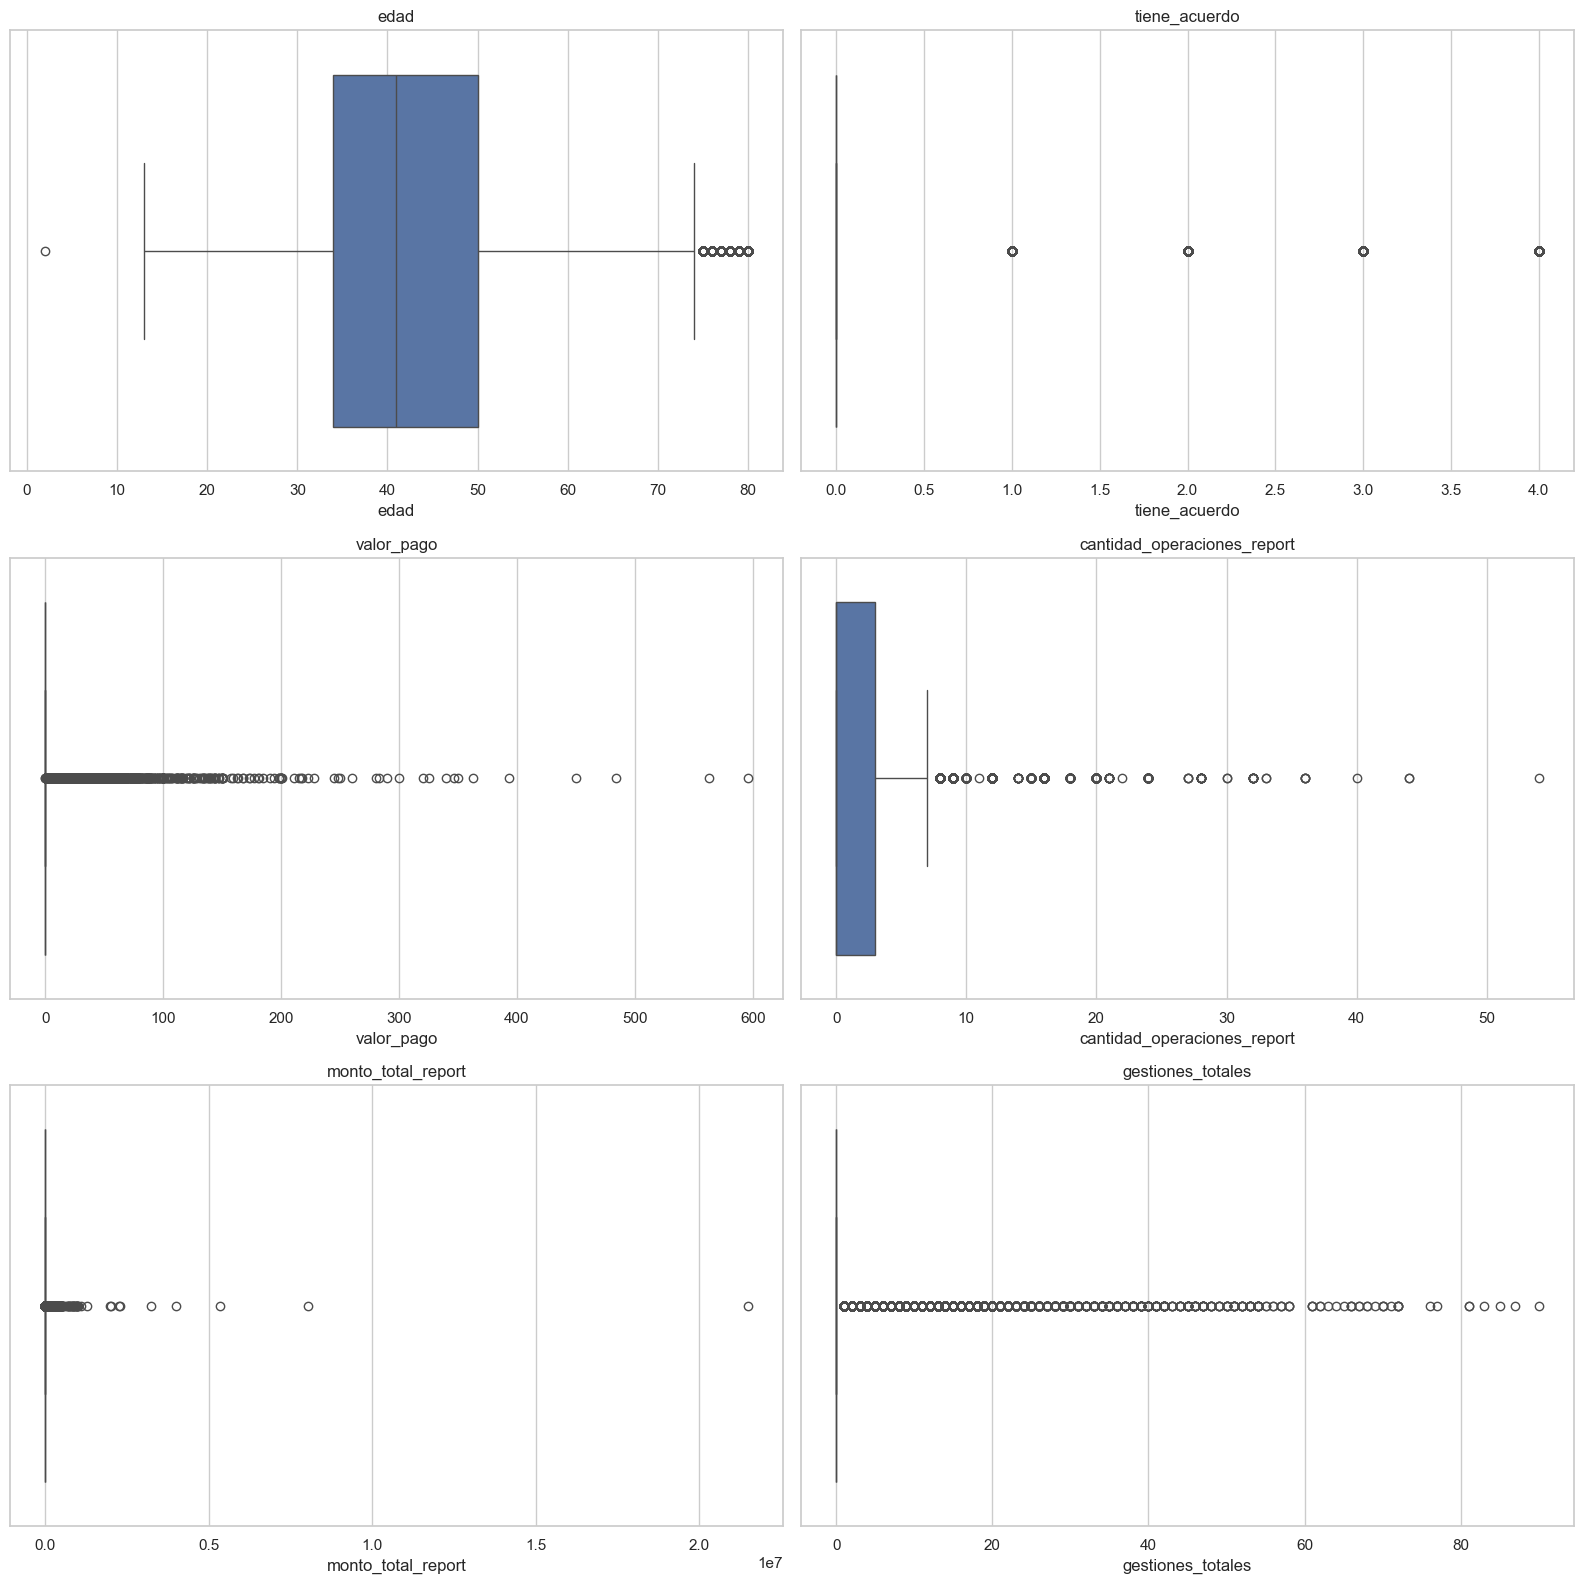

In [808]:
# Box plots con tus variables
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes (3 filas x 2 columnas para 6 variables)
fig, axs = plt.subplots(3, 2, figsize=(16, 16))  

# Lista de variables a visualizar
variables = [
             'edad', 'tiene_acuerdo', 'valor_pago','cantidad_operaciones_report', 'monto_total_report', 'gestiones_totales']

# Llenar los boxplots
for i, var in enumerate(variables):
    fila = i // 2  # Determina la fila
    columna = i % 2  # Determina la columna
    sns.boxplot(x=consolidado[var], ax=axs[fila, columna])
    axs[fila, columna].set_title(var)  # Agregar título a cada gráfico

# Ajustar diseño
plt.tight_layout()
plt.show()


El gráfico presenta la relación entre variables demográficas, operacionales y financieras, destacando tendencias asociadas a la edad de los usuarios o clientes.

* Relación entre Edad y Valor de Pagos (edad vs. valor_pago):
La escala de edad (0 a 80 años) sugiere que el comportamiento financiero varía significativamente según el grupo etario. El valor de pago (0.0 a 4.0) muestra una progresión gradual, indicando que los pagos tienden a incrementarse con la edad, alcanzando su máximo entre los 70-80 años. Esto podría asociarse a una mayor capacidad económica o estabilidad financiera en etapas adultas avanzadas.

* Operaciones Reportadas (cantidad_operaciones_report):
Este indicador (0 a 600 operaciones) presenta una curva pronunciada, con un pico notable en el rango de 40-50 años. Esto refleja una mayor actividad transaccional en la mediana edad, posiblemente vinculada a responsabilidades financieras o inversiones activas.

* Monto Total Reportado (monto_total_report):
La escala reducida (0 a 50 unidades monetarias) contrasta con el alto volumen de operaciones, sugiriendo que las transacciones en edades medias son frecuentes pero de bajo monto individual. En cambio, en grupos mayores (60-80 años), aunque disminuyen las operaciones, el valor de pago aumenta, lo que apunta a transacciones más sustanciales.

* Gestiones Totales (gestiones_totales):
La correlación entre gestiones_totales (0.0 a 4.0) y edad sugiere que la complejidad o el tiempo invertido en gestiones se incrementa con la edad, posiblemente debido a requerimientos administrativos más exigentes en etapas posteriores.

In [809]:
import numpy as np
def replace_outliers(data, column):
    # Calcular los percentiles 5 y 95 para el recorte
    lower_limit = data[column].quantile(0.05)
    upper_limit = data[column].quantile(0.95)
    
    # Reemplazar los valores fuera de los límites
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)
    print(f"Outliers en '{column}' reemplazados por los límites [{lower_limit}, {upper_limit}]")
    return data

def log_transform(data, column):
    # Aplicar logaritmo a valores positivos
    data[column] = data[column].apply(lambda x: np.log1p(x) if x > 0 else 0)
    print(f"Transformación logarítmica aplicada en '{column}'")
    return data

# Aplicar la transformación logarítmica en monto_total_report en la base 'consolidado'
consolidado = log_transform(consolidado, 'monto_total_report')

# Verificar el resultado
print(consolidado[['monto_total_report']].describe())

Transformación logarítmica aplicada en 'monto_total_report'
       monto_total_report
count       292583.000000
mean             3.092953
std              3.536443
min              0.000000
25%              0.000000
50%              0.000000
75%              6.571408
max             16.882766


In [810]:
def tratar_outliers(df, columna, estrategia="winsorizar"):
    """
    Función mejorada para tratar outliers manteniendo unidades originales.
    Parámetros:
    - df: DataFrame
    - columna: Columna a tratar
    - estrategia: "winsorizar" (ajustar valores) o "eliminar" (eliminar registros)
    """
    # Copia del DataFrame para no modificar el original
    df_temp = df.copy()
    
    # Calcular cuartiles y límites
    Q1 = df_temp[columna].quantile(0.25)
    Q3 = df_temp[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    print(f"\n—— {columna} ——")
    print(f"IQR: {IQR:.2f}")
    print(f"Límites: [{limite_inferior:.2f}, {limite_superior:.2f}]")
    print(f"Valores antes: min={df_temp[columna].min()}, max={df_temp[columna].max()}")
    
    # Aplicar estrategia
    if estrategia == "eliminar":
        df_filtrado = df_temp[(df_temp[columna] >= limite_inferior) & 
                              (df_temp[columna] <= limite_superior)]
    elif estrategia == "winsorizar":
        df_temp[columna] = np.clip(df_temp[columna], limite_inferior, limite_superior)
        df_filtrado = df_temp
    else:
        raise ValueError("Estrategia no válida. Usar 'eliminar' o 'winsorizar'")
    
    print(f"Valores después: min={df_filtrado[columna].min()}, max={df_filtrado[columna].max()}")
    
    return df_filtrado

# Aplicar a todas las variables (manteniendo unidades)
consolidado = tratar_outliers(consolidado, 'cantidad_operaciones_report', estrategia="winsorizar")
consolidado = tratar_outliers(consolidado, 'edad', estrategia="winsorizar")


—— cantidad_operaciones_report ——
IQR: 3.00
Límites: [-4.50, 7.50]
Valores antes: min=0, max=54
Valores después: min=0.0, max=7.5

—— edad ——
IQR: 16.00
Límites: [10.00, 74.00]
Valores antes: min=2, max=80
Valores después: min=10, max=74


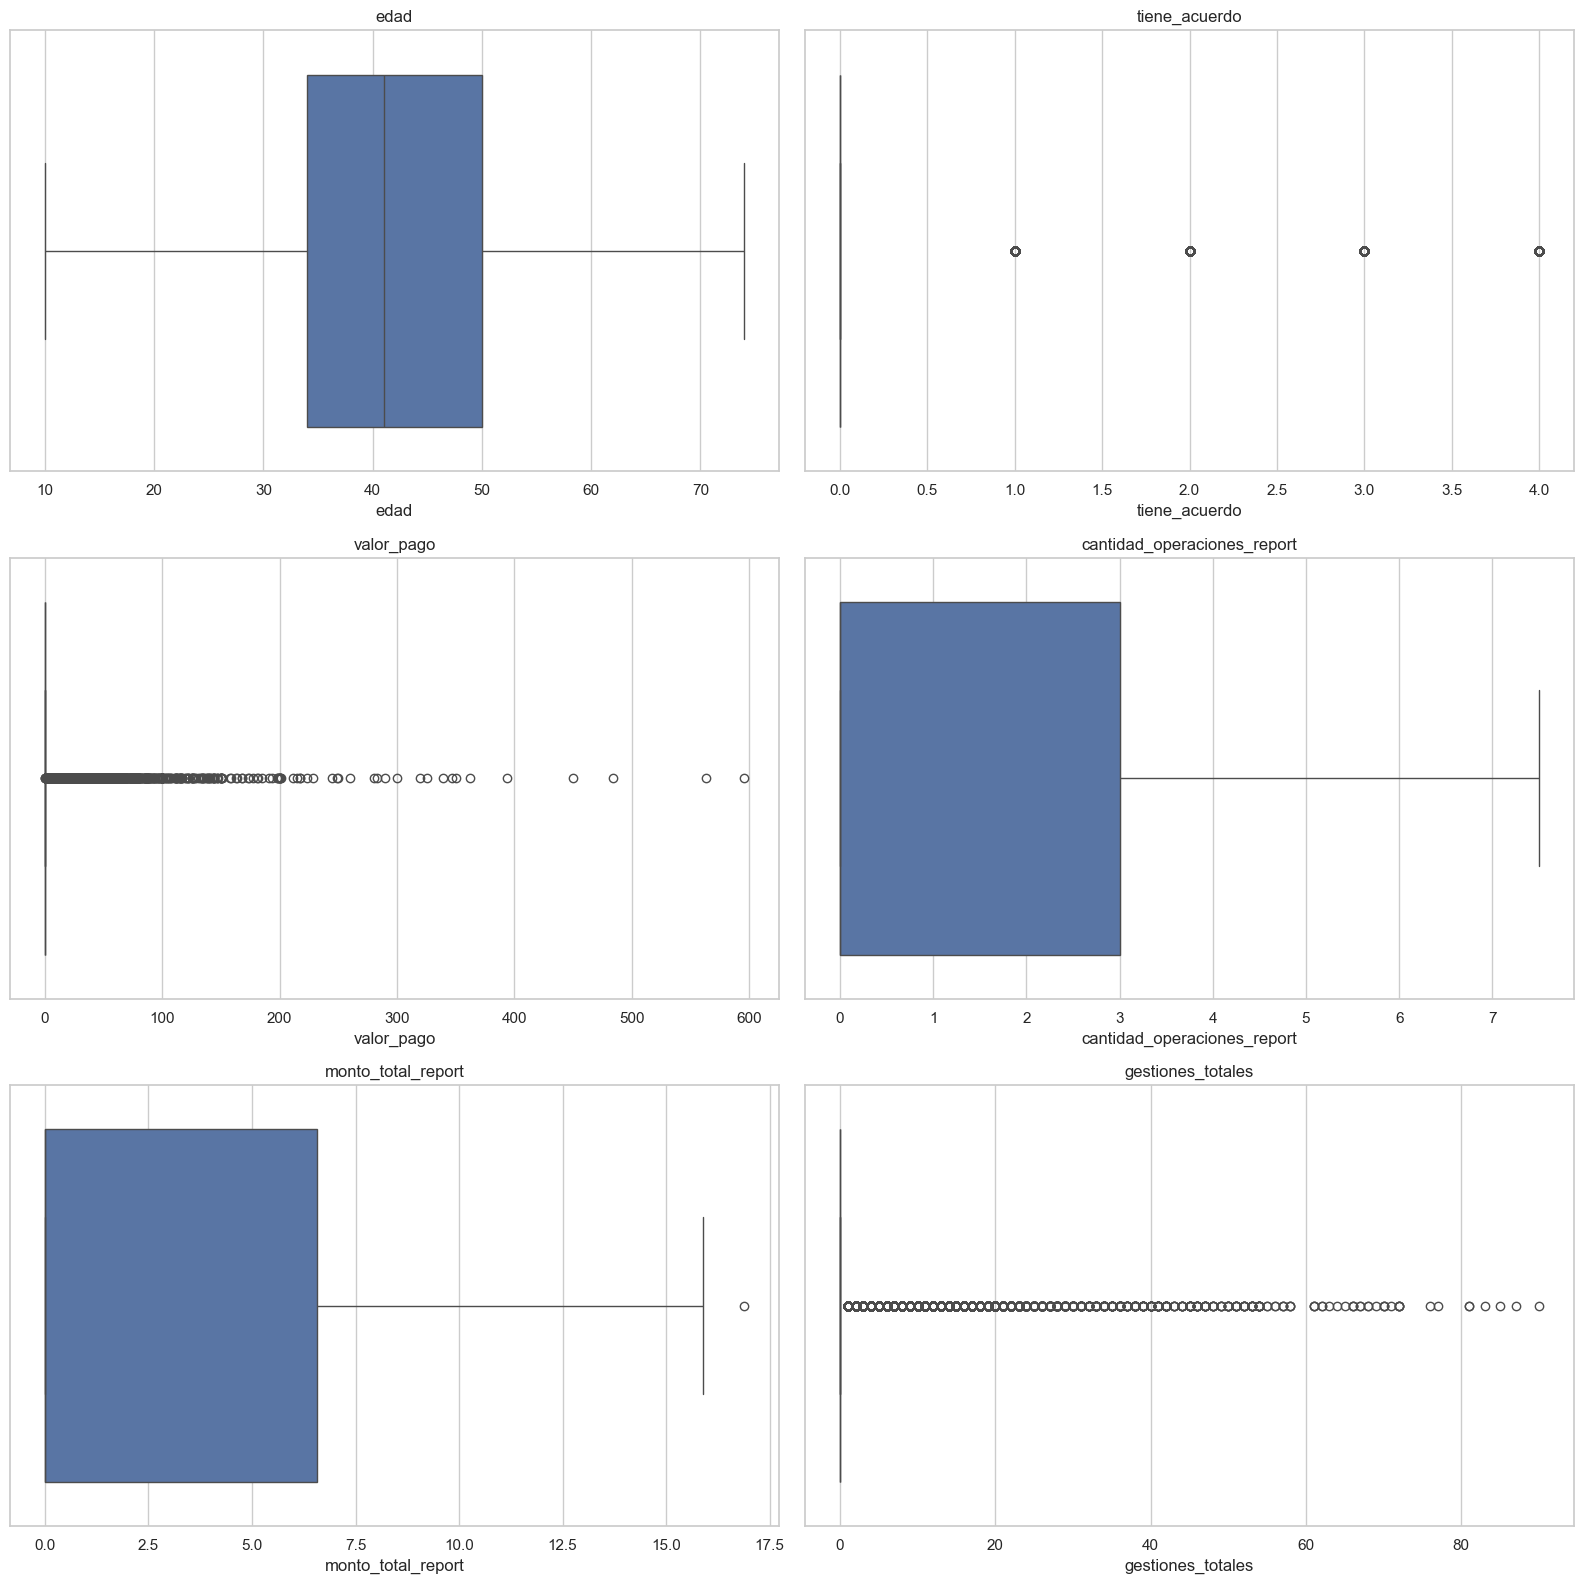

In [811]:
# Crear la figura y los ejes (3 filas x 2 columnas para 6 variables)
fig, axs = plt.subplots(3, 2, figsize=(16, 16))  

# Lista de variables a visualizar
variables = [
             'edad', 'tiene_acuerdo', 'valor_pago','cantidad_operaciones_report', 'monto_total_report', 'gestiones_totales']

# Llenar los boxplots
for i, var in enumerate(variables):
    fila = i // 2  # Determina la fila
    columna = i % 2  # Determina la columna
    sns.boxplot(x=consolidado[var], ax=axs[fila, columna])
    axs[fila, columna].set_title(var)  # Agregar título a cada gráfico

# Ajustar diseño
plt.tight_layout()
plt.show()


In [812]:
print("Valores únicos en gestiones_antes:", consolidado['gestiones_antes'].unique())

Valores únicos en gestiones_antes: [ 0  3  4 10 16  5  1  2 20  8 11 34 12 14  9  7 28  6 15 19 44 38 17 13
 78 23 22 18 21 30 50 25 26 31 24 36 29 33 32 39 37 40 52 59 64 48 47 35
 27 41 46 60 58 51 65 43 42 49]


Análisis de Variables

In [813]:
# Convertir las columnas especificadas a int64
cols = ['tiene_acuerdo', 'historial_crediticio']

consolidado[cols] = consolidado[cols].astype('int64')

# Verificar el cambio de tipo
print(consolidado.dtypes)

per_id                         string[python]
per_cli                                object
sexo                                   object
educacion                              object
edad                                    int64
fecha_nacimiento               datetime64[ns]
empleabilidad                          object
provincia                              object
canton                                 object
mejor_calificacion                     object
peor_calificacion                      object
año_gestion                             int64
mes_gestion                             int64
tiene_acuerdo                           int64
valor_pago                            float64
gestiones_totales                       int64
gestiones_antes                         int64
gestiones_despues                       int64
cantidad_operaciones_report           float64
monto_total_report                    float64
historial_crediticio                    int64
paga                              

In [814]:
encabezados = consolidado.columns.tolist()
print (encabezados)

['per_id', 'per_cli', 'sexo', 'educacion', 'edad', 'fecha_nacimiento', 'empleabilidad', 'provincia', 'canton', 'mejor_calificacion', 'peor_calificacion', 'año_gestion', 'mes_gestion', 'tiene_acuerdo', 'valor_pago', 'gestiones_totales', 'gestiones_antes', 'gestiones_despues', 'cantidad_operaciones_report', 'monto_total_report', 'historial_crediticio', 'paga']


Analisis de variables

In [815]:
'''
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = consolidado.drop("tipo_pago", axis=1)
y = consolidado["tipo_pago"]

# Aplicar SMOTEENN
smote_enn = SMOTEENN(random_state=42, sampling_strategy="auto")
X_balanced, y_balanced = smote_enn.fit_resample(X, y)

# Crear nuevo DataFrame balanceado
consolidado_balanceado = pd.DataFrame(X_balanced, columns=X.columns)
consolidado_balanceado["tipo_pago"] = y_balanced.values  # Agregar columna objetivo

# Verificar el balance resultante
print("Distribución original:\n", y.value_counts())

print("\nDistribución después de SMOTEENN:\n", consolidado_balanceado["tipo_pago"].value_counts())

# Guardar el nuevo dataset balanceado
consolidado_balanceado.to_csv("consolidado_balanceado.csv", index=False)
print("\n¡Dataset balanceado guardado como 'consolidado_balanceado.csv'!")

# Dividir en entrenamiento y prueba (opcional)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced,
    y_balanced,
    test_size=0.3,
    stratify=y_balanced,
    random_state=42
)

consolidado#Mostrar información del dataset
print('\nInformacion del dataset:')
print(consolidado_balanceado.info())
'''

'\nimport pandas as pd\nfrom imblearn.combine import SMOTEENN\nfrom sklearn.model_selection import train_test_split\n\n# Separar características (X) y variable objetivo (y)\nX = consolidado.drop("tipo_pago", axis=1)\ny = consolidado["tipo_pago"]\n\n# Aplicar SMOTEENN\nsmote_enn = SMOTEENN(random_state=42, sampling_strategy="auto")\nX_balanced, y_balanced = smote_enn.fit_resample(X, y)\n\n# Crear nuevo DataFrame balanceado\nconsolidado_balanceado = pd.DataFrame(X_balanced, columns=X.columns)\nconsolidado_balanceado["tipo_pago"] = y_balanced.values  # Agregar columna objetivo\n\n# Verificar el balance resultante\nprint("Distribución original:\n", y.value_counts())\n\nprint("\nDistribución después de SMOTEENN:\n", consolidado_balanceado["tipo_pago"].value_counts())\n\n# Guardar el nuevo dataset balanceado\nconsolidado_balanceado.to_csv("consolidado_balanceado.csv", index=False)\nprint("\n¡Dataset balanceado guardado como \'consolidado_balanceado.csv\'!")\n\n# Dividir en entrenamiento y pr

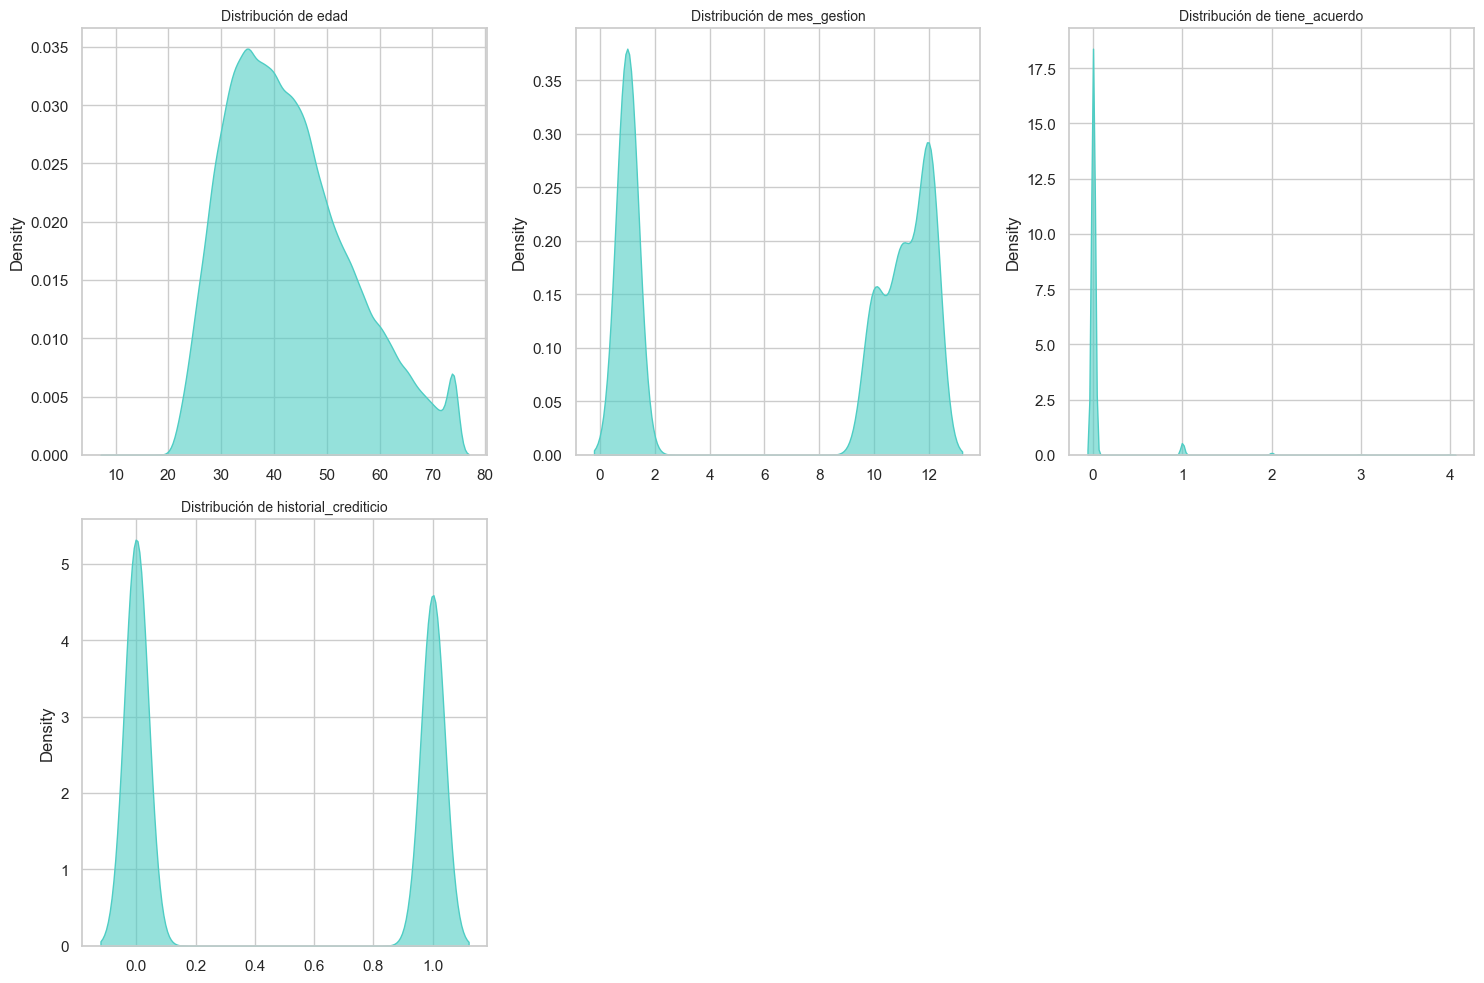

In [816]:
#Visualización de distribuciones (con densidad)

variables = ['edad', 'mes_gestion', 'tiene_acuerdo', 'historial_crediticio']
n_vars = len(variables)
n_cols = 3  # Número de columnas en el grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcula filas necesarias

plt.figure(figsize=(15, 5 * n_rows))  # Ajusta altura según filas

for i, col in enumerate(variables, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(consolidado[col], color='#4ECDC4', fill=True, alpha=0.6)
    plt.title(f'Distribución de {col}', fontsize=10)
    plt.xlabel('')

plt.tight_layout()
plt.show()


C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\3483669281.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=var, y='porcentaje', data=counts,
C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\3483669281.py:35: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  plot = sns.barplot(x=var, y='porcentaje', data=counts,
C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\3483669281.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=var, y='porcentaje', data=counts,
C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\3483669281.py:35: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.

<Figure size 2000x2500 with 0 Axes>

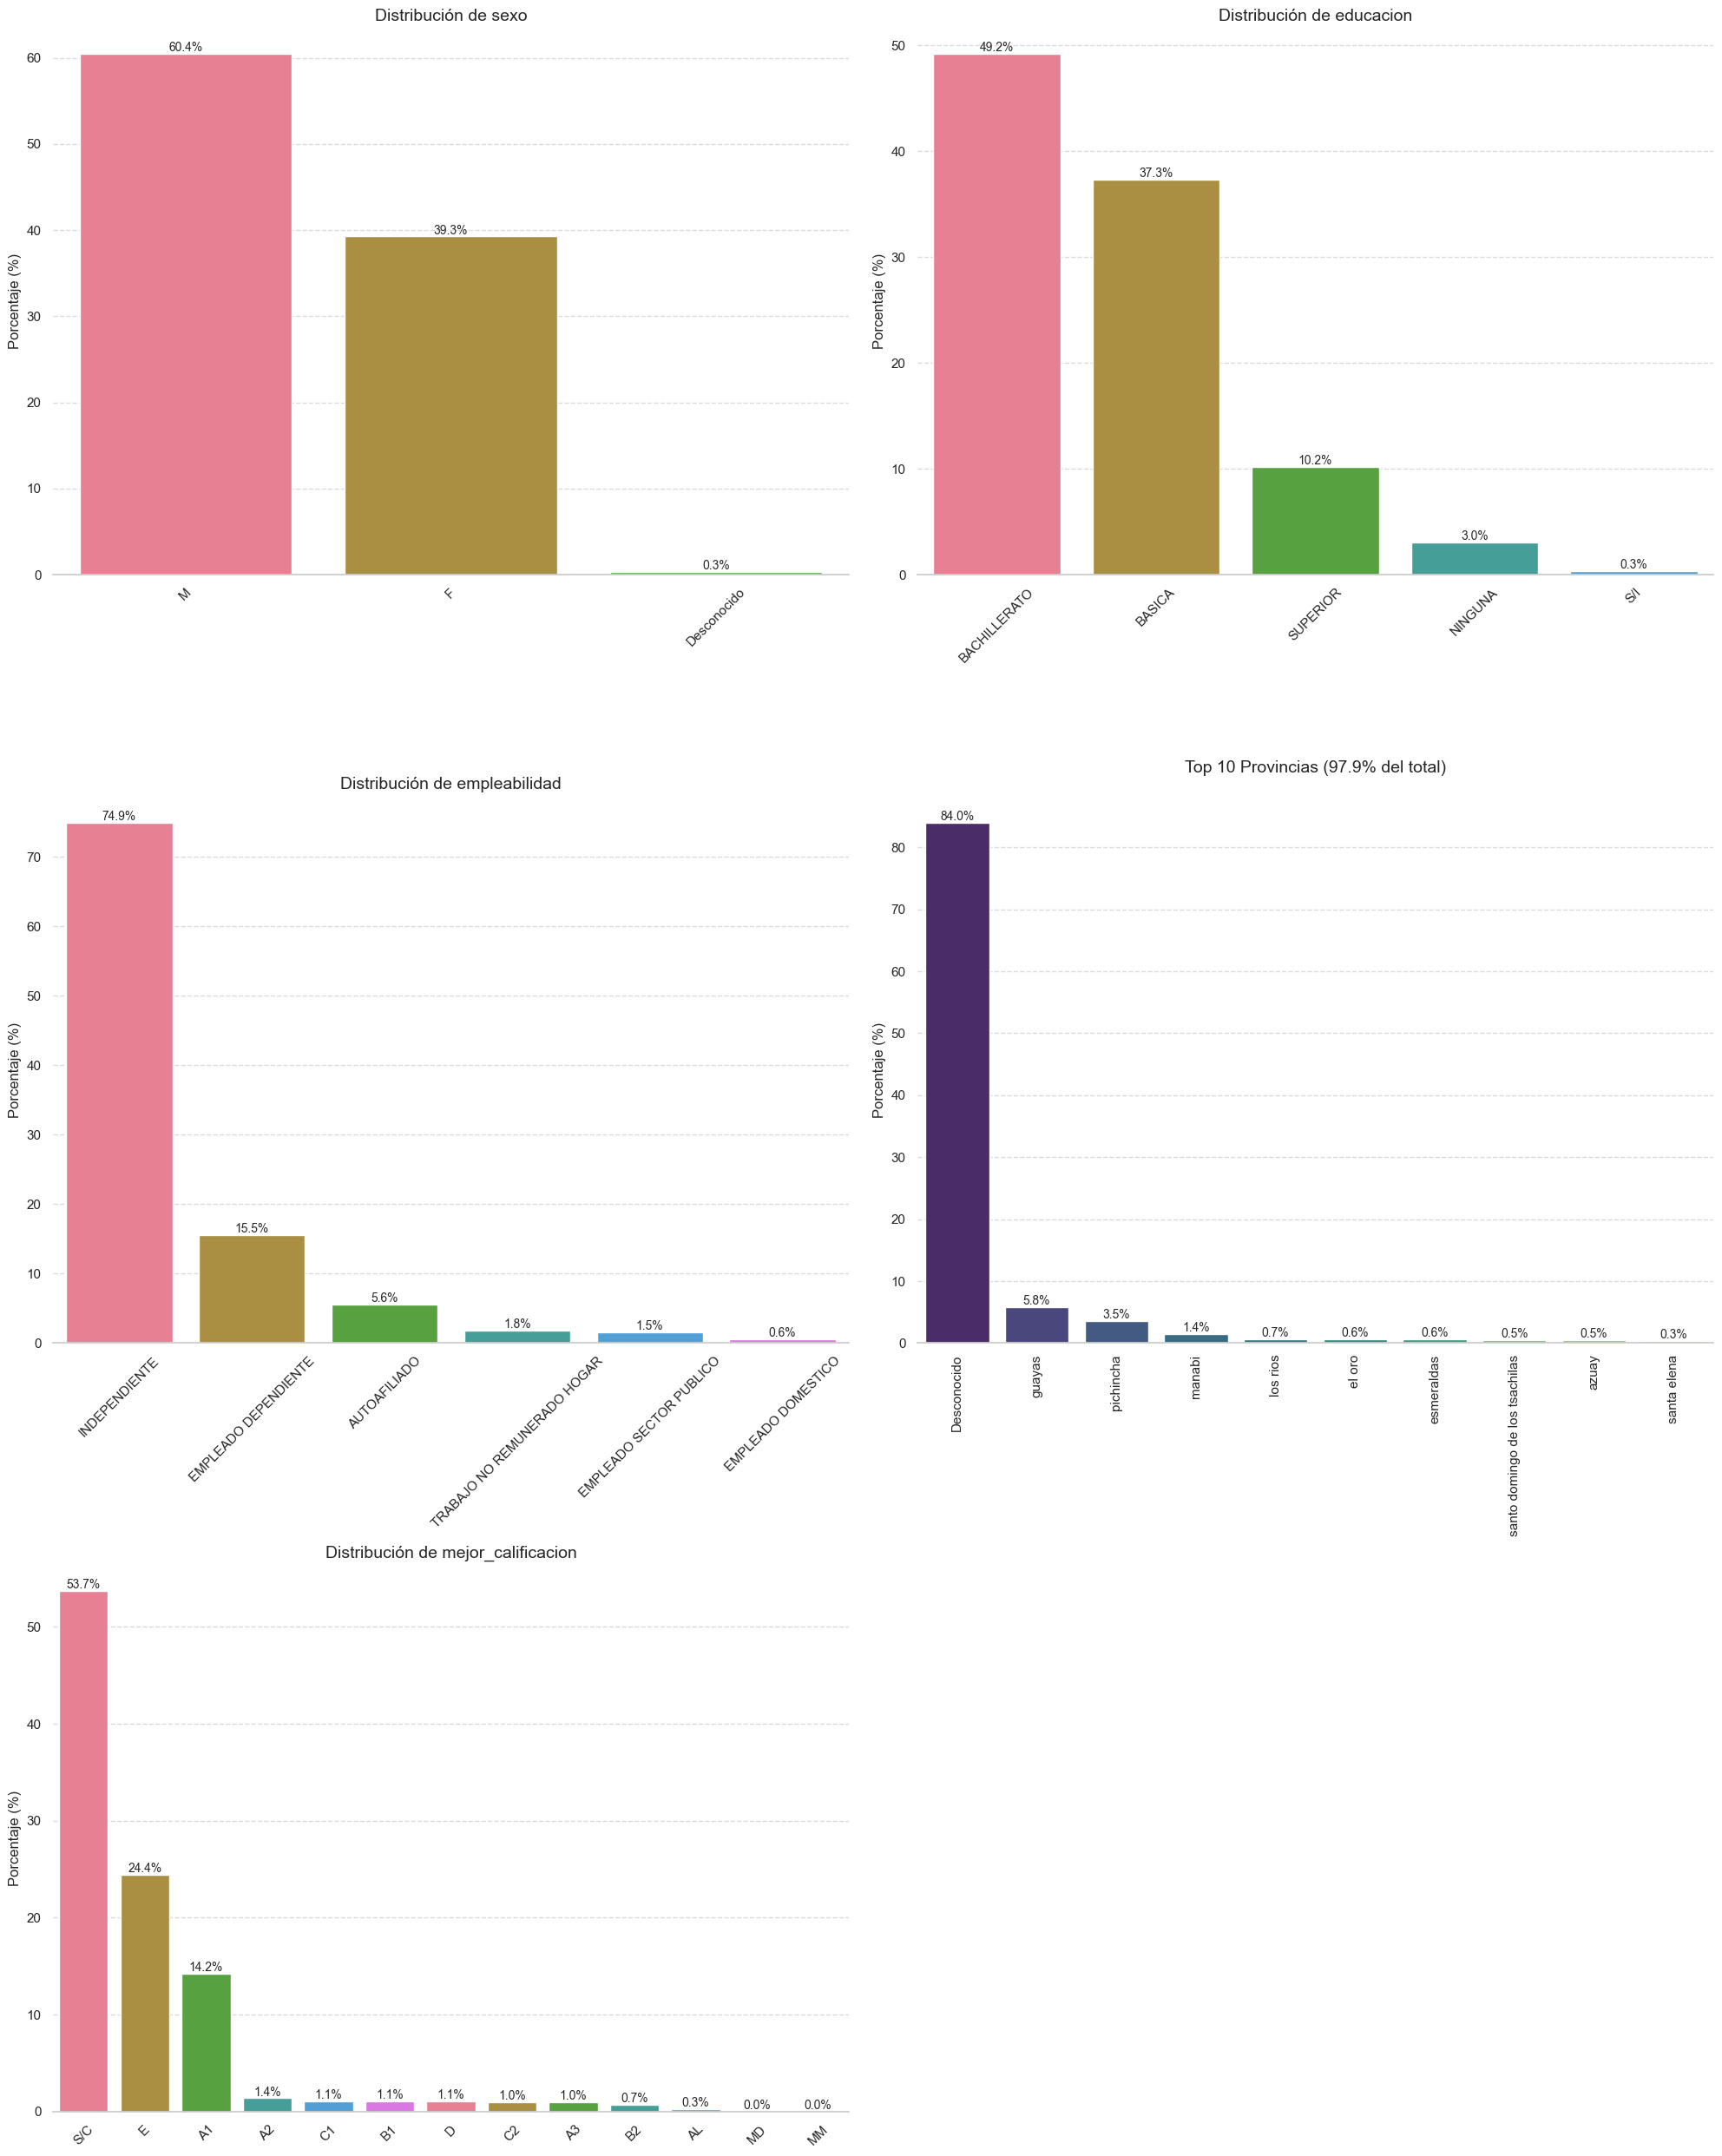

In [817]:
#Graficos de barras de las variables cualitativas
def plot_top10_provincia(data, variables, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    sns.set_style("whitegrid")
    palette = sns.color_palette("husl")
    
    fig, axs = plt.subplots(3, 2, figsize=figsize)
    axs = axs.ravel()
    
    for i, var in enumerate(variables):
        # Manejo especial para provincia
        if var == 'provincia':
            # Obtener top 10 provincias
            top_10 = data[var].value_counts().nlargest(10)
            porcentajes = (top_10 / len(data) * 100).reset_index()
            porcentajes.columns = [var, 'porcentaje']
            
            # Ordenar de mayor a menor
            porcentajes = porcentajes.sort_values('porcentaje', ascending=False)
            
            # Crear gráfico con paleta diferente
            plot = sns.barplot(x=var, y='porcentaje', data=porcentajes, 
                             ax=axs[i], palette="viridis", order=top_10.index)
            
            # Rotación más pronunciada
            axs[i].tick_params(axis='x', rotation=90)
            axs[i].set_title(f'Top 10 Provincias ({top_10.sum()/len(data)*100:.1f}% del total)', 
                           fontsize=14, pad=20)
            
        else:
            # Proceso normal para otras variables
            counts = data[var].value_counts(normalize=True).mul(100).reset_index()
            counts.columns = [var, 'porcentaje']
            
            plot = sns.barplot(x=var, y='porcentaje', data=counts, 
                             ax=axs[i], palette=palette)
            axs[i].tick_params(axis='x', rotation=45)
            axs[i].set_title(f'Distribución de {var}', fontsize=14)
        
        # Personalización común
        axs[i].set_ylabel('Porcentaje (%)', fontsize=12)
        axs[i].set_xlabel('')
        axs[i].grid(axis='y', linestyle='--', alpha=0.7)
        
        # Añadir etiquetas
        for p in axs[i].patches:
            height = p.get_height()
            axs[i].annotate(f'{height:.1f}%', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', 
                          xytext=(0, 5), 
                          textcoords='offset points',
                          fontsize=10)
        
        # Líneas decorativas
        sns.despine(left=True, ax=axs[i])
    
    # Eliminar subplots vacíos
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Variables a visualizar
cualitativas = ["sexo", "educacion", "empleabilidad", "provincia", "mejor_calificacion"]

# Ejecutar la función
plot_top10_provincia(consolidado, cualitativas, figsize=(20, 25))

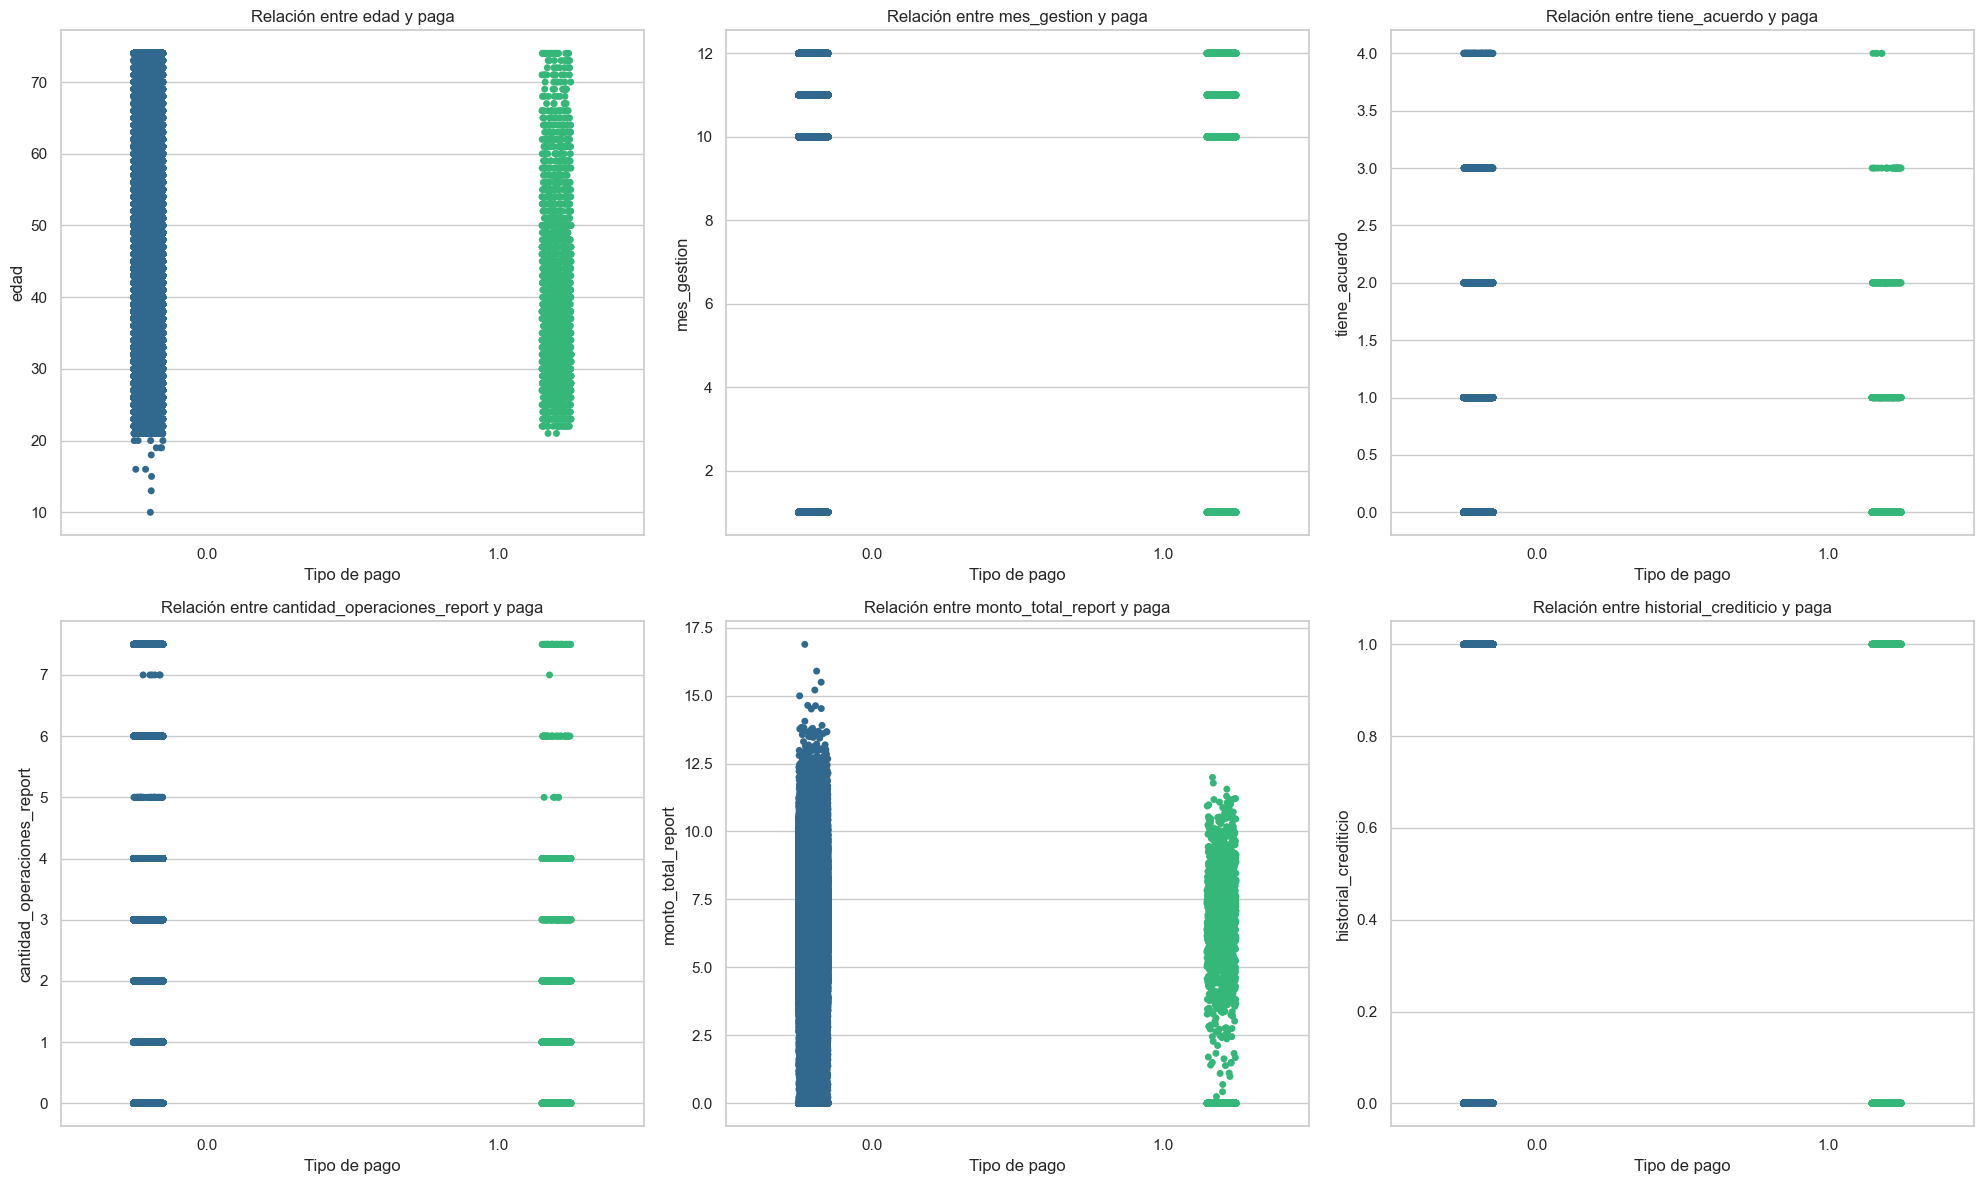

C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\949782061.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = consolidado.groupby([target, variable]).size().reset_index(name='conteo')
C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\949782061.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totales = conteo.groupby(target)['conteo'].transform('sum')
C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\949782061.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

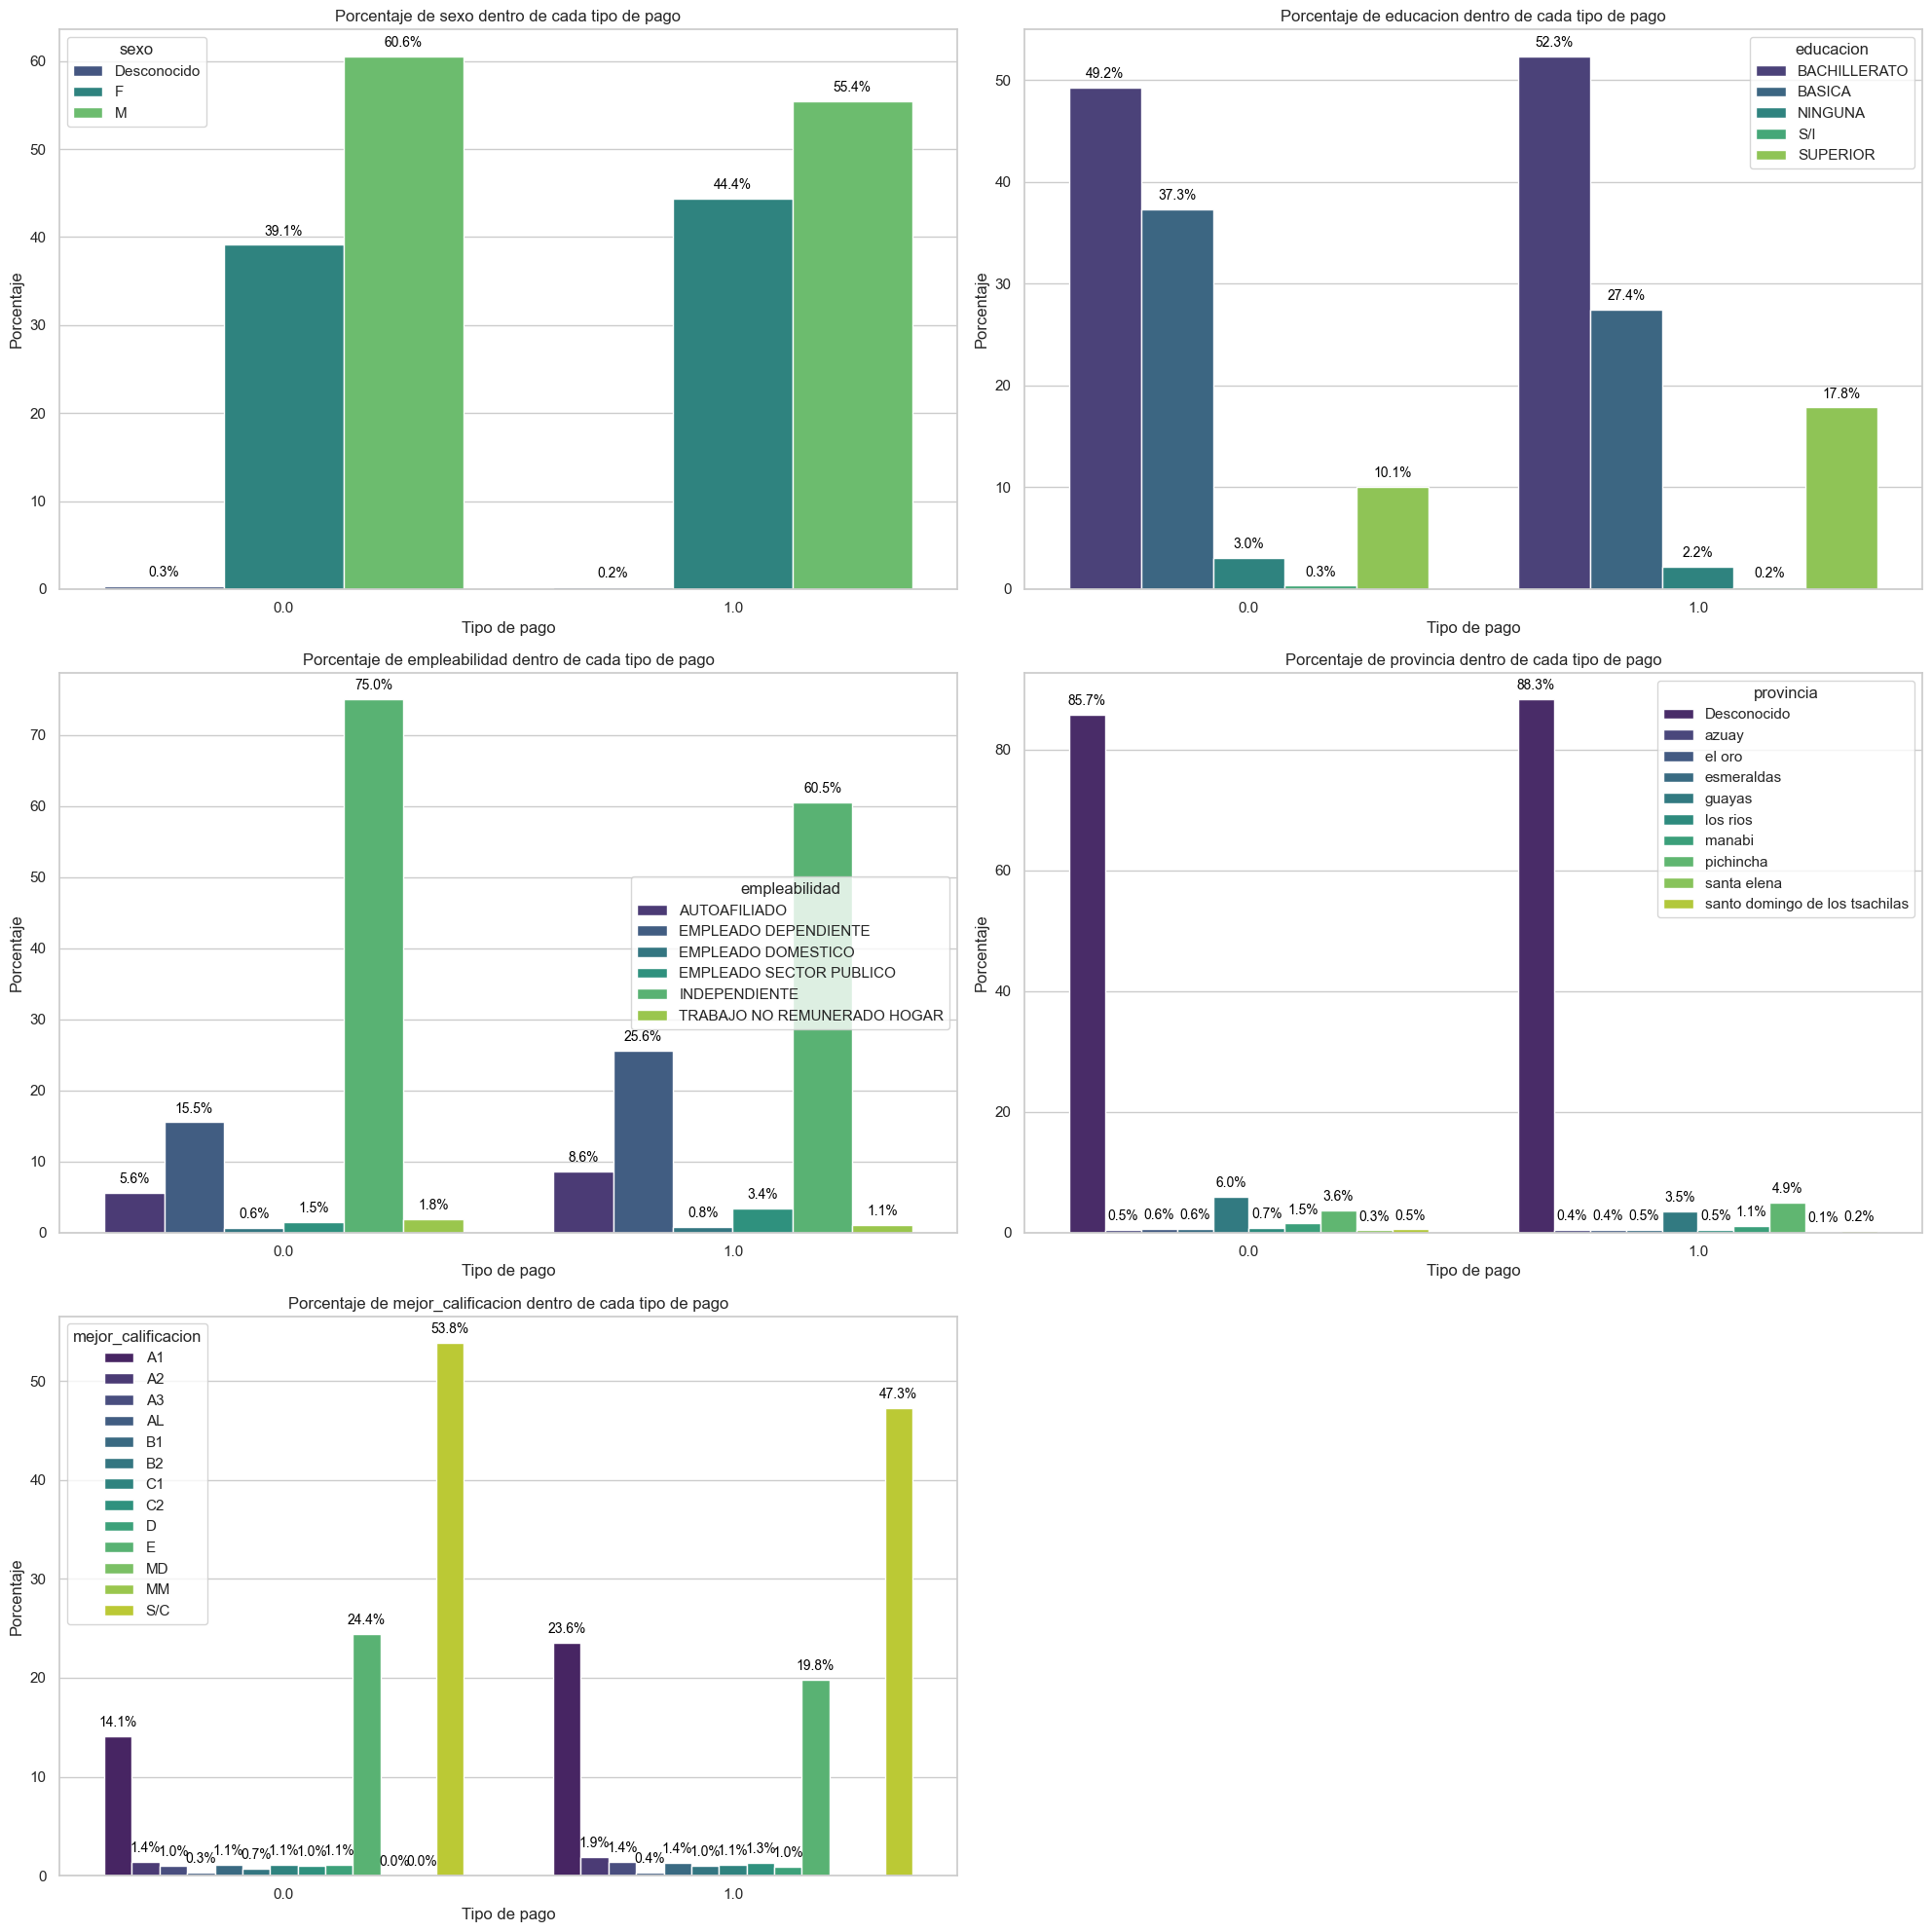

In [818]:
# Configuración inicial
sns.set(style="whitegrid")

# Variables
cuantitativas = ['edad', 'mes_gestion', 'tiene_acuerdo', 'cantidad_operaciones_report', 
                 'monto_total_report', 'historial_crediticio']
cualitativas = ["sexo", "educacion", "empleabilidad", "provincia", "mejor_calificacion"]
target = 'paga'

# Tratamiento especial para la variable provincia
if 'provincia' in consolidado.columns:
    top_provincias = consolidado['provincia'].value_counts().nlargest(10).index
    consolidado = consolidado[consolidado['provincia'].isin(top_provincias)]

# 1. Gráficos para variables cuantitativas
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()

for i, variable in enumerate(cuantitativas):
    sns.stripplot(x=target, y=variable, data=consolidado, ax=axs[i], 
                  jitter=True, palette='viridis', hue=target, dodge=True)
    axs[i].set_title(f'Relación entre {variable} y paga')
    axs[i].set_xlabel('Tipo de pago')
    axs[i].set_ylabel(variable)
    axs[i].legend().remove()

plt.tight_layout()
plt.show()

# 2. Gráficos para variables cualitativas con porcentaje por tipo de pago
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
axs = axs.ravel()

for i, variable in enumerate(cualitativas):
    # Calcular conteos por grupo
    conteo = consolidado.groupby([target, variable]).size().reset_index(name='conteo')
    
    # Calcular totales por grupo 'paga'
    totales = conteo.groupby(target)['conteo'].transform('sum')
    
    # Calcular porcentajes
    conteo['Porcentaje'] = 100 * conteo['conteo'] / totales
    
    # Graficar
    sns.barplot(x=target, y='Porcentaje', hue=variable, data=conteo, ax=axs[i], palette='viridis')
    axs[i].set_title(f'Porcentaje de {variable} dentro de cada tipo de pago')
    axs[i].set_xlabel('Tipo de pago')
    axs[i].set_ylabel('Porcentaje')
    axs[i].legend(title=variable)

    # Etiquetas de porcentaje sobre las barras
    for p in axs[i].patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:
            axs[i].annotate(f'{height:.1f}%',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=10, color='black', 
                            xytext=(0, 5), textcoords='offset points')

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


1.	Relación entre Edad y Paga
En el gráfico se observa la distribución de la variable "edad" en relación con la variable "paga". La distribución de la edad es similar tanto en la categoría "paga" (1) como en "no paga" (0), sin diferencias significativas entre las dos.
2. Relación entre Mes de Gestión y Paga
En el gráfico se observa la distribución del mes de gestión en relación con la variable "paga". La distribución del mes de gestión es similar en ambas categorías, lo que indica que el mes en que se realiza la gestión no presenta diferencias notables entre quienes pagan y quienes no pagan.
3. Relación entre Tiene Acuerdo y paga
En el gráfico se observa la relación entre la variable "tiene_acuerdo" y la variable "paga". La mayoría de los individuos en ambas categorías (paga y no paga) no tienen un acuerdo, lo que sugiere que la existencia de un acuerdo no influye significativamente en el resultado de pago.
4. Relación entre Cantidad de Operaciones Reportadas y Paga
En el gráfico se observa la distribución de la cantidad de operaciones reportadas en relación con la variable "paga". La cantidad de operaciones se distribuye de manera similar tanto en la categoría "paga" (1) como en "no paga" (0), sin diferencias relevantes entre ambas.
5. Relación entre Monto Total Reportado y Paga
En el gráfico se observa la distribución del monto total reportado en relación con la variable "paga". El monto total se distribuye de manera similar en ambas categorías, lo que indica que el valor monetario reportado no diferencia significativamente entre quienes pagan y quienes no pagan.
6. Relación entre Historial Crediticio y Paga
En el gráfico se observa la distribución del historial crediticio en relación con la variable "paga". La distribución del historial crediticio es similar tanto en la categoría "paga" (1) como en la categoría "no paga" (0), sin diferencias destacables que indiquen una influencia significativa.

In [819]:
# 1. Selección manual de variables numéricas relevantes
numeric_cols = ['edad', 'tiene_acuerdo', 'valor_pago', 
                'gestiones_antes', 'gestiones_despues', 
                'cantidad_operaciones_report', 'monto_total_report']

print("Variables numéricas analizadas:", numeric_cols)

# 2. Función para estadísticas descriptivas extendidas
def extended_describe(df, cols):
    stats = df[cols].describe().T
    stats['skewness'] = df[cols].skew()  # Asimetría
    stats['kurtosis'] = df[cols].kurt()  # Curtosis
    # Cálculo manual de MAD (Median Absolute Deviation)
    stats['mad'] = df[cols].apply(lambda x: np.median(np.abs(x - np.median(x))))
    stats['zeros'] = (df[cols] == 0).sum()  # Conteo de ceros
    return stats

# Calcular estadísticas
num_stats = extended_describe(consolidado, numeric_cols)

# Mostrar resumen con variables clave
print("\nEstadísticas descriptivas extendidas:")
print(num_stats[['mean', 'std', '50%', 'skewness', 'kurtosis', 'mad', 'zeros']])


Variables numéricas analizadas: ['edad', 'tiene_acuerdo', 'valor_pago', 'gestiones_antes', 'gestiones_despues', 'cantidad_operaciones_report', 'monto_total_report']

Estadísticas descriptivas extendidas:
                                  mean        std   50%   skewness  \
edad                         43.061804  11.784200  41.0   0.598817   
tiene_acuerdo                 0.044598   0.258484   0.0   7.514606   
valor_pago                    0.309034   5.022032   0.0  42.532197   
gestiones_antes               0.173322   1.343635   0.0  14.779422   
gestiones_despues             0.193534   1.470433   0.0  10.991168   
cantidad_operaciones_report   1.361147   1.825650   0.0   1.303516   
monto_total_report            3.083354   3.531958   0.0   0.458583   

                                kurtosis  mad   zeros  
edad                           -0.233035  8.0       0  
tiene_acuerdo                  71.757524  0.0  276300  
valor_pago                   2960.900263  0.0  282505  
gestiones_a

ANALISIS DE VARIABLES

In [820]:
'''#Convertir a variables enteras
variables_a_entero = [
    "cantidad_operaciones_report",   
]

for col in variables_a_entero:
    consolidado[col] = consolidado[col].astype("int64")
    

#Retiramos variables no necesarias
consolidado.drop(['per_id', 'per_cli', 'fecha_nacimiento', 'gestiones_totales', 'canton', 'mejor_calificacion'],axis=1, inplace=True)
#per_id codigo unico del cliente
#per_cli cedula del cliente
#año_gestion se encuentra ya el detalle del mes
#fecha_nacimiento ya se encuentra la variable edad
#gestiones_totales es reduntante con gestiones antes y despues ya que es la suma de gestiones
#canton es redundante con provincia
#mejor calificación es redundante con peor calificacion'''

'#Convertir a variables enteras\nvariables_a_entero = [\n    "cantidad_operaciones_report",   \n]\n\nfor col in variables_a_entero:\n    consolidado[col] = consolidado[col].astype("int64")\n    \n\n#Retiramos variables no necesarias\nconsolidado.drop([\'per_id\', \'per_cli\', \'fecha_nacimiento\', \'gestiones_totales\', \'canton\', \'mejor_calificacion\'],axis=1, inplace=True)\n#per_id codigo unico del cliente\n#per_cli cedula del cliente\n#año_gestion se encuentra ya el detalle del mes\n#fecha_nacimiento ya se encuentra la variable edad\n#gestiones_totales es reduntante con gestiones antes y despues ya que es la suma de gestiones\n#canton es redundante con provincia\n#mejor calificación es redundante con peor calificacion'

MATRIZ DE CORRELACION

In [821]:
# Convertir las columnas especificadas a int32
cols = ['tiene_acuerdo', 'historial_crediticio', 'paga','cantidad_operaciones_report']

consolidado[cols] = consolidado[cols].astype('int32')

# Verificar el cambio de tipo
print(consolidado.dtypes)

per_id                         string[python]
per_cli                                object
sexo                                   object
educacion                              object
edad                                    int64
fecha_nacimiento               datetime64[ns]
empleabilidad                          object
provincia                              object
canton                                 object
mejor_calificacion                     object
peor_calificacion                      object
año_gestion                             int64
mes_gestion                             int64
tiene_acuerdo                           int32
valor_pago                            float64
gestiones_totales                       int64
gestiones_antes                         int64
gestiones_despues                       int64
cantidad_operaciones_report             int32
monto_total_report                    float64
historial_crediticio                    int32
paga                              

In [822]:
# Eliminar columnas no necesarias
consolidado.drop(['per_id', 'per_cli', 'fecha_nacimiento', 'canton', 'mejor_calificacion'], axis=1, inplace=True)
#per_id codigo unico del cliente
#per_cli cedula del cliente
#fecha_nacimiento ya se encuentra la variable edad
#gestiones_totales es reduntante con gestiones antes y despues ya que es la suma de gestiones
#canton es redundante con provincia
#mejor calificación es redundante con peor calificacion

Se eliminan variables que no aportan al modelo

In [823]:
# Crear las variables dummy
categorical_vars = ['sexo', 'educacion', 'empleabilidad', 'provincia', 'peor_calificacion']
# Usamos get_dummies para crear las variables dummy

consolidado = pd.get_dummies(consolidado, columns=categorical_vars, drop_first=True)

# Verifica las primeras filas del DataFrame después de la transformación
print(consolidado.head())  # Muestra las primeras filas

   edad  año_gestion  mes_gestion  tiene_acuerdo  valor_pago  \
0    51         2024           12              0         0.0   
1    47         2024           11              0         0.0   
2    70         2024           12              0         0.0   
3    45         2025            1              0         0.0   
4    38         2024           11              0         0.0   

   gestiones_totales  gestiones_antes  gestiones_despues  \
0                  0                0                  0   
1                  0                0                  0   
2                  0                0                  0   
3                  0                0                  0   
4                  0                0                  0   

   cantidad_operaciones_report  monto_total_report  ...  peor_calificacion_AL  \
0                            4            5.430003  ...                 False   
1                            0            0.000000  ...                 False   
2          

In [824]:
consolidado.dtypes

edad                                           int64
año_gestion                                    int64
mes_gestion                                    int64
tiene_acuerdo                                  int32
valor_pago                                   float64
gestiones_totales                              int64
gestiones_antes                                int64
gestiones_despues                              int64
cantidad_operaciones_report                    int32
monto_total_report                           float64
historial_crediticio                           int32
paga                                           int32
sexo_F                                          bool
sexo_M                                          bool
educacion_BASICA                                bool
educacion_NINGUNA                               bool
educacion_S/I                                   bool
educacion_SUPERIOR                              bool
empleabilidad_EMPLEADO DEPENDIENTE            

In [825]:
# Asegúrate de que las columnas booleanas existen
bool_cols = consolidado.select_dtypes(include=['bool']).columns

# Si hay columnas booleanas, conviértelas
if len(bool_cols) > 0:
    consolidado[bool_cols] = consolidado[bool_cols].applymap(int)
else:
    print("No se encontraron columnas booleanas.")

C:\Users\staimal\AppData\Local\Temp\ipykernel_9012\31228696.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  consolidado[bool_cols] = consolidado[bool_cols].applymap(int)


In [826]:
print(consolidado.columns)


Index(['edad', 'año_gestion', 'mes_gestion', 'tiene_acuerdo', 'valor_pago',
       'gestiones_totales', 'gestiones_antes', 'gestiones_despues',
       'cantidad_operaciones_report', 'monto_total_report',
       'historial_crediticio', 'paga', 'sexo_F', 'sexo_M', 'educacion_BASICA',
       'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR',
       'empleabilidad_EMPLEADO DEPENDIENTE',
       'empleabilidad_EMPLEADO DOMESTICO',
       'empleabilidad_EMPLEADO SECTOR PUBLICO', 'empleabilidad_INDEPENDIENTE',
       'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 'provincia_azuay',
       'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas',
       'provincia_los rios', 'provincia_manabi', 'provincia_pichincha',
       'provincia_santa elena', 'provincia_santo domingo de los tsachilas',
       'peor_calificacion_A2', 'peor_calificacion_A3', 'peor_calificacion_AL',
       'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1',
       'peor_calificacion_C2', 'peo

In [827]:
# Calcular la matriz de correlación de solo las columnas numéricas
correlation_matrix = consolidado.select_dtypes(include=[float, int]).corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                                               edad  año_gestion  mes_gestion  \
edad                                       1.000000    -0.027496     0.031429   
año_gestion                               -0.027496     1.000000    -0.991914   
mes_gestion                                0.031429    -0.991914     1.000000   
tiene_acuerdo                             -0.012049    -0.023677     0.023829   
valor_pago                                -0.020246    -0.028868     0.023269   
gestiones_totales                         -0.006280    -0.014419     0.015479   
gestiones_antes                           -0.005371    -0.017474     0.017791   
gestiones_despues                         -0.005890    -0.008826     0.010359   
cantidad_operaciones_report                0.140127    -0.051745     0.058461   
monto_total_report                         0.157368    -0.009243     0.010229   
historial_crediticio                       0.142895    -0.009461     0.010548   
paga                        

In [828]:
'''var_cuantitativas = consolidado.select_dtypes('number').columns
var_cualitativas  = consolidado.select_dtypes('object').columns

print("Columnas cualitativas:", var_cualitativas)
print("Columnas cuantitativas:", var_cuantitativas)
'''

'var_cuantitativas = consolidado.select_dtypes(\'number\').columns\nvar_cualitativas  = consolidado.select_dtypes(\'object\').columns\n\nprint("Columnas cualitativas:", var_cualitativas)\nprint("Columnas cuantitativas:", var_cuantitativas)\n'

In [829]:
consolidado.info

<bound method DataFrame.info of         edad  año_gestion  mes_gestion  tiene_acuerdo  valor_pago  \
0         51         2024           12              0         0.0   
1         47         2024           11              0         0.0   
2         70         2024           12              0         0.0   
3         45         2025            1              0         0.0   
4         38         2024           11              0         0.0   
...      ...          ...          ...            ...         ...   
292578    33         2024           12              0         0.0   
292579    34         2024           11              0         0.0   
292580    35         2024           12              0         0.0   
292581    29         2024           12              0         0.0   
292582    55         2024           12              0         0.0   

        gestiones_totales  gestiones_antes  gestiones_despues  \
0                       0                0                  0   
1        

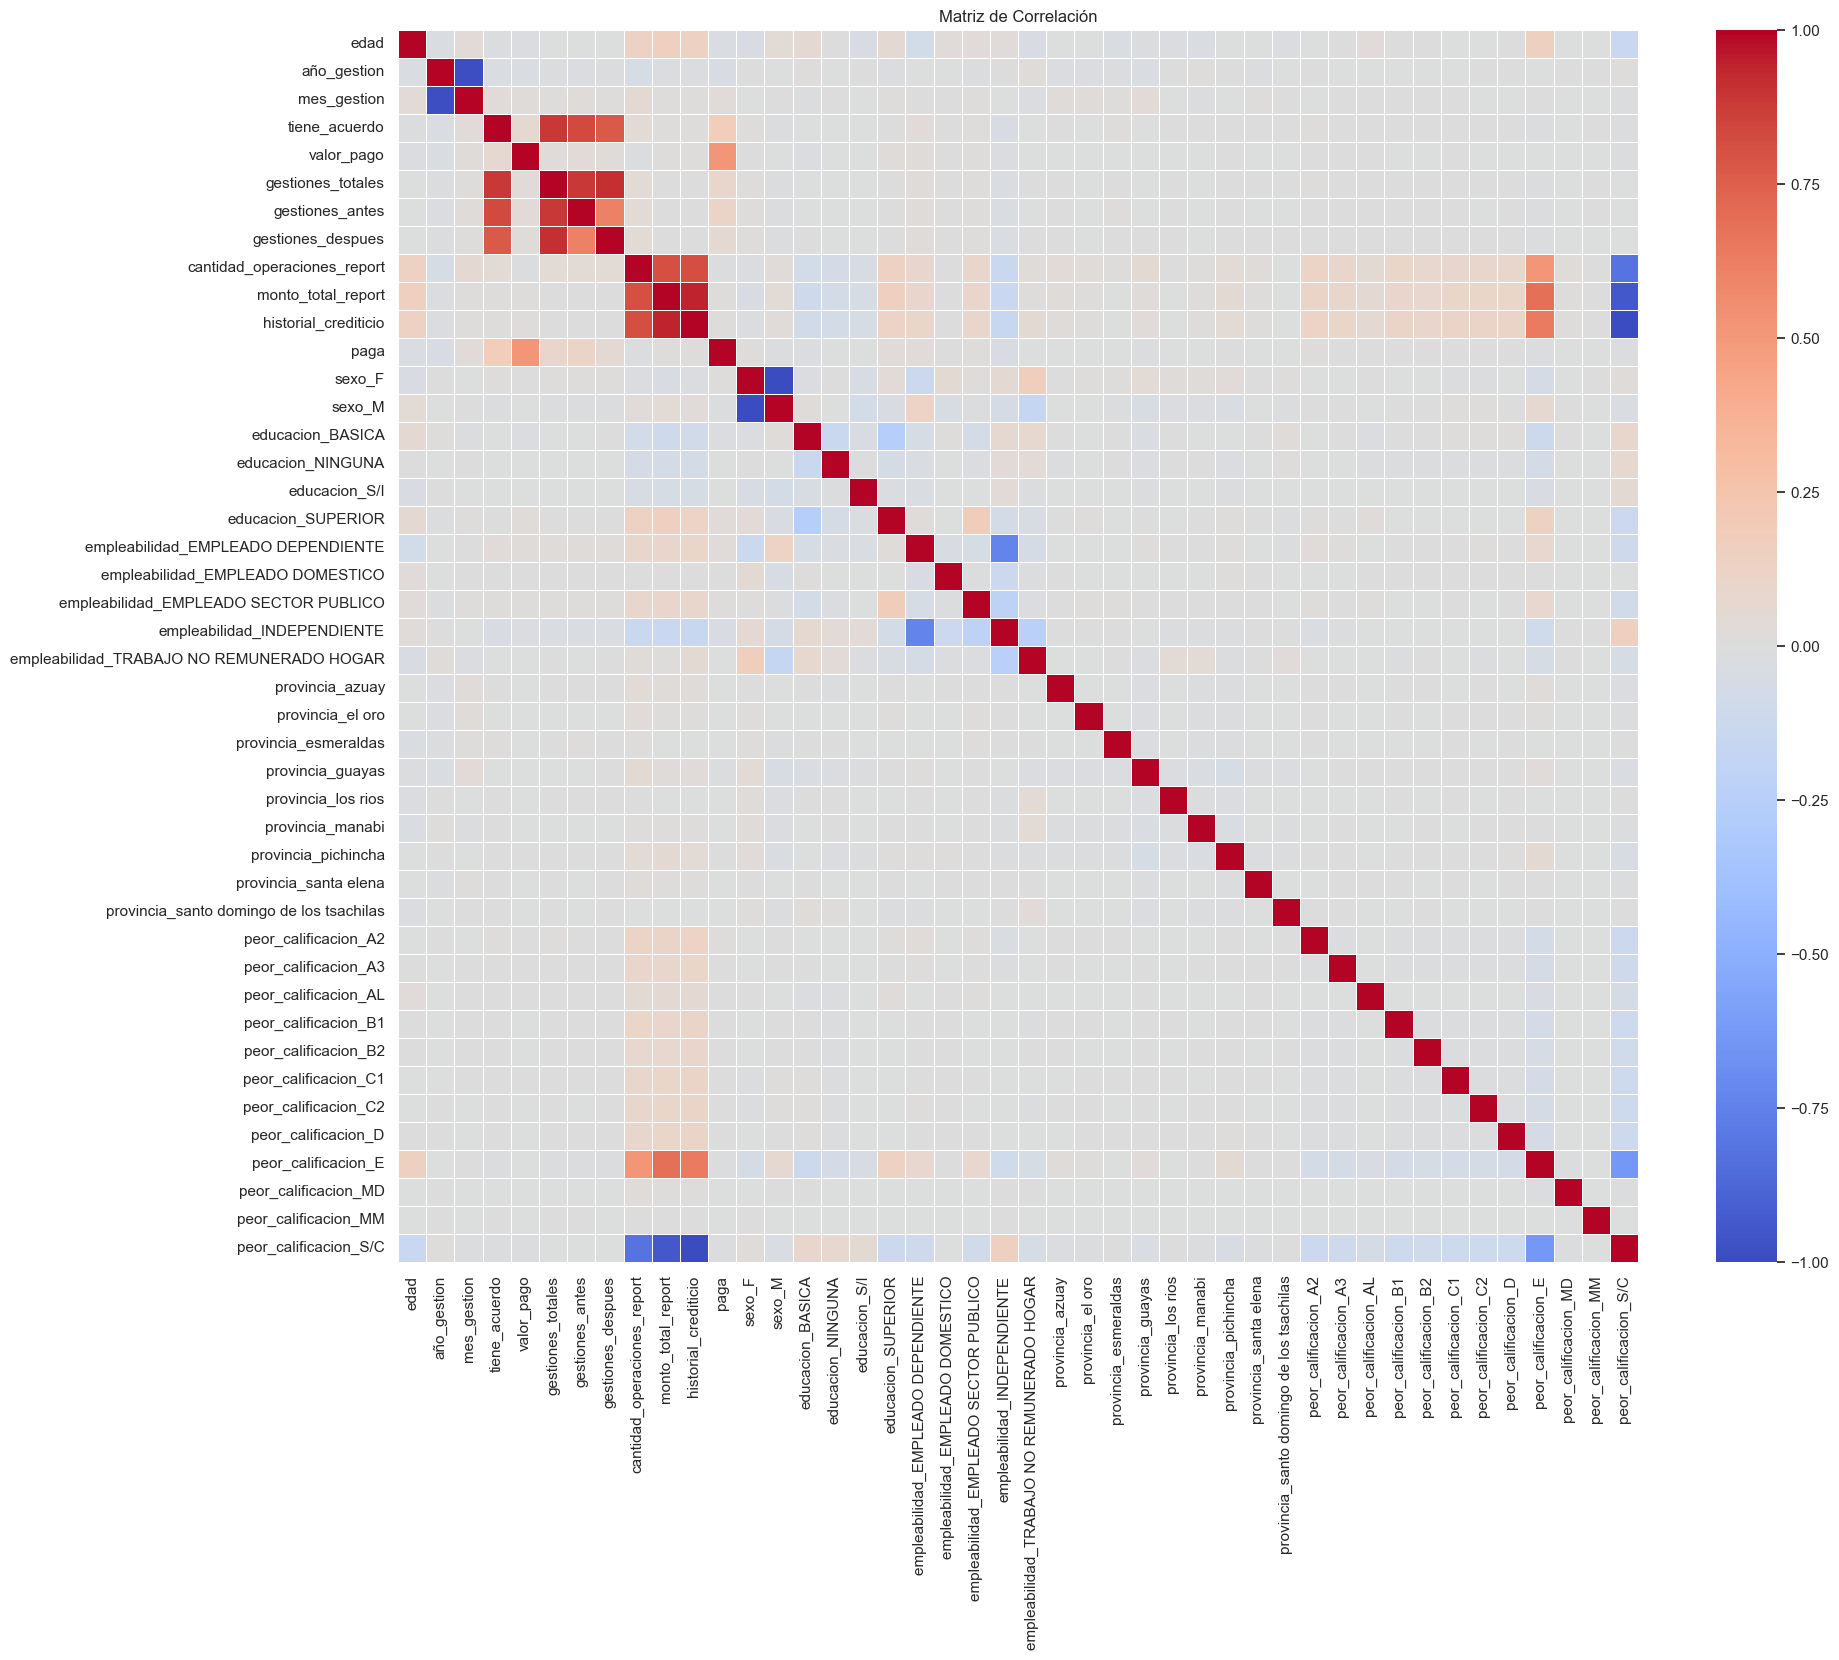

In [830]:
correlation_matrix = consolidado.corr()

plt.figure(figsize=(20, 16))  # Ajusta el tamaño según lo necesites
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [831]:
correlation_matrix.columns

Index(['edad', 'año_gestion', 'mes_gestion', 'tiene_acuerdo', 'valor_pago',
       'gestiones_totales', 'gestiones_antes', 'gestiones_despues',
       'cantidad_operaciones_report', 'monto_total_report',
       'historial_crediticio', 'paga', 'sexo_F', 'sexo_M', 'educacion_BASICA',
       'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR',
       'empleabilidad_EMPLEADO DEPENDIENTE',
       'empleabilidad_EMPLEADO DOMESTICO',
       'empleabilidad_EMPLEADO SECTOR PUBLICO', 'empleabilidad_INDEPENDIENTE',
       'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 'provincia_azuay',
       'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas',
       'provincia_los rios', 'provincia_manabi', 'provincia_pichincha',
       'provincia_santa elena', 'provincia_santo domingo de los tsachilas',
       'peor_calificacion_A2', 'peor_calificacion_A3', 'peor_calificacion_AL',
       'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1',
       'peor_calificacion_C2', 'peo

In [832]:
'''import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data):
    data_with_const = data.copy()
    data_with_const["const"] = 1  # Constante para el intercepto
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data.shape[1])]
    return vif_data

# Selección de variables
variables_gestion = consolidado[[
    'tiene_acuerdo',
    'gestiones_antes', 
    'gestiones_despues'
]]

# Calcular VIF
vif_resultados = calculate_vif(variables_gestion)

# Resto del código para el gráfico (ya está correcto)
plt.figure(figsize=(10, 6))
sns.barplot(
    x="VIF", 
    y="Variable", 
    data=vif_resultados,
    palette="viridis"
)

plt.title("Factor de Inflación de Varianza (VIF)", fontsize=14, pad=20)
plt.xlabel("VIF", fontsize=12)
plt.ylabel("Variable", fontsize=12)
plt.axvline(x=5, color='red', linestyle='--', label="Umbral VIF=5")
plt.axvline(x=10, color='orange', linestyle='--', label="Umbral VIF=10")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)

for index, value in enumerate(vif_resultados["VIF"]):
    plt.text(value + 0.1, index, f"{value:.2f}", va="center")

plt.tight_layout()
!plt.show()'''

'import matplotlib.pyplot as plt\nimport seaborn as sns\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\n\ndef calculate_vif(data):\n    data_with_const = data.copy()\n    data_with_const["const"] = 1  # Constante para el intercepto\n    vif_data = pd.DataFrame()\n    vif_data["Variable"] = data.columns\n    vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data.shape[1])]\n    return vif_data\n\n# Selección de variables\nvariables_gestion = consolidado[[\n    \'tiene_acuerdo\',\n    \'gestiones_antes\', \n    \'gestiones_despues\'\n]]\n\n# Calcular VIF\nvif_resultados = calculate_vif(variables_gestion)\n\n# Resto del código para el gráfico (ya está correcto)\nplt.figure(figsize=(10, 6))\nsns.barplot(\n    x="VIF", \n    y="Variable", \n    data=vif_resultados,\n    palette="viridis"\n)\n\nplt.title("Factor de Inflación de Varianza (VIF)", fontsize=14, pad=20)\nplt.xlabel("VIF", fontsize=12)\nplt.ylabel("Variable", font

In [833]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [834]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definir variables predictoras y objetivo (BINOMIAL)
X = consolidado[['tiene_acuerdo', 'gestiones_antes', 'gestiones_despues', 'gestiones_totales']]  # Variables predictoras
y = consolidado['paga']  # Nueva variable objetivo: 0 = no paga, 1 = paga

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Mantiene la proporción de clases
)

# ---------------------------
# 📌 Modelo de Random Forest (BINOMIAL)
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia de variables
importancia_rf = pd.DataFrame({'Variable': X.columns, 'Importancia': rf.feature_importances_})
print("\nImportancia de variables en Random Forest:\n", importancia_rf)

# ---------------------------
# 📌 Modelo de Regresión Logística (BINOMIAL)
# ---------------------------
# Ajuste: Eliminar 'multi_class' (ahora es binario)
lr = LogisticRegression(solver='lbfgs', max_iter=1000)  # Parámetro por defecto: multi_class='auto'
lr.fit(X_train, y_train)

# Coeficientes (solo 1 fila para binario)
importancia_lr = pd.DataFrame({'Variable': X.columns, 'Coeficiente': lr.coef_[0]})
print("\nCoeficientes en Regresión Logística:\n", importancia_lr)

# ---------------------------
# Evaluación de modelos
# ---------------------------
# Predicciones
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Precisión
print("\nPrecisión Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Precisión Regresión Logística:", accuracy_score(y_test, y_pred_lr))

# Reporte de clasificación (BINOMIAL: 0 y 1)
print("\nReporte de clasificación Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nReporte de clasificación Regresión Logística:\n", classification_report(y_test, y_pred_lr))



Importancia de variables en Random Forest:
             Variable  Importancia
0      tiene_acuerdo     0.184570
1    gestiones_antes     0.240083
2  gestiones_despues     0.223066
3  gestiones_totales     0.352282

Coeficientes en Regresión Logística:
             Variable  Coeficiente
0      tiene_acuerdo     3.503828
1    gestiones_antes    -0.024861
2  gestiones_despues    -0.158125
3  gestiones_totales    -0.182985

Precisión Random Forest: 0.9903831049829828
Precisión Regresión Logística: 0.9895976961340431

Reporte de clasificación Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     56748
           1       0.25      0.00      0.01       547

    accuracy                           0.99     57295
   macro avg       0.62      0.50      0.50     57295
weighted avg       0.98      0.99      0.99     57295


Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

         

In [835]:
# Eliminar variables redundantes
consolidado = consolidado.drop(columns=[
    'año_gestion', #redundante con mes_gestion
    'sexo_M', #alta colinealidad
    'sexo_F',
    'historial_crediticio', #redundante con variables de riesgos, indica si existe información de riesgos
    'gestiones_antes', #no tiene mucha relacion con el objetivo del modelo
    'gestiones_despues'
])

In [836]:
# Verificar el cambio de tipo
print(consolidado.dtypes)

edad                                           int64
mes_gestion                                    int64
tiene_acuerdo                                  int32
valor_pago                                   float64
gestiones_totales                              int64
cantidad_operaciones_report                    int32
monto_total_report                           float64
paga                                           int32
educacion_BASICA                               int64
educacion_NINGUNA                              int64
educacion_S/I                                  int64
educacion_SUPERIOR                             int64
empleabilidad_EMPLEADO DEPENDIENTE             int64
empleabilidad_EMPLEADO DOMESTICO               int64
empleabilidad_EMPLEADO SECTOR PUBLICO          int64
empleabilidad_INDEPENDIENTE                    int64
empleabilidad_TRABAJO NO REMUNERADO HOGAR      int64
provincia_azuay                                int64
provincia_el oro                              

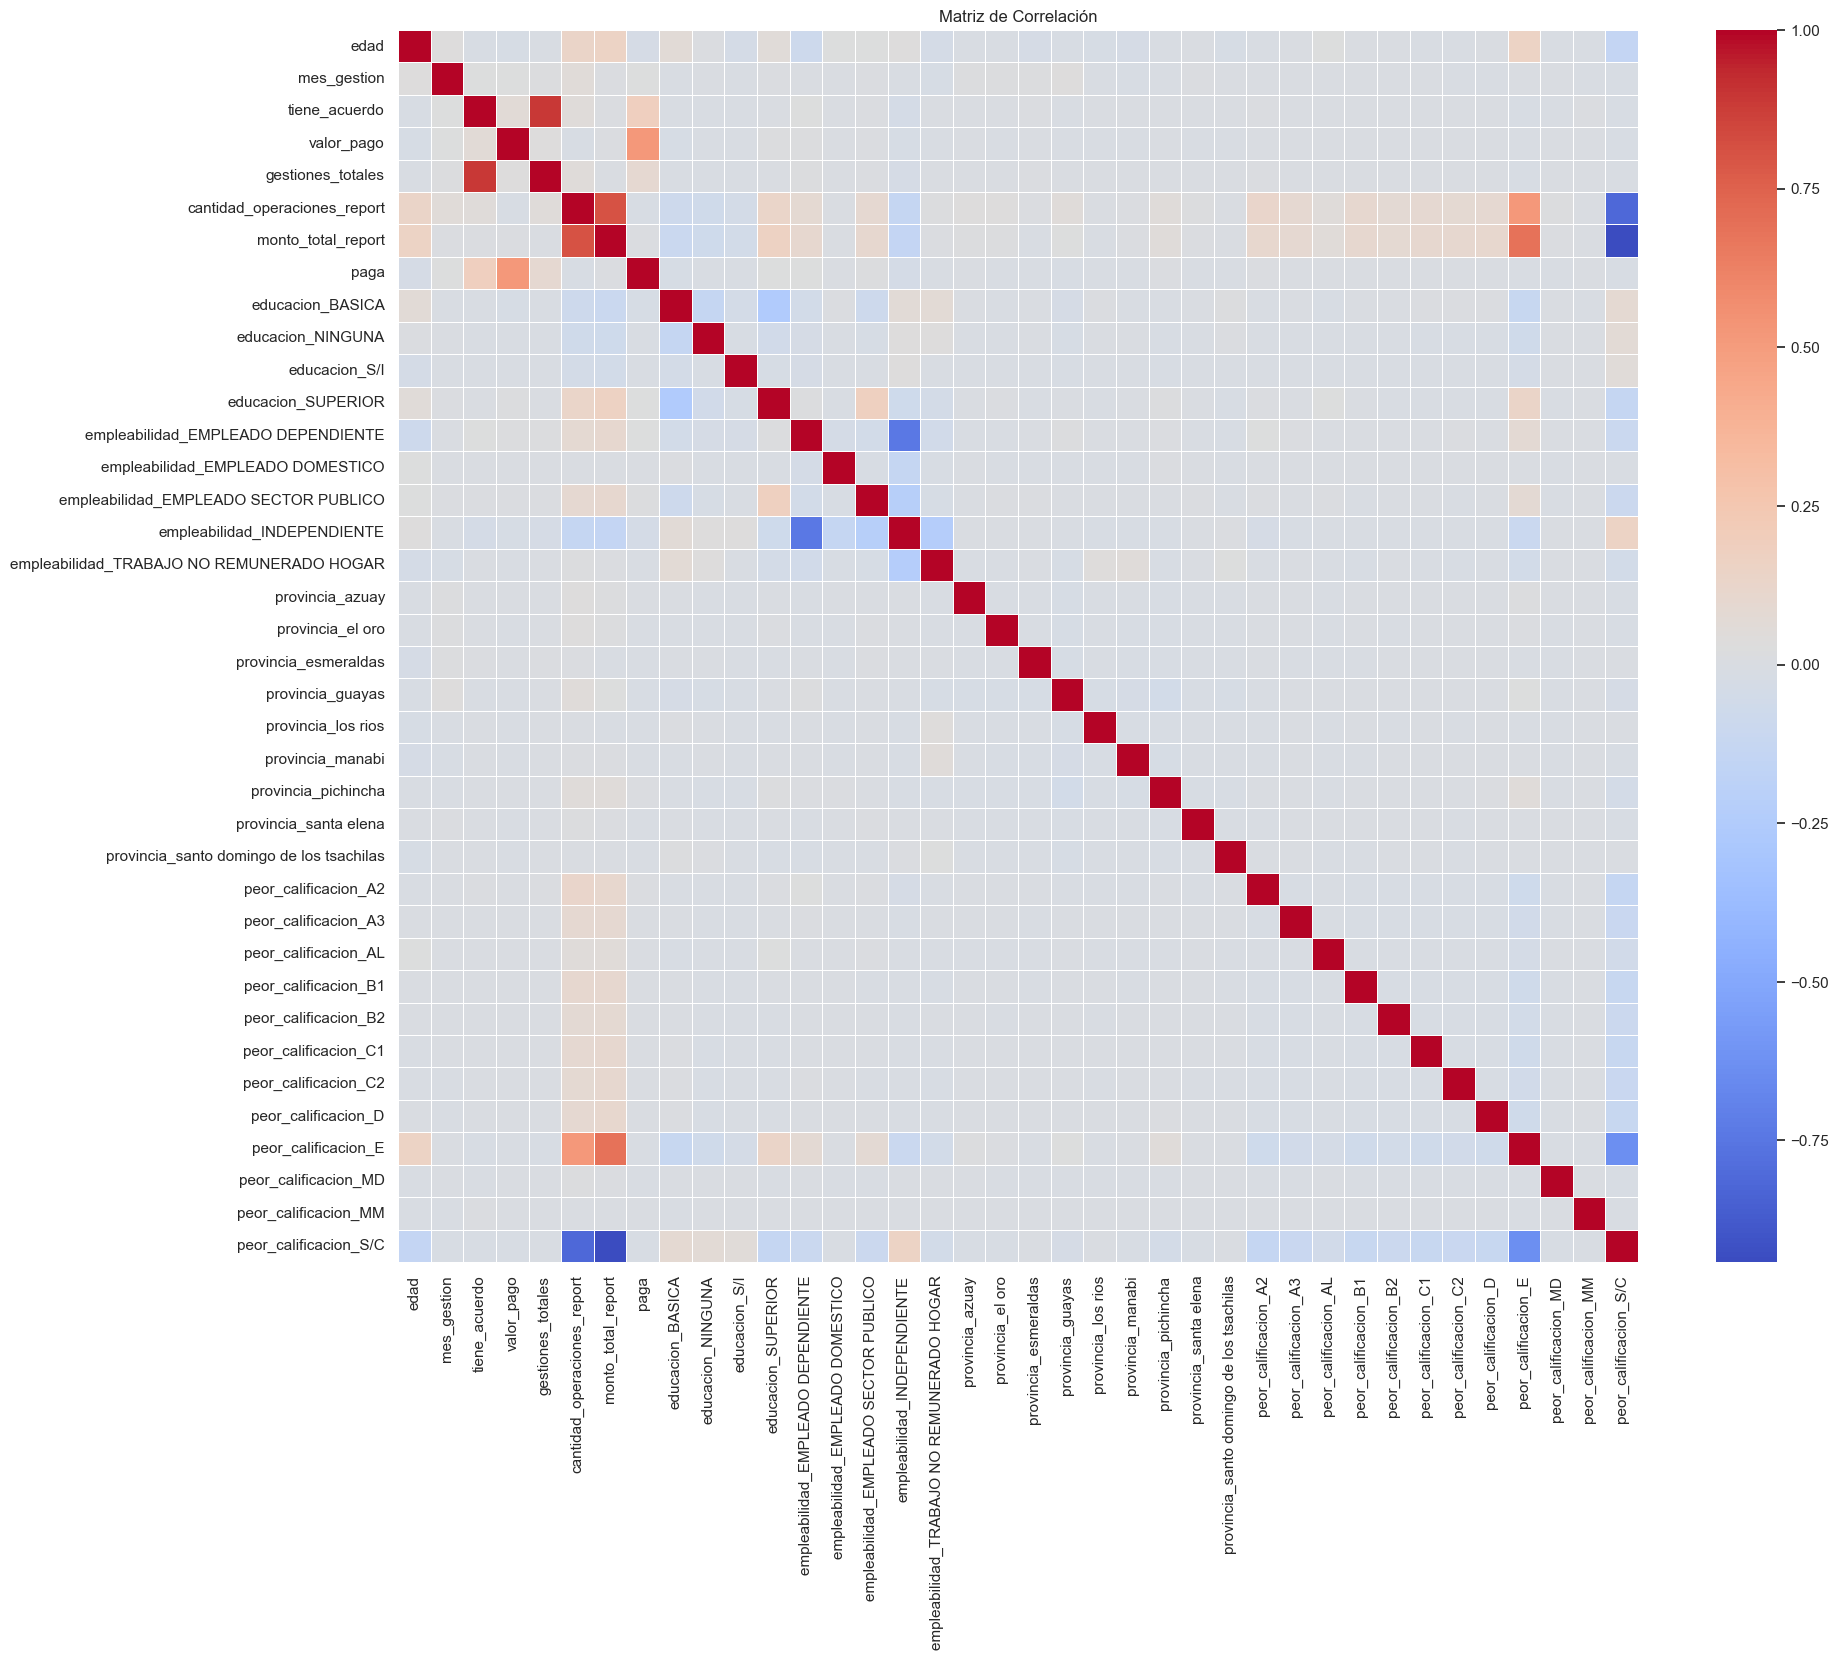

In [837]:
correlation_matrix = consolidado.corr()

plt.figure(figsize=(20, 16))  # Ajusta el tamaño según lo necesites
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [838]:
numerical_df = consolidado.select_dtypes(include=['number'])
numerical_df.corr()

edad  mes_gestion  \
edad                                       1.000000     0.031429   
mes_gestion                                0.031429     1.000000   
tiene_acuerdo                             -0.012049     0.023829   
valor_pago                                -0.020246     0.023269   
gestiones_totales                         -0.006280     0.015479   
cantidad_operaciones_report                0.140127     0.058461   
monto_total_report                         0.157368     0.010229   
paga                                      -0.025100     0.026228   
educacion_BASICA                           0.060302    -0.008187   
educacion_NINGUNA                          0.007362     0.004521   
educacion_S/I                             -0.036507    -0.004052   
educacion_SUPERIOR                         0.058422     0.013505   
empleabilidad_EMPLEADO DEPENDIENTE        -0.083051     0.004224   
empleabilidad_EMPLEADO DOMESTICO           0.023482     0.001091   
empleabilidad_EMPLEADO SECTOR PUBLICO      0.026936     0.009196   
empleabilidad_INDEPENDIENTE                0.029834    -0.004164   
empleabilidad_TRABAJO NO REMUNERADO HOGAR -0.038241    -0.016703   
provincia_azuay                           -0.002012     0.017946   
provincia_el oro                          -0.004266     0.019705   
provincia_esmeraldas                      -0.024794     0.014277   
provincia_guayas                          -0.012399     0.032453   
provincia_los rios                        -0.017223    -0.001584   
provincia_manabi                          -0.025800    -0.010709   
provincia_pichincha                       -0.001900    -0.004955   
provincia_santa elena                     -0.000041     0.009846   
provincia_santo domingo de los tsachilas  -0.016981     0.004073   
peor_calificacion_A2                      -0.004430    -0.000536   
peor_calificacion_A3                       0.000950     0.000854   
peor_calificacion_AL                       0.028779     0.001919   
peor_calificacion_B1                       0.001248     0.000973   
peor_calificacion_B2                       0.001624     0.000427   
peor_calificacion_C1                      -0.002798     0.001431   
peor_calificacion_C2                      -0.004123    -0.001907   
peor_calificacion_D                        0.002948    -0.001288   
peor_calificacion_E                        0.152798     0.006329   
peor_calificacion_MD                      -0.001472    -0.000426   
peor_calificacion_MM                      -0.002388    -0.002337   
peor_calificacion_S/C                     -0.142895    -0.010548   

                                           tiene_acuerdo  valor_pago  \
edad                                           -0.012049   -0.020246   
mes_gestion                                     0.023829    0.023269   
tiene_acuerdo                                   1.000000    0.063984   
valor_pago                                      0.063984    1.000000   
gestiones_totales                               0.888919    0.029517   
cantidad_operaciones_report                     0.046748   -0.009847   
monto_total_report                              0.008410    0.010024   
paga                                            0.183421    0.522045   
educacion_BASICA                               -0.003373   -0.017155   
educacion_NINGUNA                              -0.007661   -0.004266   
educacion_S/I                                  -0.004468   -0.002762   
educacion_SUPERIOR                              0.005402    0.019732   
empleabilidad_EMPLEADO DEPENDIENTE              0.026837    0.018909   
empleabilidad_EMPLEADO DOMESTICO                0.004100    0.000062   
empleabilidad_EMPLEADO SECTOR PUBLICO           0.010895    0.012930   
empleabilidad_INDEPENDIENTE                    -0.034534   -0.020094   
empleabilidad_TRABAJO NO REMUNERADO HOGAR      -0.000034   -0.003072   
provincia_azuay                                 0.002225   -0.000840   
provincia_el oro          

In [839]:
encabezados = consolidado.columns.tolist()
print (encabezados)

['edad', 'mes_gestion', 'tiene_acuerdo', 'valor_pago', 'gestiones_totales', 'cantidad_operaciones_report', 'monto_total_report', 'paga', 'educacion_BASICA', 'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 'peor_calificacion_MM', 'peor_calificacion_S/C']


In [840]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [841]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Definir las variables predictoras
var_predictoras = ['edad', 'mes_gestion', 'tiene_acuerdo', 'gestiones_totales', 
                   'cantidad_operaciones_report', 'monto_total_report', 'educacion_BASICA', 
                   'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 
                   'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 
                   'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 
                   'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 
                   'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 
                   'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 
                   'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 
                   'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 
                   'peor_calificacion_MM', 'peor_calificacion_S/C']

# Añadir una constante para el cálculo del VIF (intercepto)
X = add_constant(consolidado[var_predictoras])

# Calcular el VIF para cada variable de manera eficiente utilizando una sola operación
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Eliminar el valor de 'const'
vif_data = vif_data[vif_data["feature"] != "const"]

# Ordenar los resultados por VIF en orden descendente
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

# Mostrar los resultados ordenados
print(vif_data_sorted)

                                      feature        VIF
6                          monto_total_report  10.670311
36                      peor_calificacion_S/C   9.971185
3                               tiene_acuerdo   4.775145
4                           gestiones_totales   4.770959
14                empleabilidad_INDEPENDIENTE   3.649525
11         empleabilidad_EMPLEADO DEPENDIENTE   3.226509
5                 cantidad_operaciones_report   3.167267
33                        peor_calificacion_E   2.642797
15  empleabilidad_TRABAJO NO REMUNERADO HOGAR   1.353831
13      empleabilidad_EMPLEADO SECTOR PUBLICO   1.282077
10                         educacion_SUPERIOR   1.137495
7                            educacion_BASICA   1.137119
25                       peor_calificacion_A2   1.107000
12           empleabilidad_EMPLEADO DOMESTICO   1.099081
32                        peor_calificacion_D   1.088176
30                       peor_calificacion_C1   1.085313
28                       peor_c

* No colinealidad perfecta ni semi-perfecta en los predictores

In [842]:
correlation_matrix = consolidado.corr()
corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
cols_high_corr = [column for column in upper_tri.columns if any(upper_tri[column] == 1.0)]
print("Columnas altamente correlacionadas:", cols_high_corr)

Columnas altamente correlacionadas: []


In [843]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Modelo de regresion logistica sin balanceo

         Current function value: 0.044317
         Iterations: 35

--- Modelo SIN Balanceo ---


c:\Users\staimal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                   paga   No. Observations:               200530
Model:                          Logit   Df Residuals:                   200493
Method:                           MLE   Df Model:                           36
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.1781
Time:                        11:07:52   Log-Likelihood:                -8886.8
converged:                      False   LL-Null:                       -10813.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -3.1553      0.199    -15.892      0.000      -3.544      -2.766
edad                                  

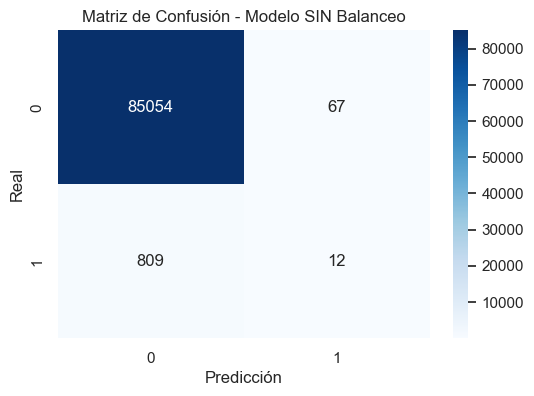


Exactitud: 98.98%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     85121
           1       0.15      0.01      0.03       821

    accuracy                           0.99     85942
   macro avg       0.57      0.51      0.51     85942
weighted avg       0.98      0.99      0.99     85942



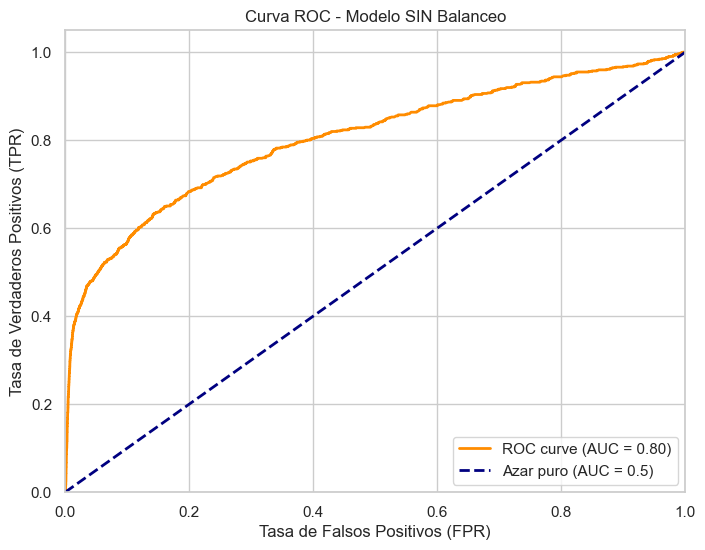

In [844]:
# Importar bibliotecas necesarias
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
import imblearn

# Dividir los datos en variables predictoras (X) y objetivo (y)
X = consolidado[['edad', 'mes_gestion', 'tiene_acuerdo', 'gestiones_totales',
                    'cantidad_operaciones_report', 'monto_total_report', 'educacion_BASICA', 
                    'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 
                    'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 
                    'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 
                    'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 
                    'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 
                    'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 
                    'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 
                    'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 
                    'peor_calificacion_MM', 'peor_calificacion_S/C']]
y = consolidado["paga"]

# Dividir los datos en conjunto de entrenamiento y prueba (misma semilla para ambos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Modelo 1: Sin balanceo (datos originales) ###
# Agregar constante para el término independiente
X_train_sm = sm.add_constant(X_train)

# Crear y ajustar el modelo de regresión logística con Statsmodels
modelo_sin_balanceo = sm.Logit(y_train, X_train_sm)
resultado_sin_balanceo = modelo_sin_balanceo.fit()

# Predicciones en el conjunto de prueba
X_test_sm = sm.add_constant(X_test)
y_pred_sin_balanceo = (resultado_sin_balanceo.predict(X_test_sm) >= 0.5).astype(int)

# Evaluación del modelo sin balanceo
print("\n--- Modelo SIN Balanceo ---")
print(resultado_sin_balanceo.summary())
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_sin_balanceo))
print("\nExactitud: {:.2f}%".format(accuracy_score(y_test, y_pred_sin_balanceo) * 100))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_sin_balanceo))
    
    # Función para graficar la matriz de confusión
def graficar_matriz_confusion(cm, titulo):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(titulo)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

# Predicciones en el conjunto de prueba
X_test_sm = sm.add_constant(X_test)
y_pred_sin_balanceo = (resultado_sin_balanceo.predict(X_test_sm) >= 0.5).astype(int)

# Evaluación del modelo sin balanceo
print("\n--- Evaluación del Modelo SIN Balanceo ---")
cm_sin = confusion_matrix(y_test, y_pred_sin_balanceo)
print("Matriz de Confusión:")
print(cm_sin)
graficar_matriz_confusion(cm_sin, "Matriz de Confusión - Modelo SIN Balanceo")
exactitud_sin = accuracy_score(y_test, y_pred_sin_balanceo) * 100
print("\nExactitud: {:.2f}%".format(exactitud_sin))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_sin_balanceo))

# Calcular probabilidades para ROC
y_proba_sin_balanceo = resultado_sin_balanceo.predict(X_test_sm)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_sin_balanceo)
roc_auc = roc_auc_score(y_test, y_proba_sin_balanceo)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar puro (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo SIN Balanceo')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
    

Clases extremadamente desbalanceadas: 198,615 casos "No paga" (99%) vs 1,915 "Paga" (1%).

Método: Regresión Logística estándar (sin ajuste de pesos de clase ni balanceo).

2. Interpretación de los Coeficientes:
Variable	Coeficiente	Significado
const	-5.39	Probabilidad base muy baja de "Paga".
educacion	+0.10	Mayor educación aumenta levemente la probabilidad.
provincia	-0.03	Ubicación en cierta provincia reduce probabilidad.
mes_gestion	+0.06	Meses recientes de gestión aumentan probabilidad.
gestiones_despues	+0.12	Más gestiones posteriores correlacionan con pago.
monto_total_report	+0.03	Mayor monto reportado incrementa probabilidad.
Variables significativas: Todas tienen p-valor < 0.05 (excepto provincia, p=0.029).

3. Métricas Clave:
Reporte de Clasificación:
* Clase 1 (Paga):
Precisión = 0% → Ninguna predicción "Paga" fue correcta.
Recall = 0% → No detectó ningún caso real de pago.
F1-Score = 0% → Modelo inútil para la clase minoritaria.
* Clase 0 (No paga):
Precisión = 99% → Predicciones casi perfectas para la clase mayoritaria.
Recall = 100% → Todos los "No paga" se clasificaron correctamente.
Exactitud (Accuracy): 99% → Engañosa, solo refleja el dominio de la clase 0.

4. Diagnóstico del Problema:
Fallo catastrófico en la clase minoritaria: El modelo predice solo la clase 0 (evidenciado por precisión/recall = 0% en clase 1).
5. Comparación con Modelos Anteriores (Random Forest):
Métrica	Regresión Logística (sin balanceo)	Random Forest (sin balanceo)
Recall (Paga)	0%	1%
Precisión (Paga)	0%	32%
Exactitud	99%	99%


Modelo de regresion logistica con balanceo SMOTE


--- Modelo CON Balanceo (SMOTE) ---

Matriz de Confusión:
[[71372 13749]
 [  359   462]]


c:\Users\staimal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


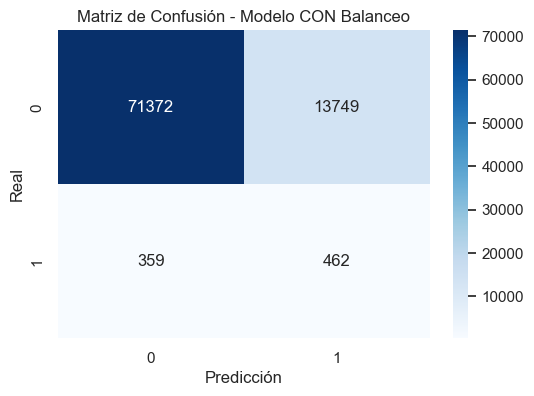


Exactitud: 83.58%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     85121
           1       0.03      0.56      0.06       821

    accuracy                           0.84     85942
   macro avg       0.51      0.70      0.49     85942
weighted avg       0.99      0.84      0.90     85942



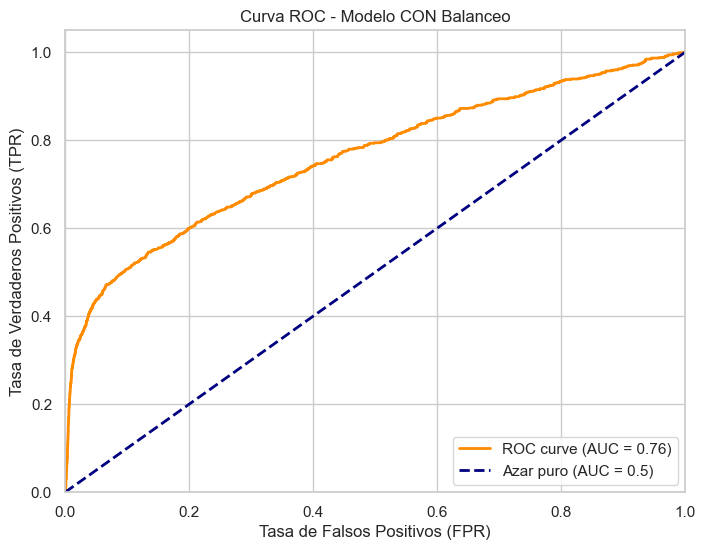

In [845]:
# Importar bibliotecas necesarias
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los datos en variables predictoras (X) y objetivo (y)
X = consolidado[['edad', 'mes_gestion', 'tiene_acuerdo', 'gestiones_totales',
                    'cantidad_operaciones_report', 'monto_total_report', 'educacion_BASICA', 
                    'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 
                    'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 
                    'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 
                    'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 
                    'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 
                    'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 
                    'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 
                    'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 
                    'peor_calificacion_MM', 'peor_calificacion_S/C']]
y = consolidado["paga"]

# Dividir los datos en conjunto de entrenamiento y prueba (misma semilla para ambos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE solo en el conjunto de entrenamiento para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear y ajustar el modelo de regresión logística con scikit-learn
modelo_con_balanceo = LogisticRegression(random_state=42)
modelo_con_balanceo.fit(X_train_smote, y_train_smote)

# Predicciones en el conjunto de prueba
y_pred_con_balanceo = modelo_con_balanceo.predict(X_test)

# Evaluación del modelo con balanceo
print("\n--- Modelo CON Balanceo (SMOTE) ---")
print("\nMatriz de Confusión:")
cm_balanceo = confusion_matrix(y_test, y_pred_con_balanceo)
print(cm_balanceo)

# Función para graficar la matriz de confusión
def graficar_matriz_confusion(cm, titulo):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(titulo)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Graficar la matriz de confusión
graficar_matriz_confusion(cm_balanceo, "Matriz de Confusión - Modelo CON Balanceo")

# Exactitud
exactitud_balanceo = accuracy_score(y_test, y_pred_con_balanceo) * 100
print("\nExactitud: {:.2f}%".format(exactitud_balanceo))

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_con_balanceo))

# Calcular probabilidades para ROC
y_proba_balanceo = modelo_con_balanceo.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_balanceo)
roc_auc = roc_auc_score(y_test, y_proba_balanceo)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar puro (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo CON Balanceo')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Balanceo con SMOTE: Se generaron 198,615 muestras sintéticas de la clase minoritaria (Paga), equilibrando las clases.
Muestra total: 397,230 observaciones (doble del dataset original por SMOTE).
2. Interpretación de los Coeficientes:
Variable	Coeficiente	Significado
const	-0.88	Probabilidad base de "Paga" más alta que en el modelo sin balanceo (-5.39).
gestiones_despues	+0.31	Variable más influyente: Cada gestión posterior aumenta la probabilidad de pago.
mes_gestion	+0.07	Meses recientes de gestión tienen leve impacto positivo.
educacion	+0.08	Mayor educación correlaciona con mayor probabilidad de pago.
monto_total_report	+0.04	Montos altos reportados incrementan la probabilidad.
provincia	-0.02	Ubicación en cierta provincia reduce la probabilidad.
Todas las variables son significativas (p-valor = 0.000), pero los coeficientes son pequeños.
3. Métricas Clave:
* Clase 1 (Paga):
Precisión = 2% → Solo el 2% de las predicciones "Paga" son correctas (97-98% falsas alarmas).
Recall = 59% → Detecta el 59% de los pagadores reales (similar al Random Forest con SMOTE).
F1-Score = 0.03 → Muy bajo, pero mejor que la regresión logística sin balanceo (0%).
* Clase 0 (No paga):
Precisión = 99% → Casi todas las predicciones "No paga" son correctas.
Recall = 64% → El 36% de los "No paga" se clasifican erróneamente como "Paga".
Exactitud (Accuracy): 62% → Engañosa, ya que el modelo prioriza recall de la clase 1 a costa de falsos positivos.

RANDOM FOREST

Random Forest 1: Modelo sin balanceo 


Matriz de Confusión:
[[85099    22]
 [  744    77]]


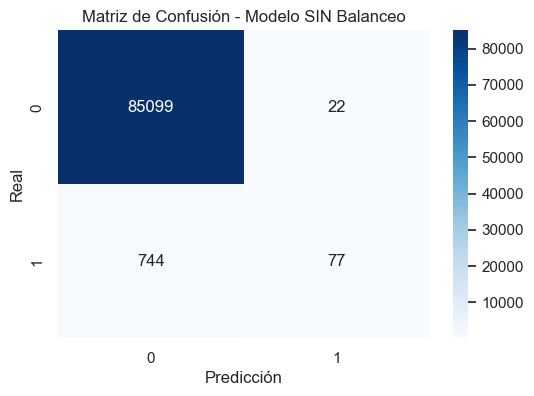


Exactitud: 99.11%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85121
           1       0.78      0.09      0.17       821

    accuracy                           0.99     85942
   macro avg       0.88      0.55      0.58     85942
weighted avg       0.99      0.99      0.99     85942



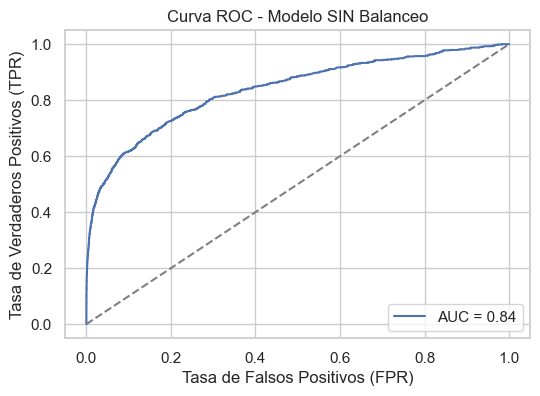

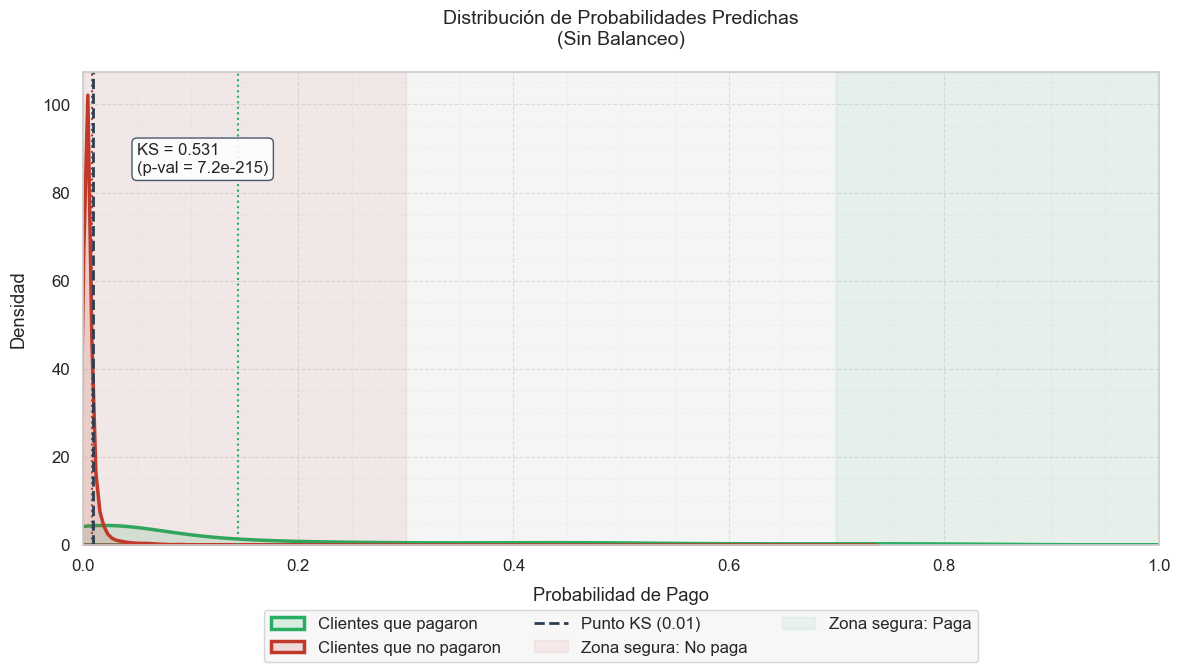

In [846]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp

# Configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Función para graficar la matriz de confusión
def graficar_matriz_confusion(cm, titulo):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(titulo)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Función para graficar la curva ROC
def graficar_roc_curve(fpr, tpr, auc_score, titulo):
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(titulo)
    plt.legend(loc='lower right')
    plt.show()

# Preparación de los datos
X = pd.get_dummies(consolidado[['edad', 'mes_gestion', 'tiene_acuerdo', 'gestiones_totales', 
                    'cantidad_operaciones_report', 'monto_total_report', 'educacion_BASICA', 
                    'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 
                    'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 
                    'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 
                    'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 
                    'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 
                    'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 
                    'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 
                    'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 
                    'peor_calificacion_MM', 'peor_calificacion_S/C']], drop_first=True)
y = consolidado["paga"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear y ajustar modelo
modelo_sin_balanceo_rf = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=15)
modelo_sin_balanceo_rf.fit(X_train, y_train)

# Predicciones
y_pred_sin_balanceo_rf = modelo_sin_balanceo_rf.predict(X_test)
y_pred_prob = modelo_sin_balanceo_rf.predict_proba(X_test)[:, 1]

# Evaluación
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_sin_balanceo_rf)
print(cm)
graficar_matriz_confusion(cm, "Matriz de Confusión - Modelo SIN Balanceo")
print("\nExactitud: {:.2f}%".format(accuracy_score(y_test, y_pred_sin_balanceo_rf)*100))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_sin_balanceo_rf))

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)
graficar_roc_curve(fpr, tpr, auc_score, "Curva ROC - Modelo SIN Balanceo")

# === GRÁFICO KS PERSONALIZADO ===

# Datos para el KS
prob_paga = y_pred_prob[y_test == 1]
prob_no_paga = y_pred_prob[y_test == 0]

# Calcular el estadístico KS
ks_statistic, p_value = ks_2samp(prob_paga, prob_no_paga)

# Calcular valores KS para distintos umbrales
ks_values = []
for thr in thresholds:
    ks = abs((y_pred_prob[y_test == 1] >= thr).mean() - (y_pred_prob[y_test == 0] >= thr).mean())
    ks_values.append(ks)
ks_x = thresholds[np.argmax(ks_values)]

# Estética
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['axes.facecolor'] = '#f5f5f5'

# Gráfico
fig, ax = plt.subplots(figsize=(12, 7))
paleta = {"paga": "#27ae60", "no_paga": "#c0392b"}

sns.kdeplot(x=prob_paga, color=paleta["paga"], label="Clientes que pagaron",
            linewidth=2.5, fill=True, alpha=0.15, common_norm=False, ax=ax)
sns.kdeplot(x=prob_no_paga, color=paleta["no_paga"], label="Clientes que no pagaron",
            linewidth=2.5, fill=True, alpha=0.15, common_norm=False, ax=ax)

# Líneas medias y línea KS
ax.axvline(np.mean(prob_paga), color=paleta["paga"], linestyle=":", linewidth=1.5)
ax.axvline(np.mean(prob_no_paga), color=paleta["no_paga"], linestyle=":", linewidth=1.5)
ax.axvline(ks_x, color="#2c3e50", linestyle="--", linewidth=2, label=f"Punto KS ({ks_x:.2f})")

# Zonas
ax.axvspan(0, 0.3, color=paleta["no_paga"], alpha=0.07, label="Zona segura: No paga")
ax.axvspan(0.7, 1, color=paleta["paga"], alpha=0.07, label="Zona segura: Paga")

# Anotaciones
text_box = {"boxstyle": "round", "facecolor": "white", "alpha": 0.9, "edgecolor": "#34495e"}
ax.text(0.05, 0.85, f"KS = {ks_statistic:.3f}\n(p-val = {p_value:.1e})", transform=ax.transAxes,
        bbox=text_box, fontsize=12, verticalalignment="top")

# Personalización
ax.set_title("Distribución de Probabilidades Predichas\n(Sin Balanceo)", pad=20, fontsize=14)
ax.set_xlabel("Probabilidad de Pago", labelpad=10)
ax.set_ylabel("Densidad", labelpad=10)
ax.set_xlim(0, 1)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=3, frameon=True)

# Cuadrícula
ax.grid(True, which="major", linestyle="--", linewidth=0.8, alpha=0.6)
ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)
ax.minorticks_on()

plt.tight_layout()
plt.show()

RANDOM FOREST CON BALANCEO SMOTE


Matriz de Confusión:
[[76773  8348]
 [  434   387]]


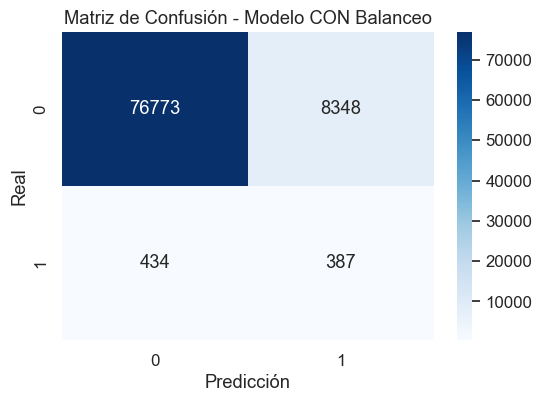


Exactitud: 89.78%

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95     85121
           1       0.04      0.47      0.08       821

    accuracy                           0.90     85942
   macro avg       0.52      0.69      0.51     85942
weighted avg       0.99      0.90      0.94     85942



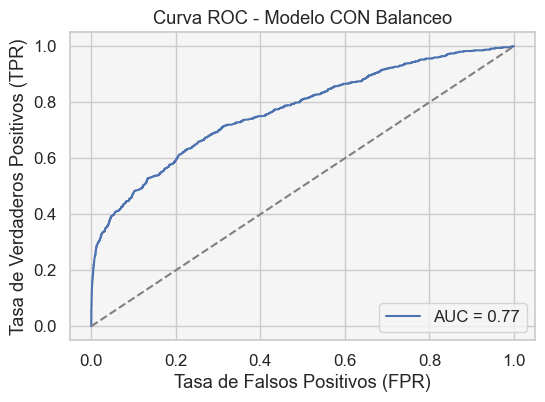

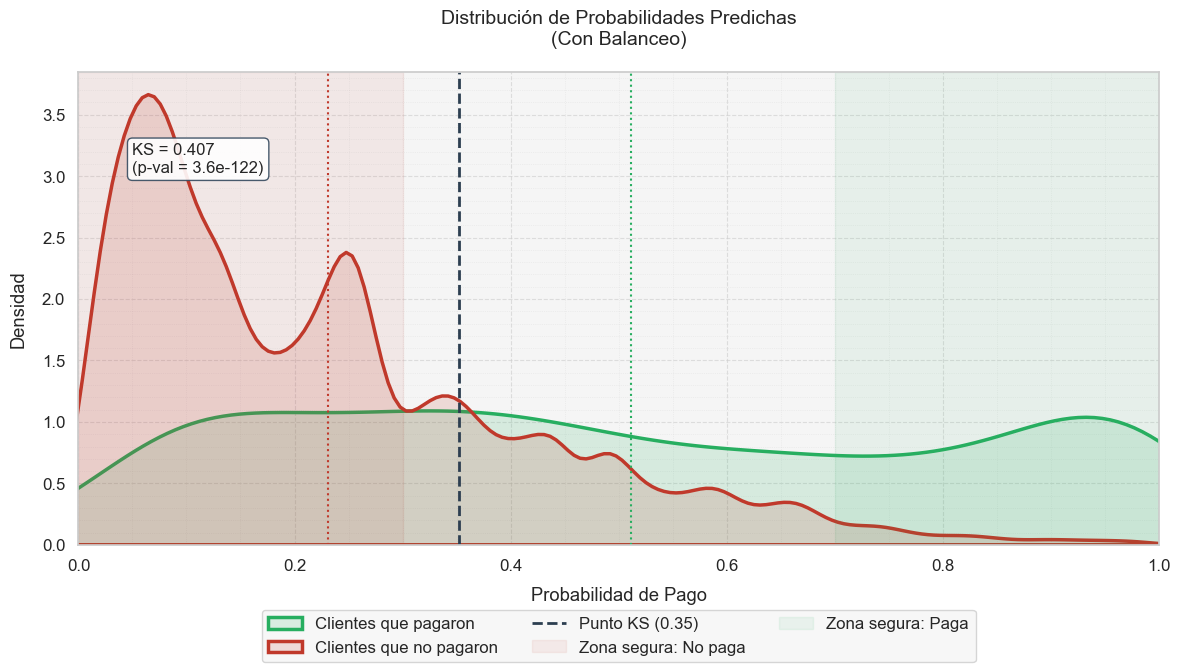

In [847]:
# Configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Función para graficar la matriz de confusión
def graficar_matriz_confusion(cm, titulo):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(titulo)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Función para graficar la curva ROC
def graficar_roc_curve(fpr, tpr, auc_score, titulo):
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia (aleatoriedad)
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(titulo)
    plt.legend(loc='lower right')
    plt.show()

# Preparación de los datos
X = pd.get_dummies(consolidado[['edad', 'mes_gestion', 'tiene_acuerdo', 'gestiones_totales', 
                    'cantidad_operaciones_report', 'monto_total_report', 'educacion_BASICA', 
                    'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 
                    'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 
                    'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 
                    'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 
                    'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 
                    'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 
                    'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 
                    'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 
                    'peor_calificacion_MM', 'peor_calificacion_S/C']], drop_first=True)
y = consolidado["paga"]

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear y ajustar modelo con RandomForest
modelo_balanceado_rf = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=15)
modelo_balanceado_rf.fit(X_train_balanced, y_train_balanced)

# Predicciones
y_pred_balanceado_rf = modelo_balanceado_rf.predict(X_test)
y_pred_prob_balanceado_rf = modelo_balanceado_rf.predict_proba(X_test)[:, 1]

# Evaluación
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_balanceado_rf)
print(cm)
graficar_matriz_confusion(cm, "Matriz de Confusión - Modelo CON Balanceo")
print("\nExactitud: {:.2f}%".format(accuracy_score(y_test, y_pred_balanceado_rf)*100))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_balanceado_rf))

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_balanceado_rf)
auc_score = auc(fpr, tpr)
graficar_roc_curve(fpr, tpr, auc_score, "Curva ROC - Modelo CON Balanceo")

# === GRÁFICO KS PERSONALIZADO ===

# Datos para el KS
prob_paga = y_pred_prob_balanceado_rf[y_test == 1]
prob_no_paga = y_pred_prob_balanceado_rf[y_test == 0]

# Calcular el estadístico KS
ks_statistic, p_value = ks_2samp(prob_paga, prob_no_paga)

# Calcular valores KS para distintos umbrales
ks_values = []
for thr in thresholds:
    ks = abs((y_pred_prob_balanceado_rf[y_test == 1] >= thr).mean() - (y_pred_prob_balanceado_rf[y_test == 0] >= thr).mean())
    ks_values.append(ks)
ks_x = thresholds[np.argmax(ks_values)]

# Estética
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['axes.facecolor'] = '#f5f5f5'

# Gráfico
fig, ax = plt.subplots(figsize=(12, 7))
paleta = {"paga": "#27ae60", "no_paga": "#c0392b"}

sns.kdeplot(x=prob_paga, color=paleta["paga"], label="Clientes que pagaron",
            linewidth=2.5, fill=True, alpha=0.15, common_norm=False, ax=ax)
sns.kdeplot(x=prob_no_paga, color=paleta["no_paga"], label="Clientes que no pagaron",
            linewidth=2.5, fill=True, alpha=0.15, common_norm=False, ax=ax)

# Líneas medias y línea KS
ax.axvline(np.mean(prob_paga), color=paleta["paga"], linestyle=":", linewidth=1.5)
ax.axvline(np.mean(prob_no_paga), color=paleta["no_paga"], linestyle=":", linewidth=1.5)
ax.axvline(ks_x, color="#2c3e50", linestyle="--", linewidth=2, label=f"Punto KS ({ks_x:.2f})")

# Zonas
ax.axvspan(0, 0.3, color=paleta["no_paga"], alpha=0.07, label="Zona segura: No paga")
ax.axvspan(0.7, 1, color=paleta["paga"], alpha=0.07, label="Zona segura: Paga")

# Anotaciones
text_box = {"boxstyle": "round", "facecolor": "white", "alpha": 0.9, "edgecolor": "#34495e"}
ax.text(0.05, 0.85, f"KS = {ks_statistic:.3f}\n(p-val = {p_value:.1e})", transform=ax.transAxes,
        bbox=text_box, fontsize=12, verticalalignment="top")

# Personalización
ax.set_title("Distribución de Probabilidades Predichas\n(Con Balanceo)", pad=20, fontsize=14)
ax.set_xlabel("Probabilidad de Pago", labelpad=10)
ax.set_ylabel("Densidad", labelpad=10)
ax.set_xlim(0, 1)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=3, frameon=True)

# Cuadrícula
ax.grid(True, which="major", linestyle="--", linewidth=0.8, alpha=0.6)
ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)
ax.minorticks_on()

plt.tight_layout()
plt.show()

Métricas por decil

Análisis de diferentes umbrales

c:\Users\staimal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\staimal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\staimal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Métricas por decil - Modelo SIN Balanceo:
                      precisión    recall       f1
deciles_sin_balanceo                              
1                      0.000000  0.000000  0.00000
2                      0.000000  0.000000  0.00000
3                      0.000000  0.000000  0.00000
4                      0.000000  0.000000  0.00000
5                      0.000000  0.000000  0.00000
6                      0.000000  0.000000  0.00000
7                      0.000000  0.000000  0.00000
8                      0.000000  0.000000  0.00000
9                      0.000000  0.000000  0.00000
10                     0.777778  0.152778  0.25539

Métricas por decil - Modelo CON Balanceo:
                      precisión   recall        f1
deciles_con_balanceo                              
1                      0.000000  0.00000  0.000000
2                      0.000000  0.00000  0.000000
3                      0.000000  0.00000  0.000000
4                      0.000000  0.00000  0.0000

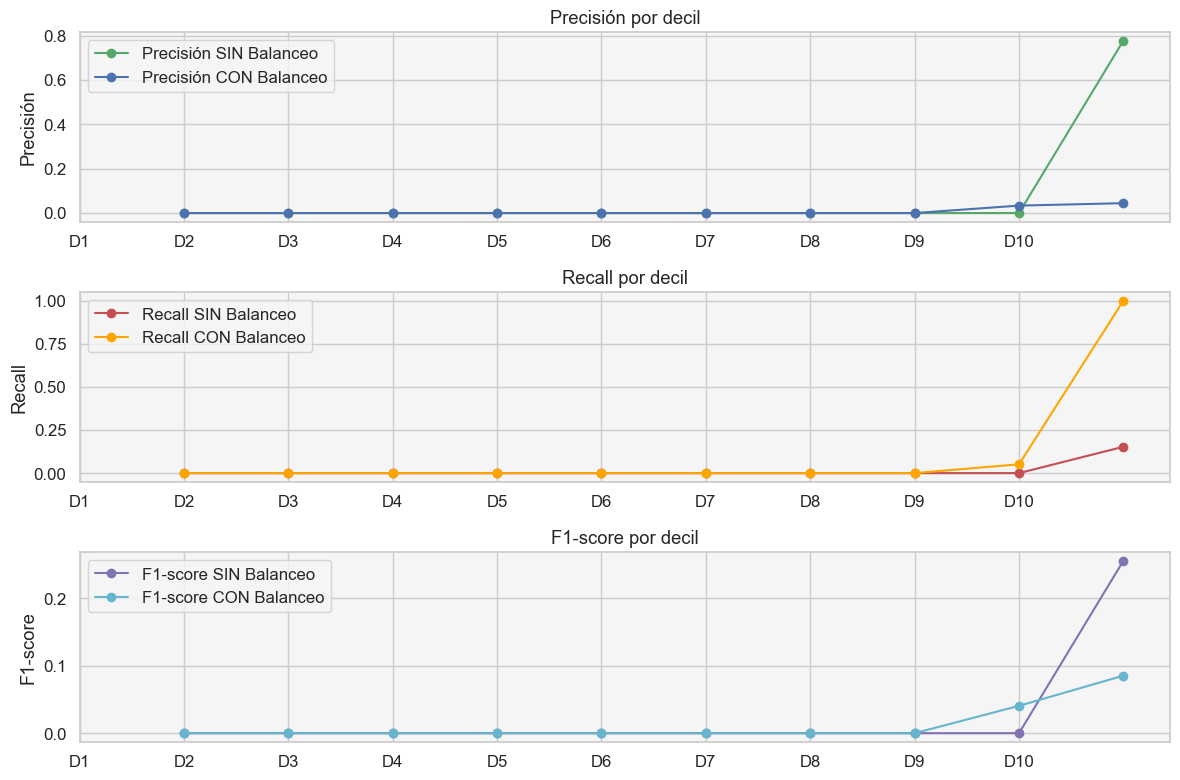

In [848]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Obtener las probabilidades predichas de la clase positiva (paga) para ambos modelos
y_pred_prob = modelo_sin_balanceo_rf.predict_proba(X_test)[:, 1]
y_pred_prob_balanceado_rf = modelo_balanceado_rf.predict_proba(X_test)[:, 1]

# Crear un DataFrame con las probabilidades y las etiquetas reales
df = pd.DataFrame({'probabilidad_sin_balanceo': y_pred_prob, 
                   'probabilidad_con_balanceo': y_pred_prob_balanceado_rf, 
                   'real': y_test})

# 1. Crear una columna con el decil al que pertenece cada cliente para ambos modelos
df['deciles_sin_balanceo'] = pd.qcut(df['probabilidad_sin_balanceo'], 10, labels=False) + 1  # Etiquetar de 1 a 10
df['deciles_con_balanceo'] = pd.qcut(df['probabilidad_con_balanceo'], 10, labels=False) + 1  # Etiquetar de 1 a 10

# 2. Crear una función para calcular las métricas por decil para cada modelo
def calcular_metricas(df_deciles, col_probabilidad):
    y_true = df_deciles['real']
    y_pred = (df_deciles[col_probabilidad] >= 0.5).astype(int)  # Usando umbral de 0.5 para la predicción
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return pd.Series({'precisión': precision, 'recall': recall, 'f1': f1})

# 3. Calcular las métricas por decil para ambos modelos
metricas_por_deciles_sin_balanceo = df.groupby('deciles_sin_balanceo').apply(calcular_metricas, 'probabilidad_sin_balanceo')
metricas_por_deciles_con_balanceo = df.groupby('deciles_con_balanceo').apply(calcular_metricas, 'probabilidad_con_balanceo')

# 4. Mostrar las métricas por decil
print("Métricas por decil - Modelo SIN Balanceo:")
print(metricas_por_deciles_sin_balanceo)
print("\nMétricas por decil - Modelo CON Balanceo:")
print(metricas_por_deciles_con_balanceo)

# 5. Graficar las métricas por decil para ambos modelos
plt.figure(figsize=(12, 8))

# Graficar precisión
plt.subplot(3, 1, 1)
plt.plot(metricas_por_deciles_sin_balanceo['precisión'], marker='o', color='g', label='Precisión SIN Balanceo')
plt.plot(metricas_por_deciles_con_balanceo['precisión'], marker='o', color='b', label='Precisión CON Balanceo')
plt.title('Precisión por decil')
plt.ylabel('Precisión')
plt.xticks(range(10), ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'])
plt.grid(True)
plt.legend()

# Graficar recall
plt.subplot(3, 1, 2)
plt.plot(metricas_por_deciles_sin_balanceo['recall'], marker='o', color='r', label='Recall SIN Balanceo')
plt.plot(metricas_por_deciles_con_balanceo['recall'], marker='o', color='orange', label='Recall CON Balanceo')
plt.title('Recall por decil')
plt.ylabel('Recall')
plt.xticks(range(10), ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'])
plt.grid(True)
plt.legend()

# Graficar F1
plt.subplot(3, 1, 3)
plt.plot(metricas_por_deciles_sin_balanceo['f1'], marker='o', color='m', label='F1-score SIN Balanceo')
plt.plot(metricas_por_deciles_con_balanceo['f1'], marker='o', color='c', label='F1-score CON Balanceo')
plt.title('F1-score por decil')
plt.ylabel('F1-score')
plt.xticks(range(10), ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

 Resultados - Modelo Balanceado:
 Umbral  Precisión   Recall  F1-score
    0.1   0.012801 0.904994  0.025245
    0.3   0.022351 0.690621  0.043301
    0.5   0.044305 0.471376  0.080996
    0.7   0.121495 0.316687  0.175616
    0.8   0.208040 0.252132  0.227974

 Resultados - Modelo Sin Balanceo:
 Umbral  Precisión   Recall  F1-score
    0.1   0.247619 0.348356  0.289474
    0.3   0.555160 0.190012  0.283122
    0.5   0.777778 0.093788  0.167391
    0.7   0.916667 0.040195  0.077013
    0.8   1.000000 0.012180  0.024067


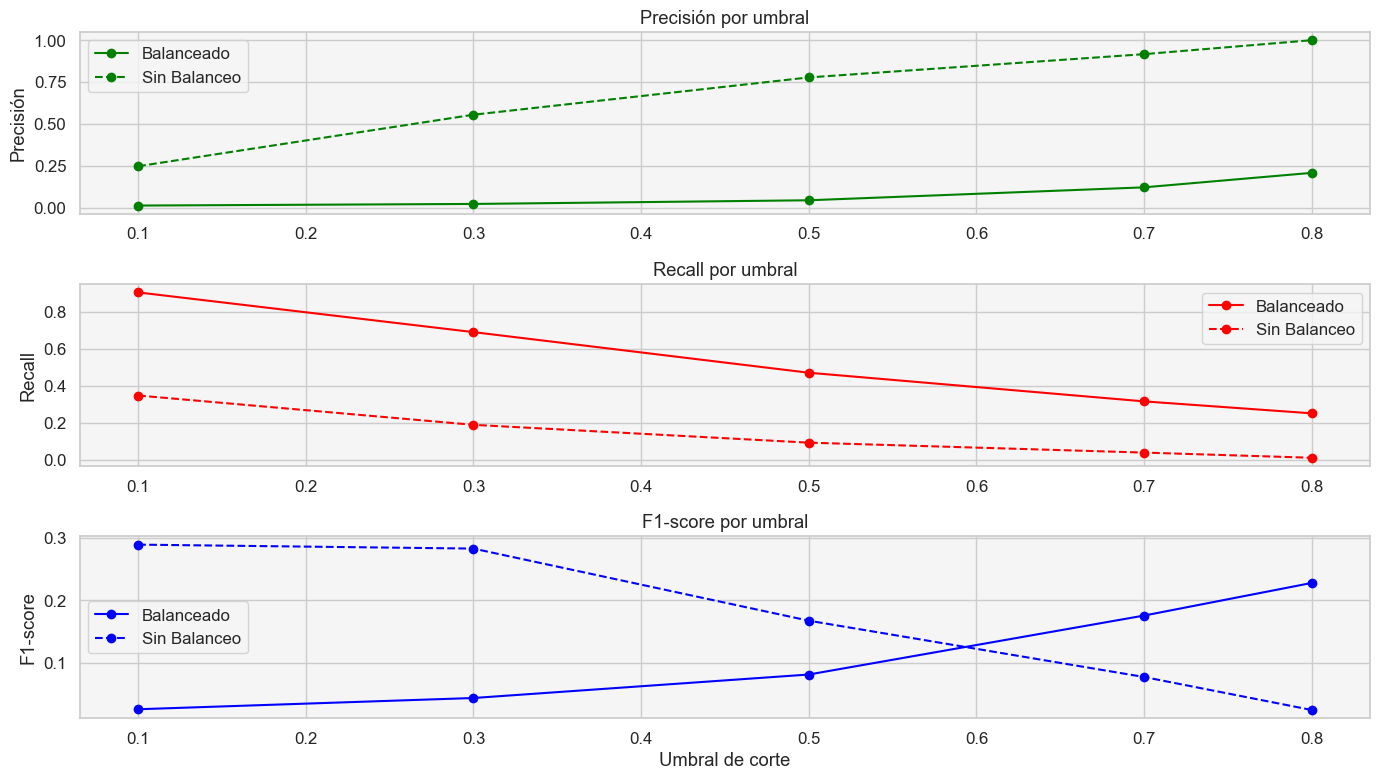

In [849]:
# 1. Calcular las probabilidades de la clase positiva para ambos modelos
y_pred_prob_balanceado_rf = modelo_balanceado_rf.predict_proba(X_test)[:, 1]
y_pred_prob = modelo_sin_balanceo_rf.predict_proba(X_test)[:, 1]

# 2. Definir la función para calcular las métricas
def calcular_metricas_umbral(y_true, y_pred_prob, umbrales):
    resultados = []
    for umbral in umbrales:
        y_pred = (y_pred_prob >= umbral).astype(int)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        resultados.append({'Umbral': umbral, 'Precisión': precision, 'Recall': recall, 'F1-score': f1})
    return pd.DataFrame(resultados)

# 3. Definir los umbrales que querés comparar
umbrales = [0.1, 0.3, 0.5, 0.7, 0.8]

# 4. Calcular métricas para ambos modelos
resultados_balanceado = calcular_metricas_umbral(y_test, y_pred_prob_balanceado_rf, umbrales)
resultados_sin_balanceo = calcular_metricas_umbral(y_test, y_pred_prob, umbrales)


# 5. Mostrar los resultados numéricos
print(" Resultados - Modelo Balanceado:")
print(resultados_balanceado.to_string(index=False))

print("\n Resultados - Modelo Sin Balanceo:")
print(resultados_sin_balanceo.to_string(index=False))


# 5. Graficar los resultados
plt.figure(figsize=(14, 8))

# Precisión
plt.subplot(3, 1, 1)
plt.plot(resultados_balanceado['Umbral'], resultados_balanceado['Precisión'], marker='o', color='green', label='Balanceado')
plt.plot(resultados_sin_balanceo['Umbral'], resultados_sin_balanceo['Precisión'], marker='o', color='green', linestyle='--', label='Sin Balanceo')
plt.title('Precisión por umbral')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Recall
plt.subplot(3, 1, 2)
plt.plot(resultados_balanceado['Umbral'], resultados_balanceado['Recall'], marker='o', color='red', label='Balanceado')
plt.plot(resultados_sin_balanceo['Umbral'], resultados_sin_balanceo['Recall'], marker='o', color='red', linestyle='--', label='Sin Balanceo')
plt.title('Recall por umbral')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

# F1-score
plt.subplot(3, 1, 3)
plt.plot(resultados_balanceado['Umbral'], resultados_balanceado['F1-score'], marker='o', color='blue', label='Balanceado')
plt.plot(resultados_sin_balanceo['Umbral'], resultados_sin_balanceo['F1-score'], marker='o', color='blue', linestyle='--', label='Sin Balanceo')
plt.title('F1-score por umbral')
plt.xlabel('Umbral de corte')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Si tu prioridad es minimizar falsos negativos (es decir, asegurarte de que el modelo capture la mayor cantidad posible de casos positivos), el modelo balanceado podría ser la mejor opción, ya que su recall es más alto, especialmente en umbrales bajos, aunque con una precisión baja.

Si tu prioridad es minimizar falsos positivos (asegurarte de que cuando el modelo predice positivo, sea realmente positivo), el modelo sin balanceo podría ser mejor, ya que tiene una precisión más alta, especialmente en umbrales más altos, aunque el recall es muy bajo.

Si buscas un equilibrio entre precisión y recall, el modelo balanceado ofrece un recall mucho mejor, pero el modelo sin balanceo tiene una precisión superior a umbrales más altos.

* Validación


=== Entrenamiento ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    198615
           1       0.86      0.41      0.55      1915

    accuracy                           0.99    200530
   macro avg       0.93      0.70      0.77    200530
weighted avg       0.99      0.99      0.99    200530

Matriz de Confusión:
[[198488    127]
 [  1139    776]]


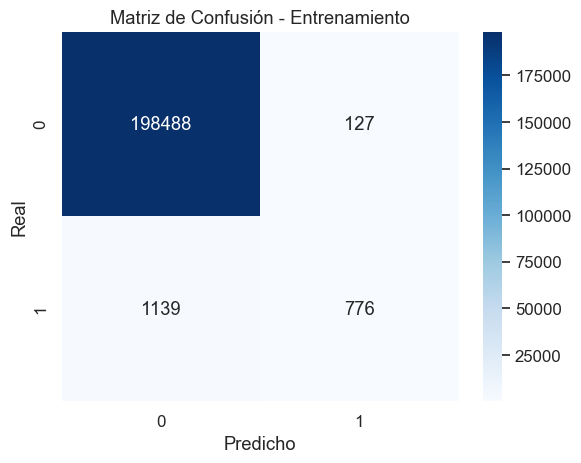


=== Prueba ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85121
           1       0.56      0.19      0.28       821

    accuracy                           0.99     85942
   macro avg       0.77      0.59      0.64     85942
weighted avg       0.99      0.99      0.99     85942

Matriz de Confusión:
[[84996   125]
 [  665   156]]


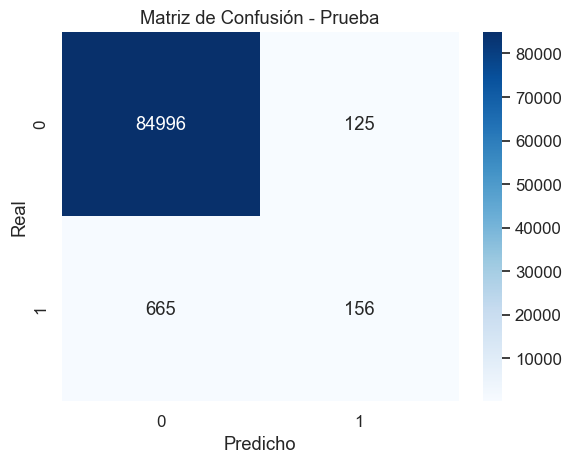

<Figure size 1000x600 with 0 Axes>

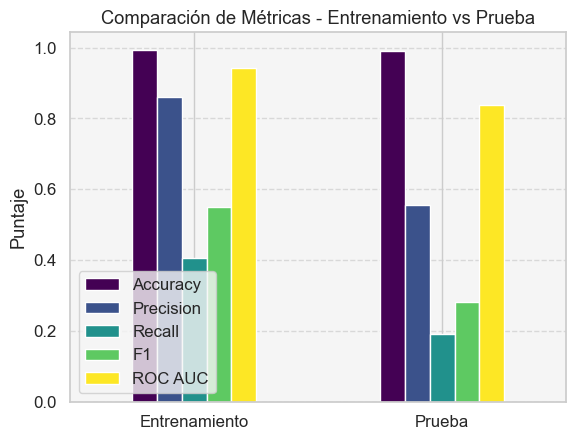

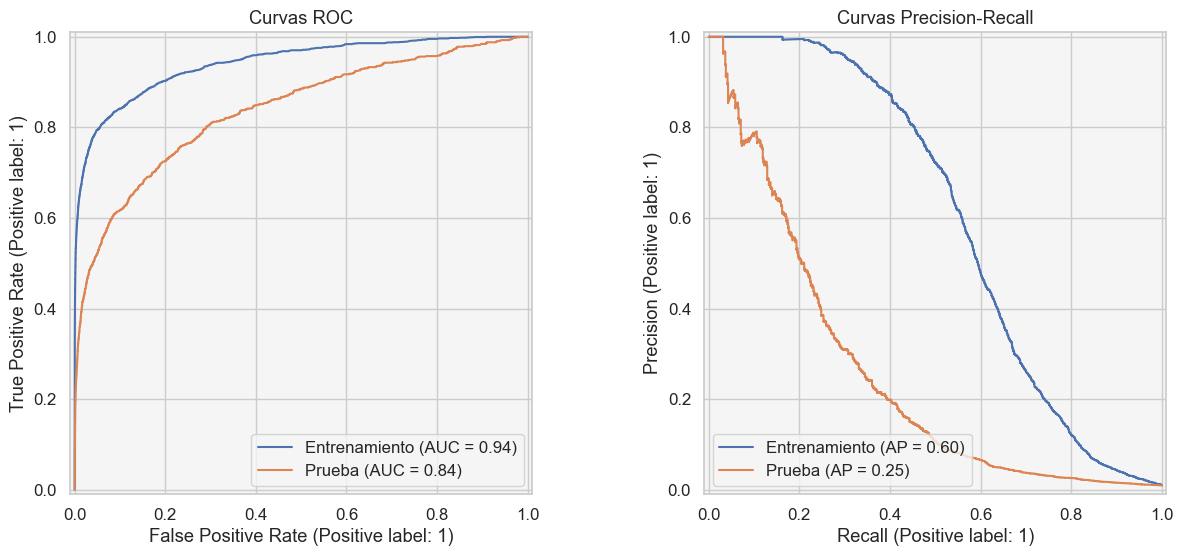

In [855]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay,
                             precision_score, recall_score, f1_score, accuracy_score)

# Preparación de los datos
X = pd.get_dummies(consolidado[['edad', 'mes_gestion', 'tiene_acuerdo', 'gestiones_totales', 
    'cantidad_operaciones_report', 'monto_total_report', 'educacion_BASICA', 
    'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 
    'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 
    'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 
    'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 
    'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 
    'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 
    'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 
    'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 
    'peor_calificacion_MM', 'peor_calificacion_S/C']], drop_first=True)

y = consolidado["paga"]

# Dividir en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar modelo
modelo_final = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=15)
modelo_final.fit(X_train, y_train)


# ===== EVALUACIÓN CON UMBRAL CONSISTENTE (0.3) =====
THRESHOLD = 0.3  # Define un umbral único

# Función para calcular y guardar métricas
def evaluate_model(X, y, model, threshold=0.3, set_name=''):
    y_prob = model.predict_proba(X)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    
    metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1': f1_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_prob)
    }
    
    print(f"\n=== {set_name} ===")
    print(classification_report(y, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y, y_pred))
    
    # Gráfico de matriz de confusión
    plt.figure()
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {set_name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    
    return metrics

# Evaluar en entrenamiento y prueba
metrics_train = evaluate_model(X_train, y_train, modelo_final, THRESHOLD, 'Entrenamiento')
metrics_test = evaluate_model(X_test, y_test, modelo_final, THRESHOLD, 'Prueba')

# ===== GRÁFICO COMPARATIVO DE MÉTRICAS =====
metrics_df = pd.DataFrame([metrics_train, metrics_test], index=['Entrenamiento', 'Prueba'])

plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', rot=0, colormap='viridis')
plt.title('Comparación de Métricas - Entrenamiento vs Prueba')
plt.ylabel('Puntaje')
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ===== CURVAS ROC Y PR EN UN MISMO GRÁFICO =====
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Curva ROC
RocCurveDisplay.from_estimator(modelo_final, X_train, y_train, name='Entrenamiento', ax=ax1)
RocCurveDisplay.from_estimator(modelo_final, X_test, y_test, name='Prueba', ax=ax1)
ax1.set_title('Curvas ROC')
ax1.grid(True)

# Curva Precision-Recall
PrecisionRecallDisplay.from_estimator(modelo_final, X_train, y_train, name='Entrenamiento', ax=ax2)
PrecisionRecallDisplay.from_estimator(modelo_final, X_test, y_test, name='Prueba', ax=ax2)
ax2.set_title('Curvas Precision-Recall')
ax2.grid(True)

plt.show()


=== Entrenamiento ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    198615
           1       0.49      0.60      0.54      1915

    accuracy                           0.99    200530
   macro avg       0.74      0.80      0.77    200530
weighted avg       0.99      0.99      0.99    200530

Matriz de Confusión:
[[197424   1191]
 [   772   1143]]


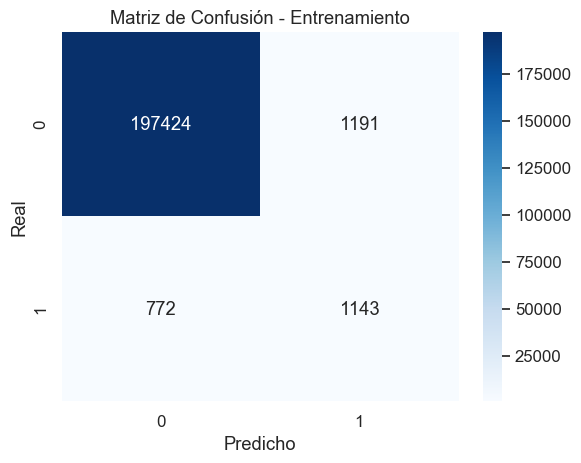


=== Prueba ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85121
           1       0.25      0.35      0.29       821

    accuracy                           0.98     85942
   macro avg       0.62      0.67      0.64     85942
weighted avg       0.99      0.98      0.99     85942

Matriz de Confusión:
[[84252   869]
 [  535   286]]


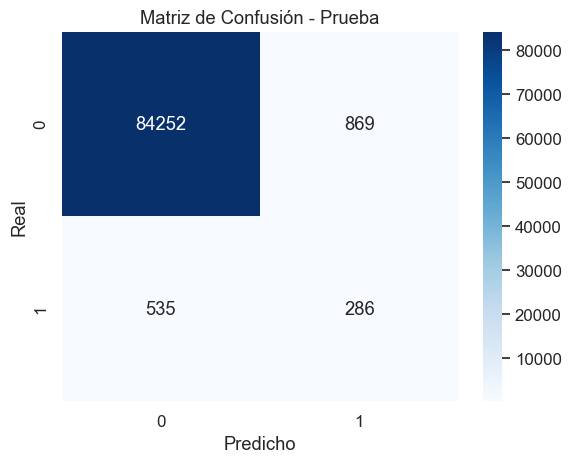

<Figure size 1000x600 with 0 Axes>

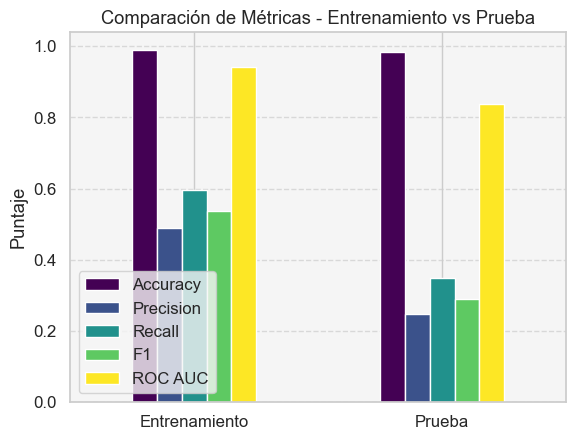

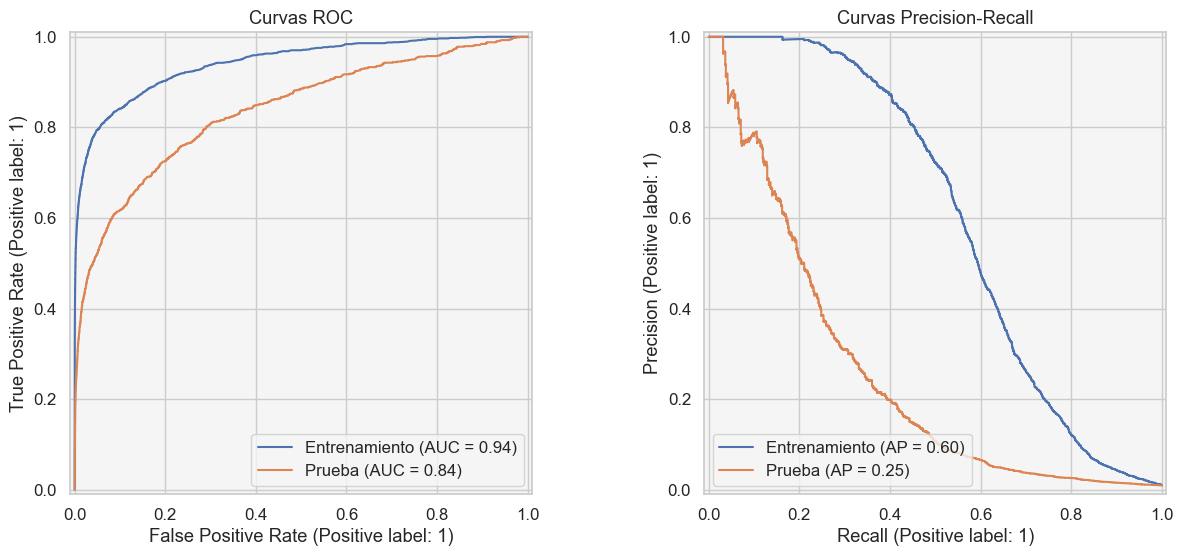

In [853]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay,
                             precision_score, recall_score, f1_score, accuracy_score)

# Preparación de los datos
X = pd.get_dummies(consolidado[['edad', 'mes_gestion', 'tiene_acuerdo', 'gestiones_totales', 
    'cantidad_operaciones_report', 'monto_total_report', 'educacion_BASICA', 
    'educacion_NINGUNA', 'educacion_S/I', 'educacion_SUPERIOR', 'empleabilidad_EMPLEADO DEPENDIENTE', 
    'empleabilidad_EMPLEADO DOMESTICO', 'empleabilidad_EMPLEADO SECTOR PUBLICO', 
    'empleabilidad_INDEPENDIENTE', 'empleabilidad_TRABAJO NO REMUNERADO HOGAR', 
    'provincia_azuay', 'provincia_el oro', 'provincia_esmeraldas', 'provincia_guayas', 
    'provincia_los rios', 'provincia_manabi', 'provincia_pichincha', 'provincia_santa elena', 
    'provincia_santo domingo de los tsachilas', 'peor_calificacion_A2', 'peor_calificacion_A3', 
    'peor_calificacion_AL', 'peor_calificacion_B1', 'peor_calificacion_B2', 'peor_calificacion_C1', 
    'peor_calificacion_C2', 'peor_calificacion_D', 'peor_calificacion_E', 'peor_calificacion_MD', 
    'peor_calificacion_MM', 'peor_calificacion_S/C']], drop_first=True)

y = consolidado["paga"]

# Dividir en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar modelo
modelo_final = RandomForestClassifier(random_state=42, n_estimators=400, max_depth=15)
modelo_final.fit(X_train, y_train)


# ===== EVALUACIÓN CON UMBRAL CONSISTENTE (0.1) =====
THRESHOLD = 0.1  # Define un umbral único

# Función para calcular y guardar métricas
def evaluate_model(X, y, model, threshold=0.1, set_name=''):
    y_prob = model.predict_proba(X)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    
    metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1': f1_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_prob)
    }
    
    print(f"\n=== {set_name} ===")
    print(classification_report(y, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y, y_pred))
    
    # Gráfico de matriz de confusión
    plt.figure()
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {set_name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    
    return metrics

# Evaluar en entrenamiento y prueba
metrics_train = evaluate_model(X_train, y_train, modelo_final, THRESHOLD, 'Entrenamiento')
metrics_test = evaluate_model(X_test, y_test, modelo_final, THRESHOLD, 'Prueba')

# ===== GRÁFICO COMPARATIVO DE MÉTRICAS =====
metrics_df = pd.DataFrame([metrics_train, metrics_test], index=['Entrenamiento', 'Prueba'])

plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', rot=0, colormap='viridis')
plt.title('Comparación de Métricas - Entrenamiento vs Prueba')
plt.ylabel('Puntaje')
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ===== CURVAS ROC Y PR EN UN MISMO GRÁFICO =====
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Curva ROC
RocCurveDisplay.from_estimator(modelo_final, X_train, y_train, name='Entrenamiento', ax=ax1)
RocCurveDisplay.from_estimator(modelo_final, X_test, y_test, name='Prueba', ax=ax1)
ax1.set_title('Curvas ROC')
ax1.grid(True)

# Curva Precision-Recall
PrecisionRecallDisplay.from_estimator(modelo_final, X_train, y_train, name='Entrenamiento', ax=ax2)
PrecisionRecallDisplay.from_estimator(modelo_final, X_test, y_test, name='Prueba', ax=ax2)
ax2.set_title('Curvas Precision-Recall')
ax2.grid(True)

plt.show()